# ADA Project - Food self-sufficiency :   what about Switzerland?

<h1>Table of Contents<span class="tocSkip"></span></h1>

<div class="toc">  
    <ul class="toc-item">
        <li><span><a href="#Libraries-importation" data-toc-modified-id="Libraries-importation-0">Environment set up and libraries </a></span></li>
        <li><span><a href="#World-global-view" data-toc-modified-id="World-global-view-1">World global view</a></span>
            <ul class="toc-item">
                <li><span><a href="#Data-loading" data-toc-modified-id="Data-loading-1.1">Data loading and preprocessing</a></span>  
                    <ul class="toc-item"><li><span><a href="#Series" data-toc-modified-id="Series-1.1.1">subpart if needed (just for me to know how this works)</a></span></li></ul> 
                    <ul class="toc-item">
                        <li><span><a href="#Series" data-toc-modified-id="Series-1.1.1">subpart if needed</a></span></li>
                        <ul class="toc-item"><li><span><a href="#Missing-Values" data-toc-modified-id="Missing-Values-1.2.0.1">Subsub</a></span></li></ul>
                    </ul>
                </li>
                <li><span><a href="#Insights" data-toc-modified-id="Insights-1.2">Insights</a></span></li>
            </ul>
       </li>
    </ul>
    <ul class="toc-item">
        <li>
            <span><a href="#Switzerland" data-toc-modified-id="Switzerland-2">Switzerland</a></span>
            <ul class="toc-item"><li><span><a href="#Data-loading-and-cleaning" data-toc-modified-id="Data-loading-and-cleaning-2.1">Data loading and cleaning</a></span>
                <ul class="toc-item"><li><span><a href="#Crops-Dataset" data-toc-modified-id="Crops-Dataset-2.1.1">Dataset : crops</a></span></li></ul>
                <ul class="toc-item"><li><span><a href="#Land-Use-Areas-Dataset" data-toc-modified-id="Land-Use-Areas-Dataset-2.1.2">Dataset : land use (area)</a></span></li></ul>
                <ul class="toc-item"><li><span><a href="#Land-Use-Indicators-Dataset" data-toc-modified-id="Land-Use-Indicators-Dataset-2.1.3">Dataset : land use (indicators)</a></span></li></ul>
                <ul class="toc-item"><li><span><a href="#Land-Cover-Dataset" data-toc-modified-id="Land-Cover-Dataset-2.1.4">Dataset : land cover</a></span></li></ul>
                <ul class="toc-item"><li><span><a href="#Demography-Dataset" data-toc-modified-id="Demography-Dataset-2.1.5">Dataset : demography</a></span></li></ul>
                <ul class="toc-item"><li><span><a href="#Swiss-importations-and-exportations-of-agricultural-goods-Dataset" data-toc-modified-id="Swiss-importations-and-exportations-of-agricultural-goods-Dataset-2.1.6">Dataset : importation/exportation (CH)</a></span></li></ul>
                <ul class="toc-item"><li><span><a href="#Italian-importations-and-exportations-of-agricultural-goods-Dataset" data-toc-modified-id="Italian-importations-and-exportations-of-agricultural-goods-Dataset-2.1.7">Dataset : importation/exportation (I)</a></span></li></ul>
                <ul class="toc-item"><li><span><a href="#French-importations-and-exportations-of-agricultural-goods-Dataset" data-toc-modified-id="French-importations-and-exportations-of-agricultural-goods-Dataset-2.1.8">Dataset : importation/exportation (FR)</a></span></li></ul>
                <ul class="toc-item"><li><span><a href="#Austrian-importations-and-exportations-of-agricultural-goods-Dataset" data-toc-modified-id="Austrian-importations-and-exportations-of-agricultural-goods-Dataset-2.1.9">Dataset : importation/exportation (AU)</a></span></li></ul>
                <ul class="toc-item"><li><span><a href="#German-importations-and-exportations-of-agricultural-goods-Dataset" data-toc-modified-id="German-importations-and-exportations-of-agricultural-goods-Dataset-2.1.10">Dataset : importation/exportation (G)</a></span></li></ul>
                <ul class="toc-item"><li><span><a href="#Swiss-temperatures-Dataset" data-toc-modified-id="Swiss-temperatures-Dataset-2.1.11">Dataset : swiss temperatures</a></span></li></ul>
                <ul class="toc-item"><li><span><a href="#Farmers-population-Dataset" data-toc-modified-id="Farmers-population-Dataset-2.1.12">Dataset : farmers population</a></span></li></ul>
                <ul class="toc-item"><li><span><a href="#Fertilizers-and-Pesticides-Dataset" data-toc-modified-id="Fertilizers-and-Pesticides-Dataset-2.1.13">Dataset : fertilizers and pesticides</a></span></li></ul>
                </li></ul>
            <ul class="toc-item"><li><span><a href="#Investigation-plots" data-toc-modified-id="Investigation-plots-2.2">Investigation plots</a></span></li></ul>
            <ul class="toc-item"><li><span><a href="#Main-results" data-toc-modified-id="Main-results-2.3">Main results</a></span>
                <ul class="toc-item"><li><span><a href="#SSR-score" data-toc-modified-id="SSR-score-2.3.1">SSR score</a></span></li></ul>
            </li></ul>

# Libraries importation

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import folium

- `conda install -c conda-forge ipywidgets`  --> installs ipwydgets

- `conda install nodejs` --> required to run the following line

- `jupyter labextension install @jupyter-widgets/jupyterlab-manager` --> enables interactive visualization for jupyter lab also

In [2]:
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import IntSlider
from ipywidgets.embed import embed_minimal_html

In [3]:
import plotly.offline as py
py.init_notebook_mode(connected=False)
import plotly.graph_objs as go
import plotly.express as px

from scipy.stats import linregress

In [4]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning) #mutes warnings

# World global view

<div class="alert alert-block alert-success">
    
## We first investigated the dataset chosen from the proposed list : "Global Food & Agriculture Statistics"

Our aim was initially to link food production to hunger in some areas. An other idea was to found the possible causes for food insufficiency (natural disasters, wars...). <br>

The FAO dataset is the one we dowloaded from the course's link. It contains all the FAO data for world crops production. We started our analysis with this file but realized that given the diversity of the data, we should rather focus our project on a region or country. Moreover, this data is somehow out of date. <br>

You will find right bellow our data investigation for "Global Food & Agriculture Statistics" dataset as we want to explicit our reasoning.

## Data loading


Load Data into a pandas dataframe 

In [5]:
complete_dataset = pd.read_csv('../data/fao_data_crops_data.csv')

In [6]:
# We split the data and metadata and store them in 'crops' and 'flags' dataframe, respecitvely.
crops = complete_dataset.loc[:2255342].copy() 
flags = complete_dataset.loc[2255344:2255348].copy() 
# 'flags' contains correspondance list of acronyms that describe how a given sample was acquired --> only informative
flags.drop(['element','year','unit','value','value_footnotes','category'], axis=1, inplace = True) 
flags.rename(columns={'country_or_area':'acronym', 'element_code':'description'}, inplace=True) 
flags.set_index('acronym', inplace=True)
flags

description
acronym                                                   
Fc                                         Calculated Data
A        May include official, semi-official or estimat...
NR                                 Not reported by country
F                                             FAO Estimate
*                                        Unofficial figure

Exploratory data analysis 

In [7]:
crops.head()

country_or_area element_code         element    year unit    value  \
0      Americas +           31  Area Harvested  2007.0   Ha  49404.0   
1      Americas +           31  Area Harvested  2006.0   Ha  49404.0   
2      Americas +           31  Area Harvested  2005.0   Ha  49404.0   
3      Americas +           31  Area Harvested  2004.0   Ha  49113.0   
4      Americas +           31  Area Harvested  2003.0   Ha  48559.0   

  value_footnotes          category  
0              A   agave_fibres_nes  
1              A   agave_fibres_nes  
2              A   agave_fibres_nes  
3              A   agave_fibres_nes  
4              A   agave_fibres_nes

In [8]:
print("Size of the DataFrame: {s}\n".format(s=crops.shape))
print("Variable types present in DataFrame: \n{t}".format(t=crops.dtypes))

Size of the DataFrame: (2255343, 8)

Variable types present in DataFrame: 
country_or_area     object
element_code        object
element             object
year               float64
unit                object
value              float64
value_footnotes     object
category            object
dtype: object


In [9]:
# List all the different footnotes values present in the dataset
footnotes = crops['value_footnotes'].unique() 

In [10]:
print(crops['element'].unique())
print(crops['year'].unique())
print(crops['unit'].unique())
print(crops['category'].unique())
print(crops['element_code'].unique())
print(crops['country_or_area'].unique())

['Area Harvested' 'Yield' 'Production Quantity' nan 'Seed'
 'Gross Production 1999-2001 (1000 I$)'
 'Net Production 1999-2001 (1000 I$)' 'Gross PIN (base 1999-2001)'
 'Grs per capita PIN (base 1999-2001)' 'Net PIN (base 1999-2001)'
 'Net per capita PIN (base 1999-2001)']
[2007. 2006. 2005. 2004. 2003. 2002. 2001. 2000. 1999. 1998. 1997. 1996.
 1995. 1994. 1993. 1992. 1991. 1990. 1989. 1988. 1987. 1986. 1985. 1984.
 1983. 1982. 1981. 1980. 1979. 1978. 1977. 1976. 1975. 1974. 1973. 1972.
 1971. 1970. 1969. 1968. 1967. 1966. 1965. 1964. 1963. 1962. 1961.   nan]
['Ha' 'Hg/Ha' 'tonnes' nan '1000 Int. $' 'Int. $']
['agave_fibres_nes' 'almonds_with_shell' 'anise_badian_fennel_corian'
 'apples' 'apricots' 'arecanuts' 'artichokes' 'asparagus' 'avocados'
 'bambara_beans' 'bananas' 'barley' 'beans_dry' 'beans_green'
 'berries_nes' 'blueberries' 'brazil_nuts_with_shell'
 'broad_beans_horse_beans_dry' 'buckwheat' 'cabbages_and_other_brassicas'
 'canary_seed' 'carobs' 'carrots_and_turnips' 'cashew_n


 Data preprocessing 

We clear the data by dropping all the rows containing only NAN values. 
We also clear the raws where value_footnotes is NR as it means not repported by country, so it won't be usefull for our analysis.

In [11]:
# Drop rows which contain only missing values.
crops.dropna(how='all', inplace=True) 

In [12]:
# We drop the samples where 'value' is unknown (NaN) because they are useless  
crops.dropna(subset=['value', 'value_footnotes'], inplace=True) 

# Let's drop also all the samples that have 'NR' as a 'value_footnotes' value or 0 as 'value'
crops.drop(index=crops[crops['value_footnotes'].str.contains('NR')].index, inplace=True)
crops.drop(index=crops[crops['value']==0].index, inplace=True)


In our dataset, regions are indicated by a "+" at the end of their names. We want to separate regions from countries to facilitate our analysis so we can be more precise. 

In [13]:
regions_bool = crops['country_or_area'].str.contains('\+')
crops_regions = crops[regions_bool].copy()
crops_countries = crops[~regions_bool].copy()

We calculate the mean of all the elements for every country so we can compare the area harvested, seed or yield between each country. The mean is calculated over all years. 

In [14]:
#calculate the mean of all the elements for every country.  
crops_countries_by_country_year = crops_countries.groupby(['country_or_area', 'element']) \
                            .agg({'value':'mean'}) \
                            .rename(columns={'value':'mean_element'}) 
crops_countries_by_country_year

mean_element
country_or_area element                                            
Afghanistan     Area Harvested                        242601.956925
                Gross PIN (base 1999-2001)               144.595745
                Gross Production 1999-2001 (1000 I$)  552737.382979
                Grs per capita PIN (base 1999-2001)      210.723404
                Net PIN (base 1999-2001)                 146.744681
...                                                             ...
Zimbabwe        Net Production 1999-2001 (1000 I$)    231112.829787
                Net per capita PIN (base 1999-2001)      144.297872
                Production Quantity                   157003.056911
                Seed                                   11393.516165
                Yield                                  52685.685310

[1955 rows x 1 columns]

In [15]:
area_harvested = crops_countries_by_country_year.loc[(slice(None),'Area Harvested'), :]
#area_harvested.loc['United States of America']
area_harvested.head()

mean_element
country_or_area element                      
Afghanistan     Area Harvested  242601.956925
Albania         Area Harvested   42248.004417
Algeria         Area Harvested  293350.081841
American Samoa  Area Harvested     690.087819
Angola          Area Harvested  129773.309719

## Insights

### Create a map showing yield by country (average over all years) 

The following maps provide an insight of agricultural yield and area harvested in World countries.
Note that we chose to use a logarithmic scale to plot the yield to reduce 


In [16]:
yield_df= crops_countries_by_country_year.loc[(slice(None),'Yield'), :]
#we take the log value for the following plot, so our quantile a more equilibrate
log_yield_df=pd.DataFrame(yield_df.mean_element.map(lambda x:np.log(x)))
log_yield_df.head()



mean_element
country_or_area element              
Afghanistan     Yield       10.787559
Albania         Yield       11.004285
Algeria         Yield       10.720772
American Samoa  Yield       10.409717
Angola          Yield       10.522206

In [17]:
m1 = folium.Map(location=[48, -102], zoom_start=3)

world_geo = 'https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json'
Bins = list(log_yield_df.mean_element.quantile([0, 0.25, 0.5, 0.75, 1]))

m1 = folium.Map(zoom_start=3)

folium.Choropleth(
    geo_data=world_geo,
    name='choropleth',
    data=log_yield_df,
    columns=[log_yield_df.index.get_level_values(level='country_or_area').values,'mean_element'],
    key_on='feature.properties.name',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='yield',
    #bins = Bins,
    reset=True
).add_to(m1)

folium.LayerControl().add_to(m1)

m1

In [18]:
m1.save('../doc/map_yield.html') #map saved as html file in doc folder.

The countries having the most important yield are Iceland and Danemark. We can also see that in many countries of Africa the yield is very low. Mongolia has also a very low yield. We can see the yield of Switzerland is higher than its neighbours (averaged over years).

## Are all countries equal in terms of diversity of foodstuffs harvested?
    
To answer this question, we simply count the number of categories produced by countries, so we can get an idea of their food production diversity.

In [19]:
food_diversity = pd.DataFrame(crops_countries.groupby(['country_or_area','category'])['category'].count().reset_index(name='total'))


In [20]:
food_diversity = pd.DataFrame(food_diversity.groupby(['country_or_area']).country_or_area.size().reset_index(name='category_diversity'))

In [21]:
food_diversity.sort_values('category_diversity', ascending=False).head(10)

country_or_area  category_diversity
40             China, mainland                 127
124                     Mexico                 120
39                       China                 117
180                      Spain                 114
198                     Turkey                 110
130                    Morocco                 108
151                       Peru                 105
207   United States of America                 105
94                       Italy                 103
90   Iran, Islamic Republic of                 100

In [22]:
sorted_diversity = food_diversity.sort_values('category_diversity', ascending=False).reset_index()
list_Country_interest=["Switzerland","France","Italy","Germany","Austria"]
df_histograme=sorted_diversity.loc[sorted_diversity.country_or_area.isin(list_Country_interest)]

In [23]:
df_histograme.head()

index country_or_area  category_diversity
8      94           Italy                 103
11     68          France                  99
61     74         Germany                  73
62      9         Austria                  73
72    186     Switzerland                  66

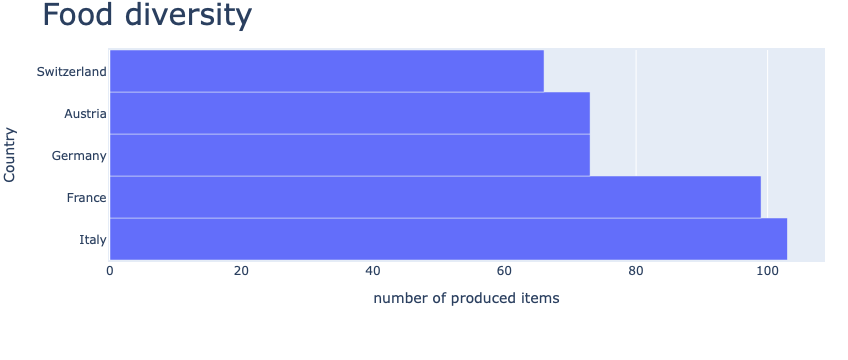

In [24]:
fig = go.Figure(data=[go.Bar(x=df_histograme.category_diversity, y=df_histograme.country_or_area, orientation='h', width=[1,1,1,1,1])])
fig.update_layout(
    title='Food diversity',
    yaxis_title="Country",
    xaxis_title='number of produced items',
    autosize=False,
    width=400,
    height=300,
    titlefont=dict(size=30),
    margin=go.layout.Margin(
        l=25,
        r=25,
        b=100,
        t=50,
        pad=2
    )
)

fig.show()

In [25]:
py.plot(fig, filename='../doc/food_diversity.html')

'../doc/food_diversity.html'

In [26]:
sorted_diversity.category_diversity.describe()

count    219.000000
mean      54.210046
std       26.718919
min        1.000000
25%       35.000000
50%       52.000000
75%       75.000000
max      127.000000
Name: category_diversity, dtype: float64

Text(0.5,1,'world food production diversity distribution')

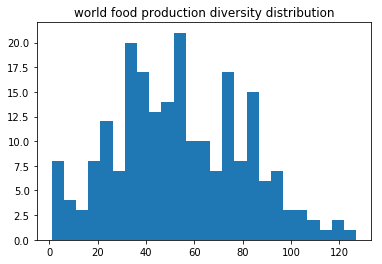

In [27]:
plt.hist(sorted_diversity.category_diversity, bins=25)
plt.title('world food production diversity distribution')

We see that Switzerland is above the median of the food production diversity of all countries with 66 agricultural products produced. It is a fair value but still far from the top countries like its neighbour Italy. As it will be discussed later in the analysis,Switzerland could make some improvements on the production diversity.
All its neighbours are doing better especially Italy and France (103 and 99 different items). 

# Switzerland

<div class="alert alert-block alert-success">

# Project Update - Insight into Switzerland agriculture production 

We will focus on Switzerland compared to its neighbours. We would like to know if Switzerland could be self-sufficient in term of food production. 

## Abstract

In the wake of the the years 2007-08, food self-sufficiency policies have gained increased attention in a number of coutries following the international food crisis that triggered great volatilities on the world food markets causing important economic and social damages. <br>
Since then, diverse countries have expressed interest in improving their levels of food self-sufficiency arising controversy into a massive economically connected world.

On the 23th september of 2018, in the small country of Switzerland, the debate is materialized into a popular referendum submitted to its population asking wherever a food self-sufficiency politic should be adopted or not. Such a politic could have unexpected consequences considering a country as Switzerland with many neighbours and such a small area capacity. <br>
This paper aims to analyse the questions surrounding the debate over food self-sufficiency in Switzerland. 

- What does Switzerland produce and in which quantity? 
- What about the amount of importations/exportations?
- Are all Switzerland areas optimally harvested?
- Links to population size
- How is the Swiss productiviy trend evolving, is it correlated with external factors such as temperature, fertilizer use, ...?

Then we will make comparaisons between Switzerland and its neighbours. Does Switzerland import more than its neighbours (due to its small size ?) ? Is food self-suffience of Switzerland realistic ? How many farms/farmers would it need ?


## **Data loading and cleaning**


 Load Data into pandas dataframes 

### Crops Dataset

This dataset represents our new start line, it contains almost the same informations as the "Global Food & Agriculture Statistics" we already used. However, the data are more recent.  

We found the majority of our following data on the __[Food And Agriculture Organization of the United Nations Datasets](http://www.fao.org/faostat/en/#data)__ website (we will precise later if one dataset does not come from this link).

File contains data about Switzerland and neighbours (Italy, Germany, France, Austria and Liechtenstein)

In [28]:
raw_crops_dataset = pd.read_csv('../data/FAOSTAT_data_crops_CHandNeighbours.csv')

In [29]:
raw_crops_dataset =raw_crops_dataset[['Domain', 'Area', 'Element', 'Item', 'Year', 'Unit', 'Value', 'Flag Description']]
raw_crops_dataset.drop(index=raw_crops_dataset[raw_crops_dataset['Flag Description'].str.contains('Data not available')].index, inplace=True)

In [30]:
raw_crops_dataset.head()

Domain     Area         Element    Item  Year Unit    Value  \
24  Crops  Austria  Area harvested  Apples  1985   ha  16100.0   
25  Crops  Austria  Area harvested  Apples  1986   ha  16120.0   
26  Crops  Austria  Area harvested  Apples  1987   ha  16700.0   
27  Crops  Austria  Area harvested  Apples  1988   ha  16720.0   
28  Crops  Austria  Area harvested  Apples  1989   ha  17330.0   

   Flag Description  
24     FAO estimate  
25     FAO estimate  
26     FAO estimate  
27     FAO estimate  
28     FAO estimate

In [31]:
print("Size of the DataFrame: {s}\n".format(s=raw_crops_dataset.shape))
print("Variable types present in DataFrame: \n{t}".format(t=raw_crops_dataset.dtypes))

Size of the DataFrame: (50563, 8)

Variable types present in DataFrame: 
Domain               object
Area                 object
Element              object
Item                 object
Year                  int64
Unit                 object
Value               float64
Flag Description     object
dtype: object


In [32]:
print(raw_crops_dataset.isna().values.any(axis=0)) 

[False False False False False False False False]


The dataset looks then complete (non NaN values).

What about the categories listed in our columns?

In [33]:
print(raw_crops_dataset['Domain'].unique())
print(raw_crops_dataset['Area'].unique())
print(raw_crops_dataset['Element'].unique())
print(raw_crops_dataset['Item'].unique())
print(raw_crops_dataset['Year'].unique())
print(raw_crops_dataset['Unit'].unique())
print(raw_crops_dataset['Flag Description'].unique())

['Crops']
['Austria' 'France' 'Germany' 'Italy' 'Liechtenstein' 'Switzerland']
['Area harvested' 'Yield' 'Production']
['Apples' 'Apricots' 'Asparagus' 'Barley' 'Beans, dry' 'Beans, green'
 'Berries nes' 'Broad beans, horse beans, dry' 'Buckwheat'
 'Cabbages and other brassicas' 'Carrots and turnips'
 'Cauliflowers and broccoli' 'Cereals, nes' 'Cherries' 'Cherries, sour'
 'Chillies and peppers, green' 'Cucumbers and gherkins' 'Currants'
 'Eggplants (aubergines)' 'Flax fibre and tow' 'Garlic' 'Gooseberries'
 'Grain, mixed' 'Grapes' 'Hemp tow waste' 'Hops'
 'Leeks, other alliaceous vegetables' 'Lettuce and chicory' 'Linseed'
 'Lupins' 'Maize' 'Maize, green' 'Millet' 'Mushrooms and truffles' 'Oats'
 'Oilseeds nes' 'Onions, dry' 'Peaches and nectarines' 'Pears' 'Peas, dry'
 'Peas, green' 'Plums and sloes' 'Poppy seed' 'Potatoes' 'Pulses, nes'
 'Pumpkins, squash and gourds' 'Rapeseed' 'Raspberries' 'Rye' 'Sorghum'
 'Soybeans' 'Spinach' 'Strawberries' 'Sugar beet' 'Sunflower seed'
 'Tobacco,

In [34]:
raw_crops_dataset = raw_crops_dataset[['Area', 'Item','Element', 'Year', 'Unit', 'Value']]

### Land Use Areas Dataset

File contains data about Switzerland and neighbours (Italy, Germany, France, Austria and Liechtenstein).
This file will allow us to know the potential of Switzerland in terms of agriculture. How does the country exploit its surface? 

Data exploration and pre-processing is very similar to first dataset. We will therefore not describe all steps as precisely as before.

In [35]:
dist_land_dataset = pd.read_csv('../data/FAOSTAT_data_NEWLandUse.csv')

In [36]:
dist_land_dataset = dist_land_dataset[['Domain','Area','Element','Item','Year','Value','Flag Description']]

In [37]:
pd.options.mode.chained_assignment = None  # default='warn', Mutes warnings when copying a slice from a DataFrame.

In [38]:
# change units of the surface values
dist_land_dataset['Value'] = dist_land_dataset['Value'].apply(lambda x: x*1000)

In [39]:
dist_land_dataset.head()

Domain     Area Element          Item  Year      Value  \
0  Land Use  Austria    Area  Country area  1961  8387900.0   
1  Land Use  Austria    Area  Country area  1962  8387900.0   
2  Land Use  Austria    Area  Country area  1963  8387900.0   
3  Land Use  Austria    Area  Country area  1964  8387900.0   
4  Land Use  Austria    Area  Country area  1965  8387900.0   

                                    Flag Description  
0  Official data reported on FAO Questionnaires f...  
1  Official data reported on FAO Questionnaires f...  
2  Official data reported on FAO Questionnaires f...  
3  Official data reported on FAO Questionnaires f...  
4  Official data reported on FAO Questionnaires f...

### Land Cover Dataset

File contains data about Switzerland and neighbours (Italy, Germany, France, Austria and Liechtenstein). It is complementary to the previous one, since it **also references urban areas**.

Data exploration and pre-processing is very simmilar to first dataset. We will therefore not describe all steps as precisely as before.

In [40]:
raw_land_cover_dataset = pd.read_csv('../data/FAOSTAT_data_LandCover.csv')

In [41]:
raw_land_cover_dataset =raw_land_cover_dataset[['Domain', 'Area', 'Element', 'Item', 'Year', 'Unit', 'Value', 'Flag Description']]
raw_land_cover_dataset.drop(index=raw_land_cover_dataset[raw_land_cover_dataset['Flag Description'].str.contains('Data not available')].index, inplace=True)
print(raw_land_cover_dataset.isnull().values.any(axis=0))  # --> PERFECT!

[False False False False False False False False]


In [42]:
pd.options.mode.chained_assignment = None  # default='warn', Mutes warnings when copying a slice from a DataFrame.
raw_land_cover_dataset["Surface"] = raw_land_cover_dataset.Value.apply(lambda x: x*1000)
raw_land_cover_dataset = raw_land_cover_dataset.drop(columns='Value')
raw_land_cover_dataset['Unit'] = 'ha'
raw_land_cover_dataset.head()

Domain     Area          Element  \
0  Land Cover  Austria  Area from MODIS   
1  Land Cover  Austria  Area from MODIS   
2  Land Cover  Austria  Area from MODIS   
3  Land Cover  Austria  Area from MODIS   
4  Land Cover  Austria  Area from MODIS   

                                                Item  Year Unit  \
0  Artificial surfaces (including urban and assoc...  2001   ha   
1  Artificial surfaces (including urban and assoc...  2002   ha   
2  Artificial surfaces (including urban and assoc...  2003   ha   
3  Artificial surfaces (including urban and assoc...  2004   ha   
4  Artificial surfaces (including urban and assoc...  2005   ha   

  Flag Description   Surface  
0  Calculated data  203303.2  
1  Calculated data  203303.2  
2  Calculated data  203346.2  
3  Calculated data  203389.1  
4  Calculated data  203496.4

In [43]:
print("Size of the DataFrame: {s}\n".format(s=raw_land_cover_dataset.shape))
print("Variable types present in DataFrame: \n{t}".format(t=raw_land_cover_dataset.dtypes))

Size of the DataFrame: (2493, 8)

Variable types present in DataFrame: 
Domain               object
Area                 object
Element              object
Item                 object
Year                  int64
Unit                 object
Flag Description     object
Surface             float64
dtype: object


In [44]:
print(raw_land_cover_dataset['Domain'].unique())
print(raw_land_cover_dataset['Area'].unique())
print(raw_land_cover_dataset['Element'].unique())
print(raw_land_cover_dataset['Item'].unique())
print(raw_land_cover_dataset['Year'].unique())
print(raw_land_cover_dataset['Unit'].unique())
print(raw_land_cover_dataset['Flag Description'].unique())

['Land Cover']
['Austria' 'France' 'Germany' 'Italy' 'Liechtenstein' 'Switzerland']
['Area from MODIS' 'Area from CCI_LC']
['Artificial surfaces (including urban and associated areas)'
 'Herbaceous crops' 'Woody crops' 'Grassland' 'Tree-covered areas'
 'Mangroves' 'Shrub-covered areas'
 'Shrubs and/or herbaceous vegetation, aquatic or regularly flooded'
 'Sparsely natural vegetated areas' 'Terrestrial barren land'
 'Permanent snow and glaciers' 'Inland water bodies']
[2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016 2017 1992 1993 1994 1995 1996 1997 1998 1999 2000]
['ha']
['Calculated data']


### Demography Dataset

File contains data about Switzerland and neighbours (Italy, Germany, France, Austria but not Liechtenstein -data missing from dataset).
These data will allow us to know the number of consumers in Switzerland and to compare the possible food self-sufficiency between Switzerland and its neighbours. we would like to answer questions as: With the growing population, can we feed everybody with Swiss agriculture in the next few years?

Data exploration and pre-processing is very simmilar to first dataset. We will therefore not describe all steps as precisely as before.

In [45]:
demography = pd.read_csv('../data/FAOSTAT_data_demography.csv')

In [46]:
demography = demography[['Area', 'Year','Unit', 'Value']]

In [47]:
demography["Population"] = demography.Value.apply(lambda x: x*1000)
demography=demography.drop(columns='Value')
demography['Unit'] = 'persons'

For further analysis, we keep only demographic data from 1986 to 2017, as other datasets don't contain data for periods earlier than 1986.

In [48]:
CH_demography = demography.loc[demography.Area=='Switzerland'].loc[demography.Year>=1986].loc[demography.Year<=2017].Population

### Swiss importations and exportations of agricultural goods Dataset

Files contain data for Switzerland only. The data provide insight about the trade of agricultural goods, that is the importations and exportations for a given product.
Data exploration and pre-processing is very simmilar to first dataset. We will therefore not describe all steps as precisely as before.

In [49]:
CH_imports = pd.read_csv('../data/FAOSTAT_data_11-23-2019.csv')

In [50]:
CH_imports = CH_imports[['Reporter Countries', 'Partner Countries','Element','Item','Year','Unit','Value','Flag Description']]

In [51]:
CH_exports = pd.read_csv('../data/FAOSTAT_data_exports.csv')

In [52]:
CH_exports = CH_exports[['Reporter Countries', 'Partner Countries','Element','Item','Year','Unit','Value','Flag Description']]


In [53]:
CH_trade = pd.concat([CH_imports, CH_exports])

In [54]:
for col in CH_trade:
    print (CH_trade[col].unique())

['Switzerland']
['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belgium-Luxembourg' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'British Indian Ocean Territory' 'British Virgin Islands'
 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde'
 'Cambodia' 'Cameroon' 'Canada' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Chile' 'China, Hong Kong SAR'
 'China, Macao SAR' 'China, mainland' 'China, Taiwan Province of'
 'Cocos (Keeling) Islands' 'Colombia' 'Comoros' 'Congo' 'Cook Islands'
 'Costa Rica' "Côte d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 'Czechoslovakia' "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 

For maximizing reliability of later results, we discard the numbers that were obtained from an unofficial source.

In [55]:
unofficial_stats_index = CH_trade.loc[CH_trade['Flag Description']=='Unofficial figure'].index
CH_trade = CH_trade.drop(index = unofficial_stats_index)

We keep only the importation and exportation values that are represented in tonnes, so that we can compare it with the agricultural production.

In [56]:
CH_trade = CH_trade.loc[CH_imports.Unit=='tonnes']

In [57]:
# We copy the CH_trade dataframe in CH_trade_network to have an unchanged version of the variable for future graph analysis
CH_trade_network=CH_trade.copy()

In [58]:
CH_trade = CH_trade[['Element','Partner Countries', 'Item', 'Year', 'Unit', 'Value']]

In [59]:
CH_trade_network = CH_trade_network[['Element','Reporter Countries','Partner Countries', 'Item', 'Year', 'Unit', 'Value']]

Because here we are not intereseted in the partner countries, but rather in the general importance of imporations of Switzerland for a given product, we sum those values over the partner countries.

In [60]:
CH_trade = CH_trade.groupby(['Item', 'Year', 'Element']).agg({'Value':'sum'})\
                                    .reset_index()

In [61]:
CH_trade.head()

Item  Year          Element  Value
0  Alfalfa meal and pellets  1988  Import Quantity   1743
1  Alfalfa meal and pellets  1989  Import Quantity    685
2  Alfalfa meal and pellets  1990  Import Quantity    575
3  Alfalfa meal and pellets  1991  Import Quantity   2246
4  Alfalfa meal and pellets  1992  Import Quantity   1374

In [62]:
CH_trade2 = CH_trade.copy()

We improve the structure of our dataframe by splitting values of importations and exportations in two columns.

In [63]:
CH_trade_transformed = pd.pivot(CH_trade,columns = 'Element', values='Value')\
                .rename(columns={'Export Quantity':'Exported Quantity','Import Quantity':'Imported Quantity'})

In [64]:
CH_trade = pd.concat([CH_trade, CH_trade_transformed], axis=1, join='inner')

In [65]:
CH_trade.drop(columns=['Value', 'Element'], inplace=True)

In [66]:
CH_trade = CH_trade.groupby(['Item', 'Year'])\
                            .agg({'Exported Quantity':'mean','Imported Quantity':'mean'})\
                            .reset_index()
                                    

In [67]:
CH_trade.head()

Item  Year  Exported Quantity  Imported Quantity
0  Alfalfa meal and pellets  1988                NaN             1743.0
1  Alfalfa meal and pellets  1989                NaN              685.0
2  Alfalfa meal and pellets  1990                NaN              575.0
3  Alfalfa meal and pellets  1991                NaN             2246.0
4  Alfalfa meal and pellets  1992                NaN             1374.0

Join production and trade data in one dataframe 'CH_data' so that we have all the information at the same place. Note that we don't have values of importations and exportations before 1986 so values for  production will only considered from this date.

In [68]:
# Merge importations data with production data
CH_data = raw_crops_dataset.loc[raw_crops_dataset.Area=='Switzerland'].loc[raw_crops_dataset.Element=='Production'].loc[raw_crops_dataset.Year>= 1986]\
                                    .merge(CH_trade,on=['Item', 'Year'], how='inner')\
                                    .rename(columns={'Value':'Produced Quantity'})



Hence, CH_data only contains products that are only produced by Switzerland, and also imported and exported.

In [69]:
CH_data.head()

Area    Item     Element  Year    Unit  Produced Quantity  \
0  Switzerland  Apples  Production  1986  tonnes           393000.0   
1  Switzerland  Apples  Production  1987  tonnes           240200.0   
2  Switzerland  Apples  Production  1988  tonnes           492000.0   
3  Switzerland  Apples  Production  1989  tonnes           311000.0   
4  Switzerland  Apples  Production  1990  tonnes           397800.0   

   Exported Quantity  Imported Quantity  
0             2560.0             4607.0  
1              145.0             5003.0  
2               58.0             8975.0  
3              253.0             1543.0  
4              491.0             8468.0

 </div> <div class="alert alert-block alert-warning">
    
Those variables are only used for the coming interactive plots. 

In [70]:
total_crops_imports = CH_data.groupby('Year').agg({'Produced Quantity':'sum', 'Exported Quantity':'sum', 'Imported Quantity':'sum'})

In [71]:
CH_data2 = CH_data.copy().rename(columns={'Produced Quantity':'Country production', 'Imported Quantity':'Importation', 'Exported Quantity':'Exportation'})
CH_data_transformed = pd.melt(CH_data2, value_vars=['Country production', 'Importation'], id_vars=['Area', 'Element','Item','Year','Unit'], var_name='Input', value_name='Value')

In [72]:
CH_restrained = CH_data_transformed.loc[CH_data_transformed.Item.isin(['Apples','Wheat','Potatoes', 'Maize','Sugar beet', 'Grapes', 'Barley'])]

In [73]:
CH_data_transformed_exportations = pd.melt(CH_data2, value_vars='Exportation', id_vars=['Area', 'Element','Item','Year','Unit'], var_name='Input', value_name='Value')

In [74]:
CH_restrained_exportations = CH_data_transformed_exportations.loc[CH_data_transformed_exportations.Item.isin(['Apples','Wheat','Potatoes', 'Maize', 'Sugar beet','Grapes','Barley'])]

### Trade data for Switzerland's neighbours 
As we aim to compare SSR of Switzerland with its neighbouring countries, we need to load and process their importation, exportation and production data. Since the dataset for each country were relatively big, data was loaded individually for each country, to avoid issues with the FAO website. Therefore, the following cells are quite redundant, but they can be skipped as it is simply data processing (go directly to **Swiss Temperatures Dataset**). It would have been interesting to implement a function to automate all those steps, if more time resources were available.

### Italian importations and exportations of agricultural goods Dataset

In [75]:
Italy_trade = pd.read_csv('../data/FAOSTAT_data_italy.csv')

In [76]:
Italy_trade.dtypes

Domain Code          object
Domain               object
Area Code             int64
Area                 object
Element Code          int64
Element              object
Item Code             int64
Item                 object
Year Code             int64
Year                  int64
Unit                 object
Value               float64
Flag                 object
Flag Description     object
dtype: object

In [77]:
unofficial_stats_index_it = Italy_trade.loc[Italy_trade.Flag=='*'].index

In [78]:
# Drop the unofficial data
Italy_trade = Italy_trade.drop(index = unofficial_stats_index_it)

In [79]:
#we keep only tonnes units
Italy_trade = Italy_trade.loc[Italy_trade.Unit=='tonnes']

In [80]:
Italy_trade.drop(index=Italy_trade[Italy_trade['Flag Description'].str.contains('Data not available')].index, inplace=True)

In [81]:
Italy_trade = Italy_trade[['Element','Area', 'Item', 'Year', 'Unit', 'Value']]

To keep the model simple, we sum the importations and exportations for a given product over all partner countries.


In [82]:
Italy_trade = Italy_trade.groupby(['Item', 'Year', 'Element']).agg({'Value':'sum'})\
                                    .reset_index()

We improve the structure of our dataframe by pivoting its values of importations and exportations.

In [83]:
Italy_trade_transformed = pd.pivot(Italy_trade,columns = 'Element', values='Value')\
                .rename(columns={'Export Quantity':'Exported Quantity','Import Quantity':'Imported Quantity'})

In [84]:
Italy_trade = pd.concat([Italy_trade, Italy_trade_transformed], axis=1, join='inner')
Italy_trade.drop(columns=['Value', 'Element'], inplace=True)
Italy_trade = Italy_trade.groupby(['Item', 'Year'])\
                            .agg({'Exported Quantity':'mean','Imported Quantity':'mean'})\
                            .reset_index()

Combine production and trade data in one dataframe 'Italy_data' so that we have all the information at the same place. Note that we don't have values of importations and exportations before 1986 so production of goods before 1986 will not be considered as from here.

In [85]:
# Merge importations data with production data
Italy_data = raw_crops_dataset.loc[raw_crops_dataset.Area=='Italy'].loc[raw_crops_dataset.Element=='Production'].loc[raw_crops_dataset.Year>= 1986]\
                                    .merge(Italy_trade,on=['Item', 'Year'], how='inner')\
                                    .rename(columns={'Value':'Produced Quantity'})



In [86]:
Italy_data.head()

Area                              Item     Element  Year    Unit  \
0  Italy               Almonds, with shell  Production  2014  tonnes   
1  Italy               Almonds, with shell  Production  2015  tonnes   
2  Italy               Almonds, with shell  Production  2016  tonnes   
3  Italy               Almonds, with shell  Production  2017  tonnes   
4  Italy  Anise, badian, fennel, coriander  Production  1990  tonnes   

   Produced Quantity  Exported Quantity  Imported Quantity  
0            74016.0              465.0             1877.0  
1            70399.0              551.0             1948.0  
2            74584.0             1090.0             1773.0  
3            79599.0              941.0             2106.0  
4                0.0              385.0             1251.0

### French importations and exportations of agricultural goods Dataset


In [87]:
France_trade = pd.read_csv('../data/FAOSTAT_data_france.csv')

In [88]:
France_trade.dtypes

Domain Code          object
Domain               object
Area Code             int64
Area                 object
Element Code          int64
Element              object
Item Code             int64
Item                 object
Year Code             int64
Year                  int64
Unit                 object
Value               float64
Flag                 object
Flag Description     object
dtype: object

In [89]:
unofficial_stats_index_fr = France_trade.loc[France_trade.Flag=='*'].index

In [90]:
# Drop the unofficial data
France_trade = France_trade.drop(index = unofficial_stats_index_fr)

In [91]:
#we keep only tonnes units
France_trade = France_trade.loc[France_trade.Unit=='tonnes']

In [92]:
France_trade.drop(index=France_trade[France_trade['Flag Description'].str.contains('Data not available')].index, inplace=True)

In [93]:
France_trade = France_trade[['Element','Area', 'Item', 'Year', 'Unit', 'Value']]

To keep the model simple, we sum the importations and exportations for a given product over all partner countries.

In [94]:
France_trade = France_trade.groupby(['Item', 'Year', 'Element']).agg({'Value':'sum'})\
                                    .reset_index()


We improve the structure of our dataframe by pivoting its values of importations and exportations.

In [95]:
France_trade_transformed = pd.pivot(France_trade,columns = 'Element', values='Value')\
                .rename(columns={'Export Quantity':'Exported Quantity','Import Quantity':'Imported Quantity'})

In [96]:
France_trade = pd.concat([France_trade, France_trade_transformed], axis=1, join='inner')
France_trade.drop(columns=['Value', 'Element'], inplace=True)
France_trade = France_trade.groupby(['Item', 'Year'])\
                            .agg({'Exported Quantity':'mean','Imported Quantity':'mean'})\
                            .reset_index()

Combine production and trade data in one dataframe 'France_data' so that we have all the information at the same place. Note that we don't have values of importations and exportations before 1986 so production of goods before 1986 will not be considered as from here.

In [97]:
# Merge importations data with production data
France_data = raw_crops_dataset.loc[raw_crops_dataset.Area=='France'].loc[raw_crops_dataset.Element=='Production'].loc[raw_crops_dataset.Year>= 1986]\
                                    .merge(France_trade,on=['Item', 'Year'], how='inner')\
                                    .rename(columns={'Value':'Produced Quantity'})

In [98]:
France_data.head()

Area                 Item     Element  Year    Unit  Produced Quantity  \
0  France  Almonds, with shell  Production  2014  tonnes             1067.0   
1  France  Almonds, with shell  Production  2015  tonnes              780.0   
2  France  Almonds, with shell  Production  2016  tonnes              698.0   
3  France  Almonds, with shell  Production  2017  tonnes              799.0   
4  France               Apples  Production  1986  tonnes          2738000.0   

   Exported Quantity  Imported Quantity  
0              192.0             1395.0  
1               95.0             1035.0  
2               60.0             1007.0  
3               80.0              840.0  
4           620281.0            93459.0

### Austrian importations and exportations of agricultural goods Dataset

In [99]:
Austria_trade = pd.read_csv('../data/FAOSTAT_data_austria.csv')

In [100]:
Austria_trade.dtypes

Domain Code          object
Domain               object
Area Code             int64
Area                 object
Element Code          int64
Element              object
Item Code             int64
Item                 object
Year Code             int64
Year                  int64
Unit                 object
Value               float64
Flag                 object
Flag Description     object
dtype: object

In [101]:
unofficial_stats_index_au = Austria_trade.loc[Austria_trade.Flag=='*'].index

In [102]:
# Drop the unofficial data
Austria_trade = Austria_trade.drop(index = unofficial_stats_index_au)

In [103]:
#we keep only tonnes units
Austria_trade = Austria_trade.loc[Austria_trade.Unit=='tonnes']

In [104]:
Austria_trade.drop(index=Austria_trade[Austria_trade['Flag Description'].str.contains('Data not available')].index, inplace=True)

In [105]:
Austria_trade = Austria_trade[['Element','Area', 'Item', 'Year', 'Unit', 'Value']]

To keep the model simple, we sum the importations and exportations for a given product over all partner countries.

In [106]:
Austria_trade = Austria_trade.groupby(['Item', 'Year', 'Element']).agg({'Value':'sum'})\
                                    .reset_index()

We improve the structure of our dataframe by pivoting its values of importations and exportations.

In [107]:
Austria_trade_transformed = pd.pivot(Austria_trade,columns = 'Element', values='Value')\
                .rename(columns={'Export Quantity':'Exported Quantity','Import Quantity':'Imported Quantity'})

In [108]:
Austria_trade = pd.concat([Austria_trade, Austria_trade_transformed], axis=1, join='inner')
Austria_trade.drop(columns=['Value', 'Element'], inplace=True)
Austria_trade = Austria_trade.groupby(['Item', 'Year'])\
                            .agg({'Exported Quantity':'mean','Imported Quantity':'mean'})\
                            .reset_index()

Combine production and trade data in one dataframe 'Austria_data' so that we have all the information at the same place. Note that we don't have values of importations and exportations before 1986 so production of goods before 1986 will not be considered as from here.

In [109]:
# Merge importations data with production data
Austria_data = raw_crops_dataset.loc[raw_crops_dataset.Area=='Austria'].loc[raw_crops_dataset.Element=='Production'].loc[raw_crops_dataset.Year>= 1986]\
                                    .merge(Austria_trade,on=['Item', 'Year'], how='inner')\
                                    .rename(columns={'Value':'Produced Quantity'})

In [110]:
Austria_data.head()

Area    Item     Element  Year    Unit  Produced Quantity  \
0  Austria  Apples  Production  1986  tonnes           368585.0   
1  Austria  Apples  Production  1987  tonnes           263532.0   
2  Austria  Apples  Production  1988  tonnes           413049.0   
3  Austria  Apples  Production  1989  tonnes           321264.0   
4  Austria  Apples  Production  1990  tonnes           337741.0   

   Exported Quantity  Imported Quantity  
0             3084.0           134338.0  
1              149.0           114078.0  
2             1311.0            92213.0  
3             4029.0           132027.0  
4              468.0           134831.0

### German importations and exportations of agricultural goods Dataset

In [111]:
Germany_trade = pd.read_csv('../data/FAOSTAT_data_germany.csv')

In [112]:
Germany_trade.dtypes

Domain Code          object
Domain               object
Area Code             int64
Area                 object
Element Code          int64
Element              object
Item Code             int64
Item                 object
Year Code             int64
Year                  int64
Unit                 object
Value               float64
Flag                 object
Flag Description     object
dtype: object

In [113]:
unofficial_stats_index_ge = Germany_trade.loc[Germany_trade.Flag=='*'].index

In [114]:
# Drop the unofficial data
Germany_trade = Germany_trade.drop(index = unofficial_stats_index_ge)

In [115]:
#we keep only tonnes units
Germany_trade = Germany_trade.loc[Germany_trade.Unit=='tonnes']

In [116]:
Germany_trade.drop(index=Germany_trade[Germany_trade['Flag Description'].str.contains('Data not available')].index, inplace=True)

In [117]:
Germany_trade = Germany_trade[['Element','Area', 'Item', 'Year', 'Unit', 'Value']]

To keep the model simple, we sum the importations and exportations for a given product over all partner countries.

In [118]:
Germany_trade = Germany_trade.groupby(['Item', 'Year', 'Element']).agg({'Value':'sum'})\
                                    .reset_index()

We improve the structure of our dataframe by pivoting its values of importations and exportations.

In [119]:
Germany_trade_transformed = pd.pivot(Germany_trade,columns = 'Element', values='Value')\
                .rename(columns={'Export Quantity':'Exported Quantity','Import Quantity':'Imported Quantity'})

In [120]:
Germany_trade = pd.concat([Germany_trade, Germany_trade_transformed], axis=1, join='inner')
Germany_trade.drop(columns=['Value', 'Element'], inplace=True)
Germany_trade = Germany_trade.groupby(['Item', 'Year'])\
                            .agg({'Exported Quantity':'mean','Imported Quantity':'mean'})\
                            .reset_index()

Combine production and trade data in one dataframe 'Germany_data' so that we have all the information at the same place. Note that we don't have values of importations and exportations before 1986 so production of goods before 1986 will not be considered as from here.

In [121]:
# Merge importations data with production data
Germany_data = raw_crops_dataset.loc[raw_crops_dataset.Area=='Germany'].loc[raw_crops_dataset.Element=='Production'].loc[raw_crops_dataset.Year>= 1986]\
                                    .merge(Germany_trade,on=['Item', 'Year'], how='inner')\
                                    .rename(columns={'Value':'Produced Quantity'})

In [122]:
Germany_data.head()

Area    Item     Element  Year    Unit  Produced Quantity  \
0  Germany  Apples  Production  1986  tonnes          2902106.0   
1  Germany  Apples  Production  1987  tonnes          1592954.0   
2  Germany  Apples  Production  1988  tonnes          3164425.0   
3  Germany  Apples  Production  1989  tonnes          2483089.0   
4  Germany  Apples  Production  1990  tonnes          2222019.0   

   Exported Quantity  Imported Quantity  
0            43702.0                NaN  
1            41631.0                NaN  
2            35747.0                NaN  
3            49540.0                NaN  
4            65900.0                NaN

### Swiss temperatures Dataset

This dataset does not come from FAOSTATS but from : __[MeteoSwiss](https://www.meteoswiss.admin.ch/home/climate/swiss-climate-in-detail/Swiss-temperature-mean/Data-on-the-Swiss-temperature-mean.html)__

In [123]:
CH_temperatures = pd.read_csv('../data/10.18751-Climate-Timeseries-CHTM-1.1-swiss.txt', sep="\t", header=0, skiprows=15)

Again, to allow comparison between variables, we only keep temperatures data between years 1986 and 2017.

In [124]:
CH_temperatures = CH_temperatures.loc[CH_temperatures.time>=1986].loc[CH_temperatures.time<=2017]

In [125]:
CH_temperatures.head()

time   jan   feb   mar   apr   may    jun    jul    aug    sep   oct  \
122  1986 -3.64 -7.49 -0.15  1.62  9.61  11.41  13.09  12.77  10.51  7.40   
123  1987 -6.03 -2.26 -3.22  4.46  5.11   9.50  13.56  13.10  12.95  7.29   
124  1988 -0.32 -2.74 -1.43  4.57  9.06  10.58  13.66  13.78  10.00  7.68   
125  1989 -0.66  0.10  3.31  2.54  9.21  10.43  14.07  13.34   9.99  7.06   
126  1990 -1.67  2.10  2.76  2.51  9.79  10.68  14.06  14.30   9.40  7.85   

      nov   dec   djf   mam    jja   son  winter  summer  year  
122  2.08 -1.86 -3.63  3.69  12.42  6.66   -1.03    9.84  4.61  
123  1.46  0.32 -3.38  2.12  12.06  7.23   -0.65    9.78  4.69  
124  0.22 -0.86 -0.91  4.07  12.67  5.97    0.77   10.28  5.35  
125  0.61  0.17 -0.47  5.02  12.61  5.88    1.63    9.93  5.85  
126  0.40 -3.79  0.20  5.02  13.01  5.88    1.84   10.12  5.70

In [126]:
CH_temperatures = CH_temperatures[["time","winter","summer"]]

In [127]:
CH_temperatures = CH_temperatures.rename(columns={"time":"Year"})
CH_temperatures.head()

Year  winter  summer
122  1986   -1.03    9.84
123  1987   -0.65    9.78
124  1988    0.77   10.28
125  1989    1.63    9.93
126  1990    1.84   10.12

Note that MeteoSwiss takes the national mean temperature per month. Therefore, as agriculture rarely raise above 2500m there will be a bias when computing the correlation with production or yield. However when computing the Pearson correlation we look at the linear variation so the bias is mitigated.

### Farmers population Dataset

In [128]:
df_employ_basic = pd.read_csv('../data/FAOSTAT_data_12-10-2019_employment.csv')

In [129]:
df_employ_basic.columns = map(str.lower, df_employ_basic.columns)
df_employ = df_employ_basic.drop(columns={'domain code','domain','area code','indicator code','source code',\
                              'year code'}).copy()
df_employ.head()

area                                          indicator  \
0  Austria                          Employment in agriculture   
1  Austria        Employment-to-population ratio, rural areas   
2  Austria       Labour force participation rate, rural areas   
3  Austria  Share of employees in agriculture (% of total ...   
4  Austria  Share of employment in agriculture (% of total...   

                           fao source  year          unit       value flag  \
0  European Union Labour force survey  1995  1000 persons  270.000000    X   
1  European Union Labour force survey  1995             %   69.000000    X   
2  European Union Labour force survey  1995             %   71.600000    X   
3  European Union Labour force survey  1995             %    1.142494    X   
4  European Union Labour force survey  1995             %    7.300000    X   

                 flag description                    note  
0  International reliable sources  EU Labour Force Survey  
1  International reliable sources  EU Labour Force Survey  
2  International reliable sources  EU Labour Force Survey  
3  International reliable sources  EU Labour Force Survey  
4  International reliable sources  EU Labour Force Survey

In [130]:
df_employ.indicator.unique()

array(['Employment in agriculture',
       'Employment-to-population ratio, rural areas',
       'Labour force participation rate, rural areas',
       'Share of employees in agriculture (% of total employees)',
       'Share of employment in agriculture (% of total employment)'],
      dtype=object)

### Fertilizers and Pesticides Dataset

In [131]:
fertilizers_dataset = pd.read_csv('../data/FAOSTAT_data_fertilizers.csv')

In [132]:
fertilizers_dataset =fertilizers_dataset[['Domain', 'Area', 'Element', 'Item', 'Year', 'Unit', 'Value', 'Flag Description']]

In [133]:
fertilizers_dataset.head()

Domain     Area           Element               Item  Year  \
0  Fertilizers by Product  Austria  Agricultural Use  Ammonium sulphate  2005   
1  Fertilizers by Product  Austria  Agricultural Use  Ammonium sulphate  2006   
2  Fertilizers by Product  Austria  Agricultural Use  Ammonium sulphate  2007   
3  Fertilizers by Product  Austria  Agricultural Use  Ammonium sulphate  2008   
4  Fertilizers by Product  Austria  Agricultural Use  Ammonium sulphate  2009   

     Unit   Value                                   Flag Description  
0  tonnes  3301.0  Official data from questionnaires and/or natio...  
1  tonnes  2405.0  Official data from questionnaires and/or natio...  
2  tonnes  1700.0  Official data from questionnaires and/or natio...  
3  tonnes  1200.0  Official data from questionnaires and/or natio...  
4  tonnes  1400.0  Official data from questionnaires and/or natio...

In [134]:
#Compute total use of fertilizer by year (=combine all types). 
fert_sum = fertilizers_dataset.groupby(['Area','Year'])\
                              .agg({'Value':'sum'})\
                              .rename(columns={'Value':'Sum'})\
                              .reset_index()                        
fert_sum.head()

Area  Year       Sum
0  Austria  2004  206247.0
1  Austria  2005  494184.0
2  Austria  2006  474587.0
3  Austria  2007  403027.0
4  Austria  2008  398500.0

In [135]:
pesticides_dataset = pd.read_csv('../data/FAOSTAT_data_pesticides.csv')

In [136]:
pesticides_dataset = pesticides_dataset[['Domain', 'Area', 'Element', 'Item', 'Year', 'Unit', 'Value', 'Flag Description']]

In [137]:
pesticides_dataset.head()

Domain     Area           Element                Item  Year  \
0  Pesticides Use  Austria  Agricultural Use  Pesticides (total)  1990   
1  Pesticides Use  Austria  Agricultural Use  Pesticides (total)  1991   
2  Pesticides Use  Austria  Agricultural Use  Pesticides (total)  1992   
3  Pesticides Use  Austria  Agricultural Use  Pesticides (total)  1993   
4  Pesticides Use  Austria  Agricultural Use  Pesticides (total)  1994   

     Unit   Value                                   Flag Description  
0  tonnes  4246.0  Aggregate, may include official, semi-official...  
1  tonnes  4487.0  Aggregate, may include official, semi-official...  
2  tonnes  3897.0  Aggregate, may include official, semi-official...  
3  tonnes  3984.0  Aggregate, may include official, semi-official...  
4  tonnes  3619.0  Aggregate, may include official, semi-official...

In [138]:
pesticides_sum = pesticides_dataset.groupby(['Area','Year'])\
                              .agg({'Value':'sum'})\
                              .rename(columns={'Value':'Sum'})\
                              .reset_index()                        
pesticides_sum.head()

Area  Year     Sum
0  Austria  1990  8824.0
1  Austria  1991  9293.0
2  Austria  1992  8201.0
3  Austria  1993  8357.0
4  Austria  1994  7608.0

## **Investigation plots**


### These are very general plots. 

We use them to get a quick look at our data.

###  Production of all countries over time for a selected crop 

**Dataset :** Crops

**Data :** Production of particular item over years by countries.

**Notes :** This plot is interactive. It allows you to select for an item (apples, berries..) and shows you its production over years for the 6 countries (CH + Neighbours as listed above). You can find a recording of this plot in the power point file.


In [139]:
#Interactive visualization

#Plot the production of selected item for all countries over years
def viz_evolution(item):
    df_viz_evolution = raw_crops_dataset.loc[raw_crops_dataset['Element']=='Production'].loc[raw_crops_dataset['Item']==item]
    
    # multiple line plot
    plt.figure(figsize=(20,10))
    plt.plot( 'Year', 'Value', data=df_viz_evolution.loc[df_viz_evolution['Area']=='Austria'], marker='', color='green',  label = 'Austria')
    plt.plot( 'Year', 'Value', data=df_viz_evolution.loc[df_viz_evolution['Area']=='France'], marker='', color='skyblue', label = 'France')
    plt.plot( 'Year', 'Value', data=df_viz_evolution.loc[df_viz_evolution['Area']=='Switzerland'], marker='', color='red', label = 'Switzerland', linewidth=3)
    plt.plot( 'Year', 'Value', data=df_viz_evolution.loc[df_viz_evolution['Area']=='Germany'], marker='', color='orange', label = 'Germany')
    plt.plot( 'Year', 'Value', data=df_viz_evolution.loc[df_viz_evolution['Area']=='Italy'], marker='', color='grey', label = 'Italy')
    
    plt.legend(fontsize=20) 
    plt.title(f'Production of {item} in Switzerland and its neighbours throughout years', fontsize= 30)
    plt.xlabel("Year", fontsize= 20)
    plt.ylabel("Values [Tonnes]", fontsize= 20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.show()
   
items = raw_crops_dataset.Item.unique()
interact(viz_evolution, item = items)    

interactive(children=(Dropdown(description='item', options=('Apples', 'Apricots', 'Asparagus', 'Barley', 'Bean…

<function __main__.viz_evolution(item)>

<div class="alert alert-block alert-success">
    For most of the items, Switzerland has the lowest production values. This can be explained by the small size of this country but to better understand those values and to know if their are sufficient to feed the Swiss population we will analyse how the swiss lands are used and occupied and look at the swiss demography. 
    We will also analyse swiss importations and exportations to know what Switzerland needs and try to estimate if the country could produce it by it self. 

###  Plot production/area_harvested/yield for all items of all countries over time 

**Dataset :** Crops

**Data :** Production, area harversted and yield values aver years for our countries.

**Notes :** This plot is interactive. It allows you to select for an element (production, area harvested or yield) and shows you the sum for all items for each country over years (CH & Co). You can find a recording of this plot in the power point file.


In [140]:
# Sum of area/yiel/production of items by country and year
crops_sum = raw_crops_dataset.groupby(['Area', 'Element','Year']) \
                                .agg({'Value':'sum'}) \
                                .rename(columns={'Value':'Sum'}) \
                                .reset_index()

In [141]:
#Interactive visualization

#Plot the area harvested (sum of all items) for all countries over years
def viz_sum_evolution(element):
    df_viz_sum_evolution = crops_sum.loc[crops_sum['Element']== element]
    
    # multiple line plot
    plt.figure(figsize=(20,10))
    plt.plot( 'Year', 'Sum', data=df_viz_sum_evolution.loc[df_viz_sum_evolution['Area']=='Austria'], marker='', color='green',  label = 'Austria')
    plt.plot( 'Year', 'Sum', data=df_viz_sum_evolution.loc[df_viz_sum_evolution['Area']=='France'], marker='', color='skyblue', label = 'France')
    plt.plot( 'Year', 'Sum', data=df_viz_sum_evolution.loc[df_viz_sum_evolution['Area']=='Switzerland'], marker='', color='red', label = 'Switzerland', linewidth=3)
    plt.plot( 'Year', 'Sum', data=df_viz_sum_evolution.loc[df_viz_sum_evolution['Area']=='Germany'], marker='', color='orange', label = 'Germany')
    plt.plot( 'Year', 'Sum', data=df_viz_sum_evolution.loc[df_viz_sum_evolution['Area']=='Italy'], marker='', color='grey', label = 'Italy')
     
    plt.legend(fontsize=20) 
    plt.title(f'{element} of all items in Switzerland and its neighbours throughout years', pad=20,fontsize= 30)
    plt.xlabel("Year", fontsize= 20)
    plt.ylabel("Values", fontsize= 20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.show()
   
elements = crops_sum.Element.unique()
interact(viz_sum_evolution, element = elements)  

interactive(children=(Dropdown(description='element', options=('Area harvested', 'Production', 'Yield'), value…

<function __main__.viz_sum_evolution(element)>

<div class="alert alert-block alert-success">
    
   Switzerland has the lowest production and area harvested of all items throughout years but it has always had one of the higher yield and it is increasing. 
   

### Switzerland land area distribution, year 2017

**Dataset :** Land Use Area

**Data :** Area for different categories

**Notes :** This plot is interactive. Shows values when cursor passes over the graph, and zoom-im/zoom-out when you click on it. Even if we provided a html version of this plot, you can also find a recording of it in the power point file.


In [142]:
dist_land_CH_2017= dist_land_dataset.loc[dist_land_dataset['Area']=='Switzerland'].loc[dist_land_dataset['Year']==2017]

In [143]:
parent = [np.NaN, 'Country area', 'Land area', 'Agriculture', 'Agricultural land', 'Cropland', 'Arable land', 'Arable land', 'Arable land', 'Cropland', 'Agriculural land',
    'Land under perm. meadows and pastures', 'Land under perm. meadows and pastures', 'Agriculture','Land area', 'Forestry', 'Forest land', 'Forest land', 'Forest land',
    'Land area', 'Country area', np.NaN, np.NaN,np.NaN,np.NaN,np.NaN,np.NaN]
dist_land_CH_2017['Parent'] = parent

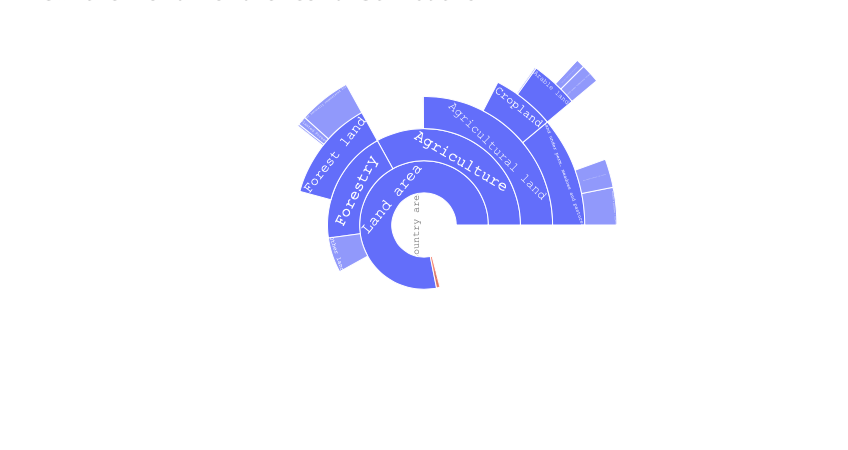

In [144]:
fig =go.Figure(go.Sunburst(
    labels=['Country area','Land area', 'Agriculture', 'Agricultural land', 'Cropland', 'Arable land', 'Land under temporary crops',
       'Land under temp. meadows and pastures', 'Land with temporary fallow', 'Land under permanent crops',
       'Land under perm. meadows and pastures', 'Perm. meadows & pastures - Cultivated',
       'Perm. meadows & pastures - Nat. growing', 'Land under protective cover', 'Forestry', 'Forest land',
       'Primary Forest', 'Other naturally regenerated forest', 'Planted Forest', 'Other land','Inland waters'],
    parents=['','Country area', 'Land area', 'Agriculture', 'Agricultural land', 'Cropland', 'Arable land',
       'Arable land', 'Arable land', 'Cropland', 'Agricultural land', 'Land under perm. meadows and pastures',
       'Land under perm. meadows and pastures', 'Agriculture', 'Land area', 'Forestry',
       'Forest land', 'Forest land', 'Forest land', 'Land area','Country area'],
    values=[4.1290390e+06, 3.9516030e+06, 1.5398066e+06, 1.5129990e+06,
       4.2308850e+05, 3.9818400e+05, 2.7100630e+05, 1.2422920e+05,
       2.9484000e+03, 2.4904500e+04, 1.0899105e+06, 6.1734310e+05,
       4.7256740e+05, 2.6807600e+04, 1.2540000e+06, 1.2540000e+06, 4.0000000e+04,
       1.0420000e+06, 1.7200000e+05, 1.1577964e+06, 1.7743600e+05],
))
# Update layout for tight margin

fig.update_layout(
    title='Switzerland land area distribution',
    #yaxis_title="Values [tonnes]",
    #barmode='stack', 
    margin = dict(t=0, l=0, r=0, b=0),
    font=dict(
        family="Courier New, monospace",
        size=16,
        color="#7f7f7f")
    )
py.plot(fig, filename='../doc/land_use_1.html')

fig.show()

<div class="alert alert-block alert-success">

**Country area =** Land area + Inland waters
    
**Land area =** Forestry + Agriculture + Other lands

**Forestry =** Forest land
    
**Agriculture =** Land under protective cover + Agricultural land
    
**Forest land =** Primary forset + Planted forest + Other naturally regenerated forest
    
**Agricultural land =** Cropland + Land under perm. meadows and pastures
    
**Cropland =** Arable land + Land under permanent crops
    
**Land under perm. meadows and pastures =** Perm. meadows and pastures Cultivated + Perm. meadows and pastures Nat. growing
    
**Arable land =** Land under temp. meadows and pastures + Land under temporary crops + Land under temp. fallow
    

###  Switzerland land area and agricultral land distribution, year 2017 -

**Dataset :** Land Use Area

**Data :** Area for different categories. Same data as before, but different visualization.

**Notes :** None.


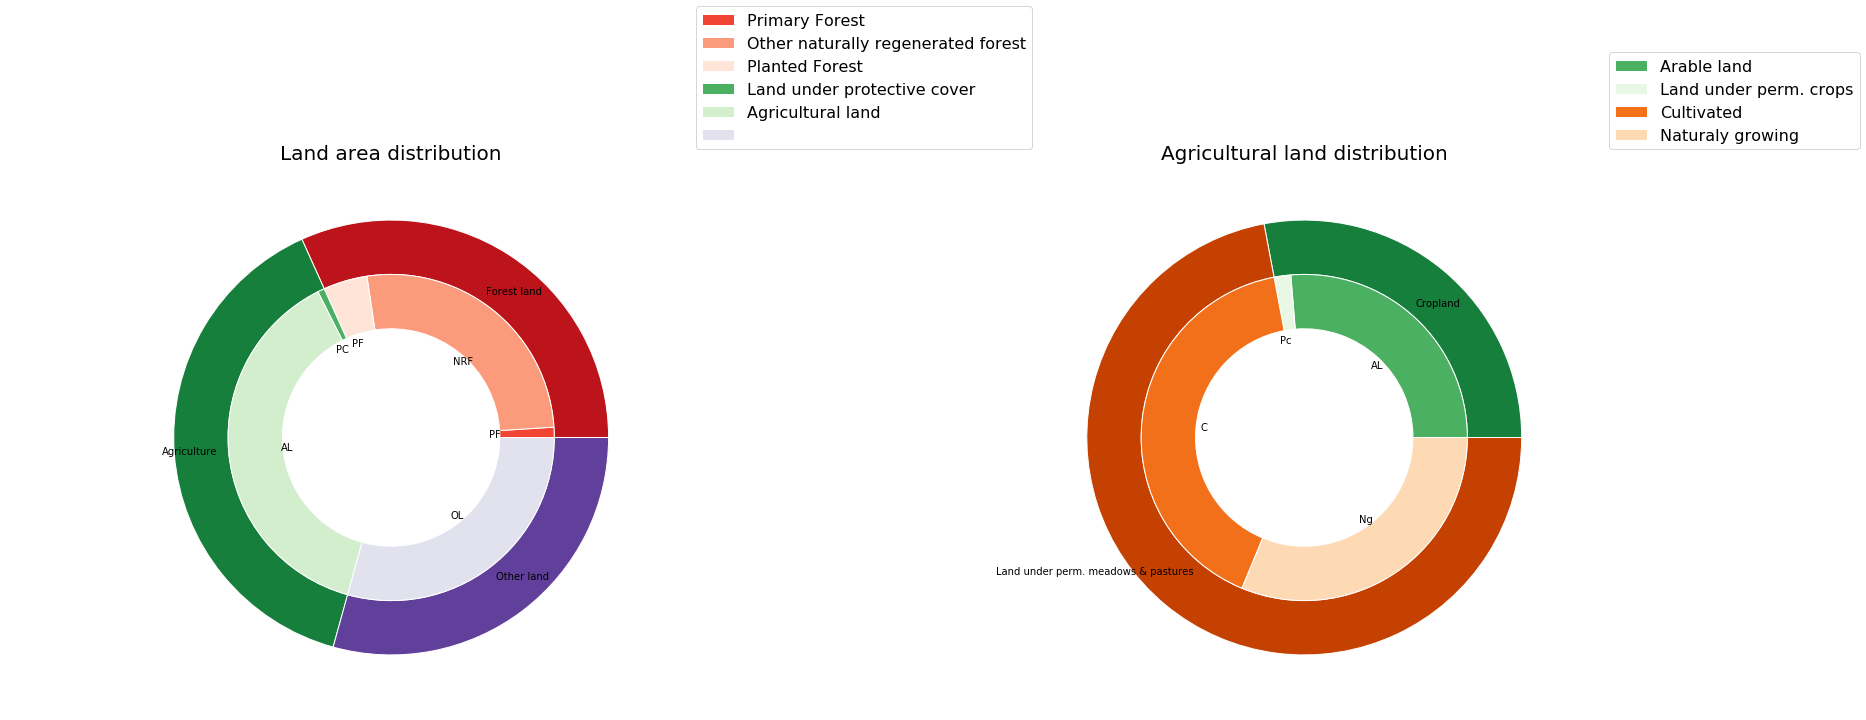

In [145]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(30,10))

size = 0.25

cmap1 = plt.cm.Reds
cmap2 = plt.cm.Greens
cmap3 = plt.cm.Purples
cmap4 = plt.cm.Oranges

outer_colors = [cmap1(.8), cmap2(.8), cmap3(.8)]
inner_colors = [*cmap1(np.linspace(.6, .1, 3)), *cmap2(np.linspace(.6, .2, 2)), *cmap3(np.linspace(.6, .2, 2))]
labels_1o = ['Forest land','Agriculture','Other land']
labels_1 = ['PF','NRF','PF','PC','AL','','OL','','']
labels_1i = ['Primary Forest','Other naturally regenerated forest','Planted Forest','Land under protective cover','Agricultural land','','Other land','','']
vals1 = np.array([[40000,1042000,172000], [26807.6,1512999,0], [1157796.4,0,0]])

ax1.axis('equal')
ax1.pie(vals1.sum(axis=1), radius=1, colors=outer_colors,labels=labels_1o, labeldistance=0.8, wedgeprops=dict(width=size, edgecolor='w'))
ax1.pie(vals1.flatten(), radius=1-size, colors=inner_colors, labels=labels_1, labeldistance=0.6, wedgeprops=dict(width=size, edgecolor='w'))
plt.margins(0,0)
ax1.set(aspect="equal", title='Land area distribution')
ax1.set_title(label='Land area distribution',fontsize=20)


labels_2o = ['Cropland','Land under perm. meadows & pastures']
labels_2 = ['AL','Pc','C','Ng']
labels_2i = ['Arable land','Land under perm. crops','Cultivated','Naturaly growing']
vals2 = np.array([[398184,24904.5], [617343.1,472567.4]])
              
ax2.axis('equal')
ax2.pie(vals2.sum(axis=1), radius=1, colors=[cmap2(.8), cmap4(.8)], labels=labels_2o, labeldistance=0.8, wedgeprops=dict(width=size, edgecolor='w'))
ax2.pie(vals2.flatten(), radius=1-size, colors=[*cmap2(np.linspace(.6, .1, 2)), *cmap4(np.linspace(.6, .2, 2))], labels=labels_2, labeldistance=0.6, wedgeprops=dict(width=size, edgecolor='w'))
plt.margins(0,0)
ax2.set(aspect="equal", title='Agricultural land distribution') 
ax2.set_title('Agricultural land distribution',fontsize=20)

fig.set_facecolor('white') #backgroung color
plt.legend(loc=(0.9, 0.1),fontsize=20,bbox_to_anchor=(0., 1.02, 1., .102))

handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles[3:], labels_1i, loc=(0.9, 0.1),fontsize=16, bbox_to_anchor=(0., 1.02, 1., .102))
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles[2:], labels_2i, loc=(0.9, 0.1),fontsize=16, bbox_to_anchor=(0., 1.02, 1., .102))
   

plt.show()


<div class="alert alert-block alert-success">

There are large parts of land that are unproper to agricultural use in Switzerland.    
Howerver, if Switzerland wanted to increase its area harvested, it could use all the fiels dedicated to animal husbandry (in a future were we would all be vegetarian), or at least make a better use of arable lands and/or land under permanent meadows and pastures (could be reduced a bit without much consequences).
    

###  Switzerland land area and agricultral land distribution, year 2017 

**Dataset :** Land Use Area

**Data :** Area for different categories

**Notes :** None. This is the version we are gonna keep, the most easy to read.


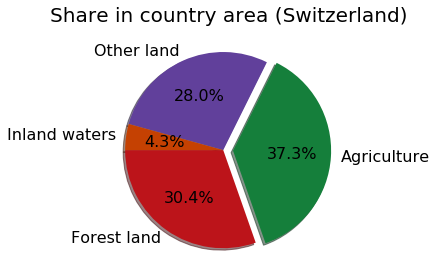

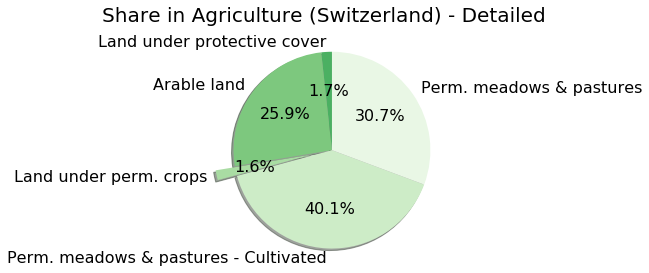

In [146]:
outer_colors = [cmap1(.8), cmap2(.8), cmap3(.8),cmap4(.8)]
inner_colors = [*cmap2(np.linspace(.6,.1,5))]


labels = 'Forest land', 'Agriculture', 'Other land', 'Inland waters'
sizes = [1254000, 1539806.6, 1157796.4, 177436]
explode = (0, 0.1, 0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=180, colors=outer_colors, textprops={'fontsize': 16})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig1.set_facecolor('white')
plt.title('Share in country area (Switzerland)',pad=20, fontsize=20)

plt.show()
theme = plt.get_cmap('bwr')


labels2 = ['Land under protective cover','Arable land','Land under perm. crops','Perm. meadows & pastures - Cultivated','Perm. meadows & pastures']
sizes2 = [26807.6, 398184, 24904.5, 617343.1, 472567.4]
explode2 = (0,0,0.2, 0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig2, ax2 = plt.subplots()
ax2.pie(sizes2, explode=explode2, labels=labels2, autopct='%1.1f%%', shadow=True, startangle=90,colors=inner_colors, textprops={'fontsize': 16})
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig2.set_facecolor('white')
plt.title('Share in Agriculture (Switzerland) - Detailed',pad=20, fontsize=20)

plt.show()

### Switzerland land cover, with artificial areas, year 2016  


**Dataset :** Land Cover

**Data :** Ditribution of land between artificial and natural areas

**Notes :** This plot overlaps a bit the others, but contains additional information about atrificial areas.


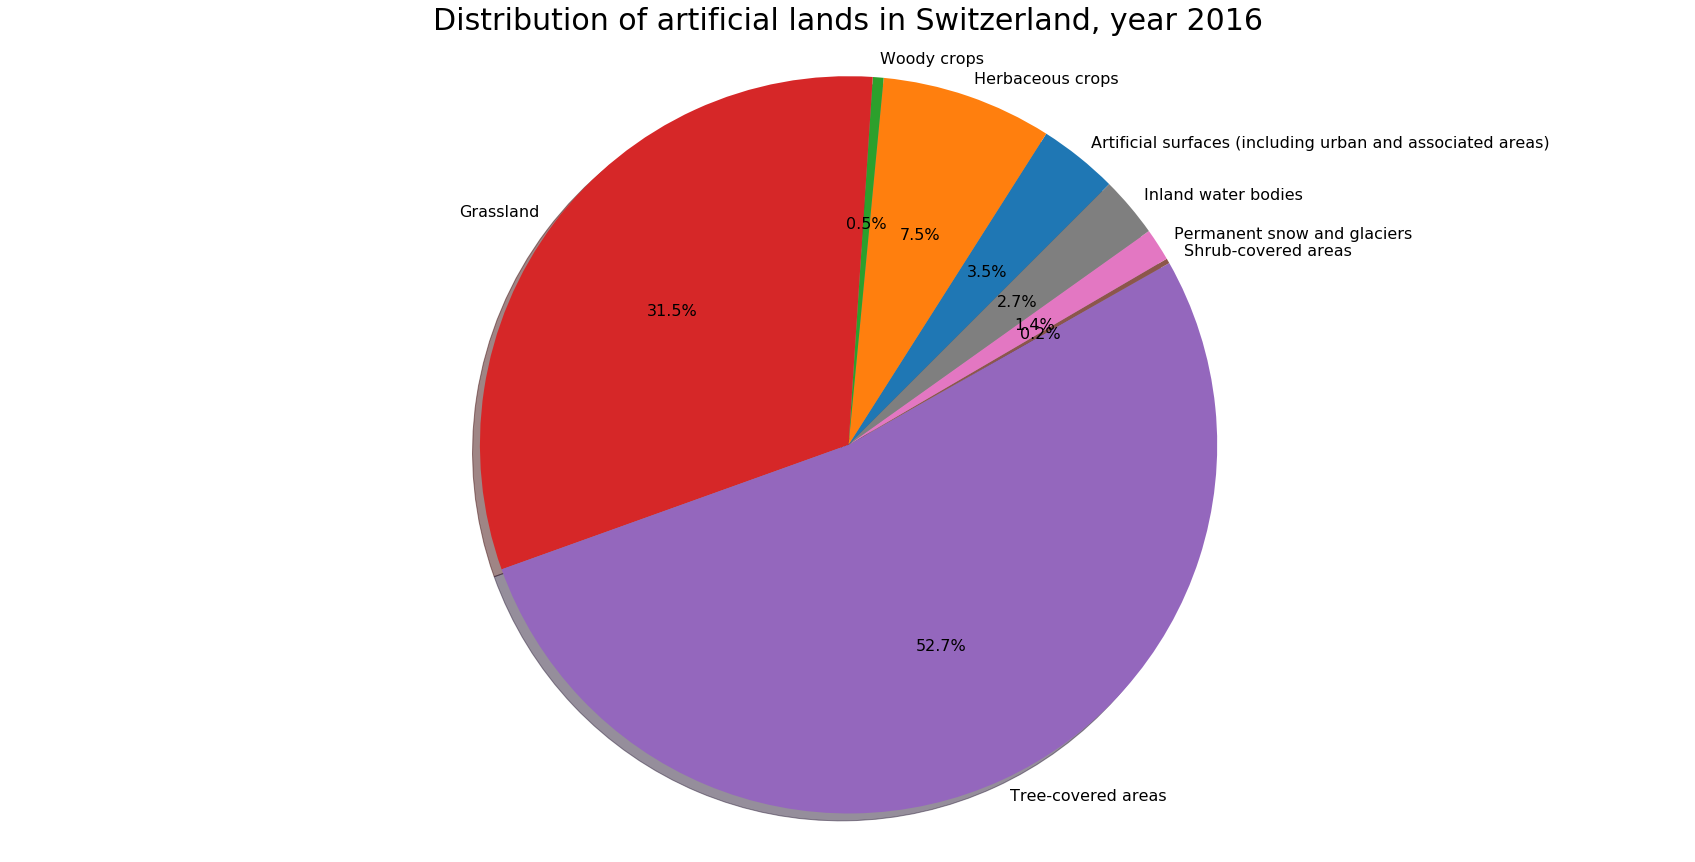

Domain         Area          Element  \
2885  Land Cover  Switzerland  Area from MODIS   
2926  Land Cover  Switzerland  Area from MODIS   
2967  Land Cover  Switzerland  Area from MODIS   
3049  Land Cover  Switzerland  Area from MODIS   
3090  Land Cover  Switzerland  Area from MODIS   
3172  Land Cover  Switzerland  Area from MODIS   
3336  Land Cover  Switzerland  Area from MODIS   
3377  Land Cover  Switzerland  Area from MODIS   

                                                   Item  Year Unit  \
2885  Artificial surfaces (including urban and assoc...  2016   ha   
2926                                   Herbaceous crops  2016   ha   
2967                                        Woody crops  2016   ha   
3049                                          Grassland  2016   ha   
3090                                 Tree-covered areas  2016   ha   
3172                                Shrub-covered areas  2016   ha   
3336                        Permanent snow and glaciers  2016   ha   
3377                                Inland water bodies  2016   ha   

     Flag Description    Surface  
2885  Calculated data   135557.0  
2926  Calculated data   290905.4  
2967  Calculated data    18276.2  
3049  Calculated data  1224520.4  
3090  Calculated data  2047342.7  
3172  Calculated data     8370.3  
3336  Calculated data    55339.0  
3377  Calculated data   103014.7

In [147]:
# DataFrames to plot
df_artificial_surface = raw_land_cover_dataset.loc[raw_land_cover_dataset['Area']=='Switzerland'].loc[raw_land_cover_dataset['Year']==2016].loc[raw_land_cover_dataset['Element']=='Area from MODIS']
# Pie plot #1
labels1 = df_artificial_surface.Item
sizes1 = df_artificial_surface.Surface

fig1, ax1 = plt.subplots(figsize=(30,15))
ax1.pie(sizes1, labels=labels1, labeldistance=1.05, autopct='%1.1f%%', shadow=True, startangle=45, textprops={'fontsize': 16})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Distribution of artificial lands in Switzerland, year 2016', fontsize=30)
fig1.set_facecolor('white')

# General settings
fig1.set_facecolor('white')
plt.show()
df_artificial_surface

<div class="alert alert-block alert-info">
    
Comparison with neighbours:
    
In Switzerland, 60,5 % of the lands are not usable for agriculture (sum of artificial, inland water bodies,snow and tree-covered areas).
    
In France, 51 % of the lands are not usable for agriculture. 
    
In Germany, 52,6 %
    
In Italy only 41,7%
    
In Austria 66,8 %
    
So compared to its neighbours Switzerland have one of the smallest ratio of usable lands for Agriculture but still manage to have the best yields. 
    
Now that we have the general distribution of lands for each country, lets focus our plots on the agriculture lands. 

### Domographic evolution of Switzerland over the years 

**Dataset :** Demography

**Data :** Population for different countries over years

**Notes :** None.


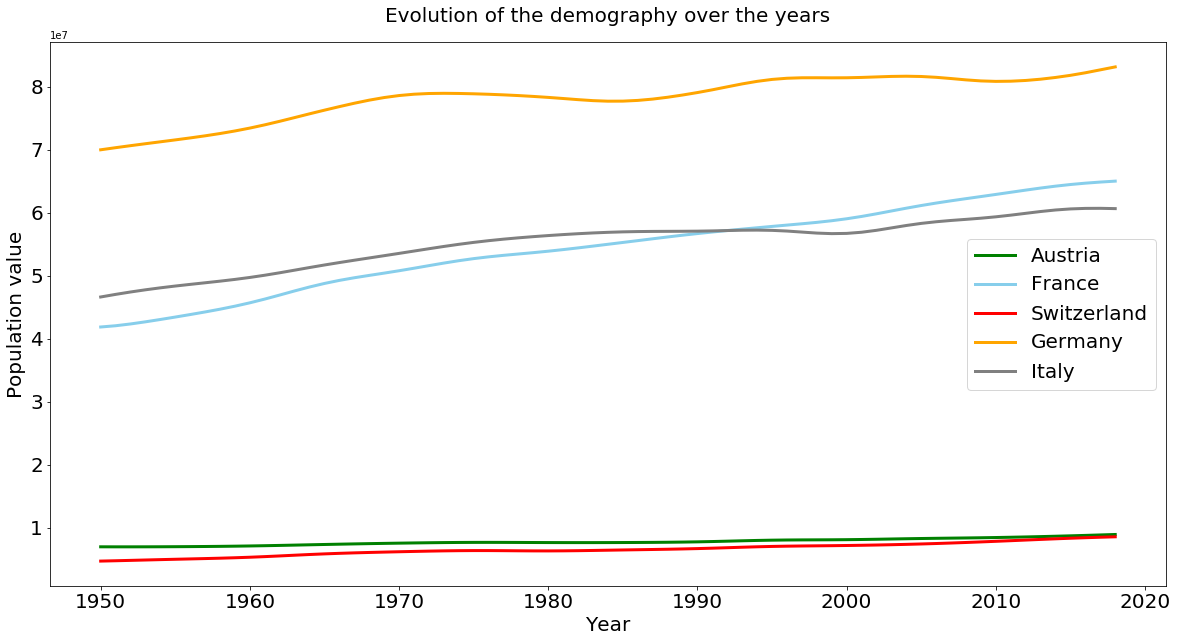

In [148]:
#plot of the evolution of the demography over the years

plt.figure(figsize=(20,10))
plt.plot( 'Year', 'Population', data=demography.loc[demography['Area']=='Austria'], marker='', color='green',  label = 'Austria', linewidth=3)
plt.plot( 'Year', 'Population', data=demography.loc[demography['Area']=='France'], marker='', color='skyblue', label = 'France', linewidth=3)
plt.plot( 'Year', 'Population', data=demography.loc[demography['Area']=='Switzerland'], marker='', color='red', label = 'Switzerland', linewidth=3)
plt.plot( 'Year', 'Population', data=demography.loc[demography['Area']=='Germany'], marker='', color='orange', label = 'Germany', linewidth=3)
plt.plot( 'Year', 'Population', data=demography.loc[demography['Area']=='Italy'], marker='', color='grey', label = 'Italy', linewidth=3)
    
plt.legend(fontsize=20) 
plt.title('Evolution of the demography over the years' , pad=20, fontsize= 20)
plt.xlabel("Year", fontsize= 20)
plt.ylabel("Population value", fontsize= 20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()
   
plt.show()

In [149]:
min_swiss_demography = demography[demography.Area.str.contains('Switzerland')].Population.min()
max_swiss_demography = demography[demography.Area.str.contains('Switzerland')].Population.max()
delta_swiss_demography= max_swiss_demography - min_swiss_demography
delta_swiss_demography

3857524.999999999

<div class="alert alert-block alert-success">
    
We can see that as expected, the population is growing in every country. From 1950 to 2018 the swiss population has increased by about 3,800,000 persons. It has almost doubled, so if the world's predictions about demographic growth reveal to be true for the next years, how could Switzerland become self-sufficcient? 
    

### Production, exports and imports of items in Switzerland over years. 

**Dataset :** Importaions/Exportations (CH) + Crops

**Data :** Importation and Exportations of different items , and Production

**Notes :** This plot is interactive. It allows you to choose for an item (apples, berries..) and shows you its production, exportation and importation in Switzerland over years. You can find a recording of it in the power point file.


In [150]:
#Interactive visualization

#Plot the production of selected item for all countries over years
def viz_evolution(item):
    df_viz_evolution = CH_data.loc[CH_data['Item']==item]
    
    # multiple line plot
    plt.figure(figsize=(20,10))
    plt.plot( 'Year', 'Produced Quantity', data=df_viz_evolution, marker='', color='red', label = 'production', linewidth=3)
    plt.plot('Year', 'Imported Quantity', data=df_viz_evolution, marker='', color='blue', label = 'imports', linewidth=3)
    plt.plot('Year', 'Exported Quantity', data=df_viz_evolution, marker='', color='green', label = 'exports', linewidth=3) 
    plt.legend(fontsize=20) 
    plt.title(f'Production and imports of {item} in Switzerland throughout years', fontsize= 20)
    plt.xlabel("Year", fontsize= 20)
    plt.ylabel("Values [tonnes]", fontsize= 20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.show()
    
   
items = CH_data.Item.unique()
interact(viz_evolution, item = items)    

interactive(children=(Dropdown(description='item', options=('Apples', 'Apricots', 'Artichokes', 'Asparagus', '…

<function __main__.viz_evolution(item)>

**Most produced, imported and exported products :**

- Most produced crops products

In [151]:
CH_data.loc[CH_data.Year == 2016].sort_values(by='Produced Quantity', ascending = False).head(10)

Area                 Item     Element  Year    Unit  \
1191  Switzerland           Sugar beet  Production  2016  tonnes   
1402  Switzerland                Wheat  Production  2016  tonnes   
982   Switzerland             Potatoes  Production  2016  tonnes   
30    Switzerland               Apples  Production  2016  tonnes   
119   Switzerland               Barley  Production  2016  tonnes   
641   Switzerland                Maize  Production  2016  tonnes   
493   Switzerland               Grapes  Production  2016  tonnes   
1033  Switzerland             Rapeseed  Production  2016  tonnes   
245   Switzerland  Carrots and turnips  Production  2016  tonnes   
594   Switzerland  Lettuce and chicory  Production  2016  tonnes   

      Produced Quantity  Exported Quantity  Imported Quantity  
1191          1277407.0               13.0            42914.0  
1402           386720.0             6491.0           484790.0  
982            372900.0             5245.0           104191.0  
30             227300.0             4157.0            11063.0  
119            159890.0              437.0            34152.0  
641            144406.0              181.0           165867.0  
493            136352.0               96.0            34096.0  
1033            71900.0               31.0            11978.0  
245             68433.0                0.0             4203.0  
594             65946.0               69.0            37433.0

- Most imported crops products

In [152]:
CH_data.loc[CH_data.Year == 2016].sort_values(by='Imported Quantity', ascending = False).head(10)

Area                   Item     Element  Year    Unit  \
1402  Switzerland                  Wheat  Production  2016  tonnes   
641   Switzerland                  Maize  Production  2016  tonnes   
982   Switzerland               Potatoes  Production  2016  tonnes   
729   Switzerland                   Oats  Production  2016  tonnes   
1191  Switzerland             Sugar beet  Production  2016  tonnes   
1280  Switzerland               Tomatoes  Production  2016  tonnes   
594   Switzerland    Lettuce and chicory  Production  2016  tonnes   
1338  Switzerland  Vegetables, fresh nes  Production  2016  tonnes   
119   Switzerland                 Barley  Production  2016  tonnes   
493   Switzerland                 Grapes  Production  2016  tonnes   

      Produced Quantity  Exported Quantity  Imported Quantity  
1402           386720.0             6491.0           484790.0  
641            144406.0              181.0           165867.0  
982            372900.0             5245.0           104191.0  
729              7106.0                8.0            50129.0  
1191          1277407.0               13.0            42914.0  
1280            41907.0               95.0            38360.0  
594             65946.0               69.0            37433.0  
1338            49909.0               92.0            34772.0  
119            159890.0              437.0            34152.0  
493            136352.0               96.0            34096.0

- Most exported crops products

In [153]:
CH_data.loc[CH_data.Year == 2016].sort_values(by='Exported Quantity', ascending = False).head(10)

Area                     Item     Element  Year    Unit  \
1402  Switzerland                    Wheat  Production  2016  tonnes   
982   Switzerland                 Potatoes  Production  2016  tonnes   
30    Switzerland                   Apples  Production  2016  tonnes   
1248  Switzerland  Tobacco, unmanufactured  Production  2016  tonnes   
119   Switzerland                   Barley  Production  2016  tonnes   
746   Switzerland             Oilseeds nes  Production  2016  tonnes   
641   Switzerland                    Maize  Production  2016  tonnes   
1095  Switzerland                 Soybeans  Production  2016  tonnes   
609   Switzerland                  Linseed  Production  2016  tonnes   
1216  Switzerland           Sunflower seed  Production  2016  tonnes   

      Produced Quantity  Exported Quantity  Imported Quantity  
1402           386720.0             6491.0           484790.0  
982            372900.0             5245.0           104191.0  
30             227300.0             4157.0            11063.0  
1248             1013.0             1391.0            17182.0  
119            159890.0              437.0            34152.0  
746                66.0              228.0             1908.0  
641            144406.0              181.0           165867.0  
1095             4500.0              161.0            12695.0  
609               286.0              130.0             6945.0  
1216            13000.0              125.0             5213.0

In [154]:
total_export_quantity = CH_data["Exported Quantity"].sum()
total_import_quantity = CH_data["Imported Quantity"].sum()
dv=total_import_quantity/total_export_quantity
print('Ratio import/export :',dv.round(2))

Ratio import/export : 69.99


<div class="alert alert-block alert-success">
    
We can see that some of the most produced items are also some of the more imported like potatoes, wheat, maize, grappes, lettuce and chicory and sugar beet. This can show a high consumption of the item by the population and can indicate us that one of the priority could be to increase their production in order to also increase the SSR. 
    
In the more exported items, it is not suprising to find several items that are highly produced by Switzerland such as wheat, potatoes, apples, maise and Barley.  
When summing the total amount of exported and imported products we can see that Switzerland import 70 times more products than it exports. 

**Less produced, imported and exported products :**

- Less produced crops products

In [155]:
CH_data.loc[CH_data.Year == 2016].sort_values(by='Produced Quantity', ascending = True).head(10)

Area                             Item     Element  Year    Unit  \
656  Switzerland  Melons, other (inc.cantaloupes)  Production  2016  tonnes   
72   Switzerland                       Artichokes  Production  2016  tonnes   
524  Switzerland                             Hops  Production  2016  tonnes   
449  Switzerland                           Garlic  Production  2016  tonnes   
434  Switzerland                 Fruit, fresh nes  Production  2016  tonnes   
746  Switzerland                     Oilseeds nes  Production  2016  tonnes   
402  Switzerland                         Currants  Production  2016  tonnes   
665  Switzerland                           Millet  Production  2016  tonnes   
332  Switzerland                         Chestnut  Production  2016  tonnes   
824  Switzerland           Peaches and nectarines  Production  2016  tonnes   

     Produced Quantity  Exported Quantity  Imported Quantity  
656                0.0               21.0            26881.0  
72                 3.0                1.0             1514.0  
524               31.0               29.0              143.0  
449               34.0               18.0             3226.0  
434               35.0               25.0             6360.0  
746               66.0              228.0             1908.0  
402               66.0                NaN               89.0  
665              152.0                NaN             2861.0  
332              177.0               56.0             2676.0  
824              244.0               29.0            31303.0

<div class="alert alert-block alert-success">
    Does the less produced items corresponds to the most imported ones? 
    we can see that none of these items figured in the most imported ones.. is it related to the consumption trends of swiss people? Is it necessary to increase their production if they do not seems necessary? 
    The only ecxeption is Oilseed nes but as discussed previously they are also exported. 
    
    

- Less imported products

In [156]:
CH_data.loc[CH_data.Year == 2016].sort_values(by='Imported Quantity', ascending = True).head(10)

Area                           Item     Element  Year    Unit  \
402   Switzerland                       Currants  Production  2016  tonnes   
524   Switzerland                           Hops  Production  2016  tonnes   
1306  Switzerland                      Triticale  Production  2016  tonnes   
1003  Switzerland                        Quinces  Production  2016  tonnes   
918   Switzerland                    Peas, green  Production  2016  tonnes   
181   Switzerland  Broad beans, horse beans, dry  Production  2016  tonnes   
1370  Switzerland            Walnuts, with shell  Production  2016  tonnes   
72    Switzerland                     Artichokes  Production  2016  tonnes   
1127  Switzerland                        Spinach  Production  2016  tonnes   
746   Switzerland                   Oilseeds nes  Production  2016  tonnes   

      Produced Quantity  Exported Quantity  Imported Quantity  
402                66.0                NaN               89.0  
524                31.0               29.0              143.0  
1306            36178.0                2.0              333.0  
1003              390.0                5.0              427.0  
918              4398.0                1.0              632.0  
181              1691.0                0.0              983.0  
1370             2547.0                0.0             1139.0  
72                  3.0                1.0             1514.0  
1127            15483.0               17.0             1893.0  
746                66.0              228.0             1908.0

<div class="alert alert-block alert-success">
    Does the less imported items corresponds to the most produced and exported ones? which would suggest high sufficiency of the items. 
    we can see not math between the less imported and the most imported an produced items. 
    

- less exported crops products

In [157]:
CH_data.loc[CH_data.Year == 2016].sort_values(by='Exported Quantity', ascending = True).head(10)

Area                                Item     Element  Year  \
1370  Switzerland                 Walnuts, with shell  Production  2016   
562   Switzerland  Leeks, other alliaceous vegetables  Production  2016   
1065  Switzerland                                 Rye  Production  2016   
181   Switzerland       Broad beans, horse beans, dry  Production  2016   
245   Switzerland                 Carrots and turnips  Production  2016   
918   Switzerland                         Peas, green  Production  2016   
72    Switzerland                          Artichokes  Production  2016   
547   Switzerland                          Kiwi fruit  Production  2016   
347   Switzerland         Chillies and peppers, green  Production  2016   
309   Switzerland                            Cherries  Production  2016   

        Unit  Produced Quantity  Exported Quantity  Imported Quantity  
1370  tonnes             2547.0                0.0             1139.0  
562   tonnes            13668.0                0.0             3057.0  
1065  tonnes             8411.0                0.0             2780.0  
181   tonnes             1691.0                0.0              983.0  
245   tonnes            68433.0                0.0             4203.0  
918   tonnes             4398.0                1.0              632.0  
72    tonnes                3.0                1.0             1514.0  
547   tonnes              375.0                1.0            11612.0  
347   tonnes              725.0                1.0            32609.0  
309   tonnes             5685.0                1.0             3287.0

<div class="alert alert-block alert-success">

Are the less exported items the less produced and the more imported ones? 
    No similarities between the less produced and the less exported items, same for importations. 
    

### Production, exports and imports of items for CH neigbours over years

**Dataset :** Importaions/Exportations (I)(FR)(G)(AU) + crops

**Data :**  Most produced/imported/expoted items 

**Notes :** No plots, just values.


#### Italy

- Most produced Items

In [158]:
Italy_data.loc[Italy_data.Year == 2016].sort_values(by='Produced Quantity', ascending = False).head(10)

Area                    Item     Element  Year    Unit  \
882   Italy                  Grapes  Production  2016  tonnes   
2243  Italy                   Wheat  Production  2016  tonnes   
1110  Italy                   Maize  Production  2016  tonnes   
2095  Italy                Tomatoes  Production  2016  tonnes   
37    Italy                  Apples  Production  2016  tonnes   
1274  Italy                  Olives  Production  2016  tonnes   
1935  Italy              Sugar beet  Production  2016  tonnes   
2147  Italy   Vegetables, fresh nes  Production  2016  tonnes   
1357  Italy                 Oranges  Production  2016  tonnes   
1389  Italy  Peaches and nectarines  Production  2016  tonnes   

      Produced Quantity  Exported Quantity  Imported Quantity  
882           8201914.0           481267.0            23015.0  
2243          8037872.0           454141.0          7652728.0  
1110          6839499.0            54512.0          4466655.0  
2095          6437572.0           104937.0           117826.0  
37            2455616.0          1049438.0            63269.0  
1274          2092175.0             2432.0             8291.0  
1935          2046297.0               12.0              676.0  
2147          2026477.0           254298.0            30084.0  
1357          1495067.0           151742.0           136825.0  
1389          1427573.0           252591.0           101654.0

- Most exported Items

In [159]:
Italy_data.loc[Italy_data.Year == 2016].sort_values(by='Exported Quantity', ascending = False).head(10)

Area                    Item     Element  Year    Unit  \
37    Italy                  Apples  Production  2016  tonnes   
882   Italy                  Grapes  Production  2016  tonnes   
2243  Italy                   Wheat  Production  2016  tonnes   
918   Italy              Kiwi fruit  Production  2016  tonnes   
2147  Italy   Vegetables, fresh nes  Production  2016  tonnes   
1389  Italy  Peaches and nectarines  Production  2016  tonnes   
2211  Italy             Watermelons  Production  2016  tonnes   
1421  Italy                   Pears  Production  2016  tonnes   
1357  Italy                 Oranges  Production  2016  tonnes   
1587  Italy                Potatoes  Production  2016  tonnes   

      Produced Quantity  Exported Quantity  Imported Quantity  
37            2455616.0          1049438.0            63269.0  
882           8201914.0           481267.0            23015.0  
2243          8037872.0           454141.0          7652728.0  
918            523595.0           413081.0            51007.0  
2147          2026477.0           254298.0            30084.0  
1389          1427573.0           252591.0           101654.0  
2211           534001.0           230118.0            35023.0  
1421           701928.0           152866.0            92657.0  
1357          1495067.0           151742.0           136825.0  
1587          1368920.0           133203.0           637511.0

- Most imported Items

In [160]:
Italy_data.loc[Italy_data.Year == 2016].sort_values(by='Imported Quantity', ascending = False).head(10)

Area            Item     Element  Year    Unit  Produced Quantity  \
2243  Italy           Wheat  Production  2016  tonnes          8037872.0   
1110  Italy           Maize  Production  2016  tonnes          6839499.0   
1839  Italy        Soybeans  Production  2016  tonnes          1081340.0   
197   Italy          Barley  Production  2016  tonnes           988285.0   
165   Italy         Bananas  Production  2016  tonnes              356.0   
1587  Italy        Potatoes  Production  2016  tonnes          1368920.0   
1967  Italy  Sunflower seed  Production  2016  tonnes           268331.0   
1357  Italy         Oranges  Production  2016  tonnes          1495067.0   
229   Italy      Beans, dry  Production  2016  tonnes            11702.0   
2095  Italy        Tomatoes  Production  2016  tonnes          6437572.0   

      Exported Quantity  Imported Quantity  
2243           454141.0          7652728.0  
1110            54512.0          4466655.0  
1839            29294.0          1455162.0  
197              3000.0           731741.0  
165             44609.0           712475.0  
1587           133203.0           637511.0  
1967            11176.0           225316.0  
1357           151742.0           136825.0  
229              5495.0           133897.0  
2095           104937.0           117826.0

#### France

- Most produced Items

In [161]:
France_data.loc[France_data.Year == 2016].sort_values(by='Produced Quantity', ascending = False).head(10)

Area            Item     Element  Year    Unit  Produced Quantity  \
1973  France      Sugar beet  Production  2016  tonnes         33794906.0   
2260  France           Wheat  Production  2016  tonnes         29504454.0   
1132  France           Maize  Production  2016  tonnes         12131249.0   
192   France          Barley  Production  2016  tonnes         10306008.0   
1697  France        Potatoes  Production  2016  tonnes          6834680.0   
872   France          Grapes  Production  2016  tonnes          6247034.0   
1785  France        Rapeseed  Production  2016  tonnes          4727961.0   
34    France          Apples  Production  2016  tonnes          1819762.0   
2133  France       Triticale  Production  2016  tonnes          1448116.0   
2005  France  Sunflower seed  Production  2016  tonnes          1189832.0   

      Exported Quantity  Imported Quantity  
1973             1382.0              193.0  
2260         18343653.0           936885.0  
1132          5440854.0           466904.0  
192           5868273.0            60982.0  
1697          1846822.0           438113.0  
872             17385.0           143859.0  
1785          1484478.0          1029140.0  
34             573469.0           177164.0  
2133            36758.0            12975.0  
2005           303217.0           406000.0

- Most exported Items

In [162]:
France_data.loc[France_data.Year == 2016].sort_values(by='Exported Quantity', ascending = False).head(10)

Area                Item     Element  Year    Unit  Produced Quantity  \
2260  France               Wheat  Production  2016  tonnes         29504454.0   
192   France              Barley  Production  2016  tonnes         10306008.0   
1132  France               Maize  Production  2016  tonnes         12131249.0   
1697  France            Potatoes  Production  2016  tonnes          6834680.0   
1785  France            Rapeseed  Production  2016  tonnes          4727961.0   
34    France              Apples  Production  2016  tonnes          1819762.0   
1570  France           Peas, dry  Production  2016  tonnes           538690.0   
2005  France      Sunflower seed  Production  2016  tonnes          1189832.0   
2101  France            Tomatoes  Production  2016  tonnes           640940.0   
742   France  Flax fibre and tow  Production  2016  tonnes           587047.0   

      Exported Quantity  Imported Quantity  
2260         18343653.0           936885.0  
192           5868273.0            60982.0  
1132          5440854.0           466904.0  
1697          1846822.0           438113.0  
1785          1484478.0          1029140.0  
34             573469.0           177164.0  
1570           367907.0            37718.0  
2005           303217.0           406000.0  
2101           247053.0           537315.0  
742            143166.0             1376.0

- Most imported Items

In [163]:
France_data.loc[France_data.Year == 2016].sort_values(by='Imported Quantity', ascending = False).head(10)

Area                                          Item     Element  Year  \
1879  France                                      Soybeans  Production  2016   
1785  France                                      Rapeseed  Production  2016   
2260  France                                         Wheat  Production  2016   
2101  France                                      Tomatoes  Production  2016   
1474  France                                       Oranges  Production  2016   
1132  France                                         Maize  Production  2016   
1697  France                                      Potatoes  Production  2016   
2005  France                                Sunflower seed  Production  2016   
2037  France  Tangerines, mandarins, clementines, satsumas  Production  2016   
2164  France                         Vegetables, fresh nes  Production  2016   

        Unit  Produced Quantity  Exported Quantity  Imported Quantity  
1879  tonnes           338864.0           108889.0          1082549.0  
1785  tonnes          4727961.0          1484478.0          1029140.0  
2260  tonnes         29504454.0         18343653.0           936885.0  
2101  tonnes           640940.0           247053.0           537315.0  
1474  tonnes             4591.0            46100.0           503291.0  
1132  tonnes         12131249.0          5440854.0           466904.0  
1697  tonnes          6834680.0          1846822.0           438113.0  
2005  tonnes          1189832.0           303217.0           406000.0  
2037  tonnes            43134.0            36789.0           368098.0  
2164  tonnes           829590.0            69938.0           195039.0

#### Austria

- Most produced items

In [164]:
Austria_data.loc[Austria_data.Year == 2016].sort_values(by='Produced Quantity', ascending = False).head(10)

Area         Item     Element  Year    Unit  Produced Quantity  \
1380  Austria   Sugar beet  Production  2016  tonnes          3534415.0   
758   Austria        Maize  Production  2016  tonnes          2179587.0   
1627  Austria        Wheat  Production  2016  tonnes          1970364.0   
126   Austria       Barley  Production  2016  tonnes           859702.0   
1159  Austria     Potatoes  Production  2016  tonnes           767261.0   
1497  Austria    Triticale  Production  2016  tonnes           322560.0   
623   Austria       Grapes  Production  2016  tonnes           260337.0   
1246  Austria          Rye  Production  2016  tonnes           188384.0   
935   Austria  Onions, dry  Production  2016  tonnes           163292.0   
1284  Austria     Soybeans  Production  2016  tonnes           152599.0   

      Exported Quantity  Imported Quantity  
1380           163014.0                6.0  
758            391436.0           902704.0  
1627           741327.0           922677.0  
126            115194.0           181972.0  
1159            34251.0           171180.0  
1497             5134.0            14559.0  
623             11086.0            43038.0  
1246             8915.0            16705.0  
935             41509.0            10594.0  
1284            60359.0           122953.0

- Most exported items

In [165]:
Austria_data.loc[Austria_data.Year == 2016].sort_values(by='Exported Quantity', ascending = False).head(10)

Area            Item     Element  Year    Unit  Produced Quantity  \
1627  Austria           Wheat  Production  2016  tonnes          1970364.0   
758   Austria           Maize  Production  2016  tonnes          2179587.0   
1380  Austria      Sugar beet  Production  2016  tonnes          3534415.0   
126   Austria          Barley  Production  2016  tonnes           859702.0   
30    Austria          Apples  Production  2016  tonnes           101667.0   
1284  Austria        Soybeans  Production  2016  tonnes           152599.0   
1412  Austria  Sunflower seed  Production  2016  tonnes            59917.0   
935   Austria     Onions, dry  Production  2016  tonnes           163292.0   
1214  Austria        Rapeseed  Production  2016  tonnes           141893.0   
1159  Austria        Potatoes  Production  2016  tonnes           767261.0   

      Exported Quantity  Imported Quantity  
1627           741327.0           922677.0  
758            391436.0           902704.0  
1380           163014.0                6.0  
126            115194.0           181972.0  
30              83246.0           126281.0  
1284            60359.0           122953.0  
1412            54250.0           134545.0  
935             41509.0            10594.0  
1214            36561.0           305597.0  
1159            34251.0           171180.0

- Most imported items

In [166]:
Austria_data.loc[Austria_data.Year == 2016].sort_values(by='Imported Quantity', ascending = False).head(10)

Area                         Item     Element  Year    Unit  \
1627  Austria                        Wheat  Production  2016  tonnes   
758   Austria                        Maize  Production  2016  tonnes   
1214  Austria                     Rapeseed  Production  2016  tonnes   
126   Austria                       Barley  Production  2016  tonnes   
1159  Austria                     Potatoes  Production  2016  tonnes   
1412  Austria               Sunflower seed  Production  2016  tonnes   
30    Austria                       Apples  Production  2016  tonnes   
1284  Austria                     Soybeans  Production  2016  tonnes   
1474  Austria                     Tomatoes  Production  2016  tonnes   
405   Austria  Chillies and peppers, green  Production  2016  tonnes   

      Produced Quantity  Exported Quantity  Imported Quantity  
1627          1970364.0           741327.0           922677.0  
758           2179587.0           391436.0           902704.0  
1214           141893.0            36561.0           305597.0  
126            859702.0           115194.0           181972.0  
1159           767261.0            34251.0           171180.0  
1412            59917.0            54250.0           134545.0  
30             101667.0            83246.0           126281.0  
1284           152599.0            60359.0           122953.0  
1474            55068.0            11480.0            53914.0  
405             14547.0            25944.0            52814.0

#### Germany

- Most produceditems

In [167]:
Germany_data.loc[Germany_data.Year == 2016].sort_values(by='Produced Quantity', ascending = False).head(10)

Area        Item     Element  Year    Unit  Produced Quantity  \
1246  Germany  Sugar beet  Production  2016  tonnes         25497200.0   
1466  Germany       Wheat  Production  2016  tonnes         24463800.0   
1045  Germany    Potatoes  Production  2016  tonnes         10772100.0   
126   Germany      Barley  Production  2016  tonnes         10730500.0   
1091  Germany    Rapeseed  Production  2016  tonnes          4579600.0   
681   Germany       Maize  Production  2016  tonnes          4017800.0   
1121  Germany         Rye  Production  2016  tonnes          3173800.0   
1371  Germany   Triticale  Production  2016  tonnes          2397300.0   
518   Germany      Grapes  Production  2016  tonnes          1225570.0   
30    Germany      Apples  Production  2016  tonnes          1032913.0   

      Exported Quantity  Imported Quantity  
1246            74335.0             2311.0  
1466         10170166.0          4781619.0  
1045          1840718.0           603021.0  
126           2897982.0          1281562.0  
1091           123259.0          5487059.0  
681            439350.0          2300333.0  
1121           194045.0           292426.0  
1371            96423.0           309264.0  
518             28240.0           328466.0  
30              88972.0           610955.0

- Most exported items

In [168]:
Germany_data.loc[Germany_data.Year == 2016].sort_values(by='Exported Quantity', ascending = False).head(10)

Area         Item     Element  Year    Unit  Produced Quantity  \
1466  Germany        Wheat  Production  2016  tonnes         24463800.0   
126   Germany       Barley  Production  2016  tonnes         10730500.0   
1045  Germany     Potatoes  Production  2016  tonnes         10772100.0   
681   Germany        Maize  Production  2016  tonnes          4017800.0   
1121  Germany          Rye  Production  2016  tonnes          3173800.0   
1091  Germany     Rapeseed  Production  2016  tonnes          4579600.0   
1371  Germany    Triticale  Production  2016  tonnes          2397300.0   
1150  Germany     Soybeans  Production  2016  tonnes            41000.0   
30    Germany       Apples  Production  2016  tonnes          1032913.0   
810   Germany  Onions, dry  Production  2016  tonnes           522677.0   

      Exported Quantity  Imported Quantity  
1466         10170166.0          4781619.0  
126           2897982.0          1281562.0  
1045          1840718.0           603021.0  
681            439350.0          2300333.0  
1121           194045.0           292426.0  
1091           123259.0          5487059.0  
1371            96423.0           309264.0  
1150            92171.0          3142407.0  
30              88972.0           610955.0  
810             82939.0           248472.0

- Most imported items

In [169]:
Germany_data.loc[Germany_data.Year == 2016].sort_values(by='Imported Quantity', ascending = False).head(10)

Area                    Item     Element  Year    Unit  \
1091  Germany                Rapeseed  Production  2016  tonnes   
1466  Germany                   Wheat  Production  2016  tonnes   
1150  Germany                Soybeans  Production  2016  tonnes   
681   Germany                   Maize  Production  2016  tonnes   
126   Germany                  Barley  Production  2016  tonnes   
1339  Germany                Tomatoes  Production  2016  tonnes   
30    Germany                  Apples  Production  2016  tonnes   
1045  Germany                Potatoes  Production  2016  tonnes   
773   Germany                    Oats  Production  2016  tonnes   
423   Germany  Cucumbers and gherkins  Production  2016  tonnes   

      Produced Quantity  Exported Quantity  Imported Quantity  
1091          4579600.0           123259.0          5487059.0  
1466         24463800.0         10170166.0          4781619.0  
1150            41000.0            92171.0          3142407.0  
681           4017800.0           439350.0          2300333.0  
126          10730500.0          2897982.0          1281562.0  
1339            85287.0            18094.0           738549.0  
30            1032913.0            88972.0           610955.0  
1045         10772100.0          1840718.0           603021.0  
773            535900.0            45117.0           475865.0  
423            260915.0            38538.0           465775.0

<div class="alert alert-block alert-success">

We can observe that apples, maize, potatoes, wheat, Barley, Grapes and Sugar beet are important items for all countries as they are often among the most produced, exported and imported items. 
So we can focus our study on those products to answer the question of swiss food suficiency. 


### Production, importation and exportation for 7 main produced items in Switzerland

**Dataset :** Imp/Exp (CH) + Crops

**Data :** Values of production, importation and exportation

**Notes :** This plot is interactive.

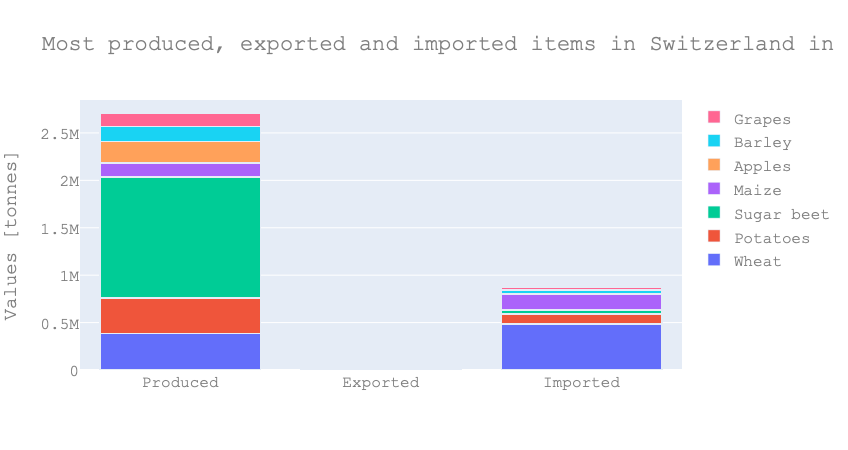

In [170]:
import plotly # conda install -c anaconda plotly #AND# jupyter labextension install @jupyterlab/plotly-extension
import plotly.graph_objects as go
y_wheat = CH_data.loc[CH_data.Year == 2016].loc[CH_data.Item=='Wheat'].values[0,-3:]
y_potatoes = CH_data.loc[CH_data.Year == 2016].loc[CH_data.Item=='Potatoes'].values[0,-3:]
y_beet = CH_data.loc[CH_data.Year == 2016].loc[CH_data.Item=='Sugar beet'].values[0,-3:]
y_maize = CH_data.loc[CH_data.Year == 2016].loc[CH_data.Item=='Maize'].values[0,-3:]
y_apples = CH_data.loc[CH_data.Year == 2016].loc[CH_data.Item=='Apples'].values[0,-3:]
y_barley = CH_data.loc[CH_data.Year == 2016].loc[CH_data.Item=='Barley'].values[0,-3:]
y_grapes = CH_data.loc[CH_data.Year == 2016].loc[CH_data.Item=='Grapes'].values[0,-3:]



x=['Produced', 'Exported', 'Imported']
fig = go.Figure(go.Bar(x=x, y=y_wheat, name='Wheat'))
fig.add_trace(go.Bar(x=x, y=y_potatoes, name='Potatoes'))
fig.add_trace(go.Bar(x=x, y=y_beet, name='Sugar beet'))
fig.add_trace(go.Bar(x=x, y=y_maize, name='Maize'))
fig.add_trace(go.Bar(x=x, y=y_apples, name='Apples'))
fig.add_trace(go.Bar(x=x, y=y_barley, name='Barley'))
fig.add_trace(go.Bar(x=x, y=y_grapes, name='Grapes'))

fig.update_layout(
    title='Most produced, exported and imported items in Switzerland in 2016',
    yaxis_title="Values [tonnes]",
    barmode='stack', 
    font=dict(
        family="Courier New, monospace",
        size=16,
        color="#7f7f7f")
    )
plotly.offline.plot(fig, filename='../doc/prod_imp_exp_7main.html')
fig.show()

Switzerland is a small exporter and produces more than its imports.
We will check their evolution over the years in the next graph.

###  Plot production,  importation and exportation of selected item in Switzerland throughout years 

**Dataset :** Importaions/Exportations (CH) + Crops

**Data :** Importation and Exportations of different items 

**Notes :** This plot is interactive. You can find a recording of it in the power point file.


In [171]:
import plotly.graph_objects as go

def viz_potatoe(item):
    y_wheat = CH_data.loc[CH_data.Item==item].values[:,-3:]
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=CH_data.Year.unique(), y=y_wheat[:,0], fill='tonexty', name='Produced')) # fill down to xaxis
    fig.add_trace(go.Scatter(x=CH_data.Year.unique(), y=y_wheat[:,1], fill='tozeroy', name='Exported')) # fill to trace0 y
    fig.add_trace(go.Scatter(x=CH_data.Year.unique(), y=y_wheat[:,2], fill='tonexty', name='Imported')) # fill to trace0 y
    fig.update_layout(
        title=f"{item} importations and productions throughout years in Switzerland",
        yaxis_title="Values [tonnes]",
        xaxis_title='Years'
        )
    fig.show()

items = CH_data.Item.unique()
interact(viz_potatoe, item = items)  


interactive(children=(Dropdown(description='item', options=('Apples', 'Apricots', 'Artichokes', 'Asparagus', '…

<function __main__.viz_potatoe(item)>

### Plot production,  importation and exportation in Switzerland throughout years (Sum) 

**Dataset :** Importaions/Exportations (CH) + Crops

**Data :** Importation and Exportations of different items 

**Notes :** This plot is interactive. Shows values upon cursor selection. As reported before, values of exportations are much lower than those of production and importations. Hence, exportations values will now be plot separately, to better show their trend.


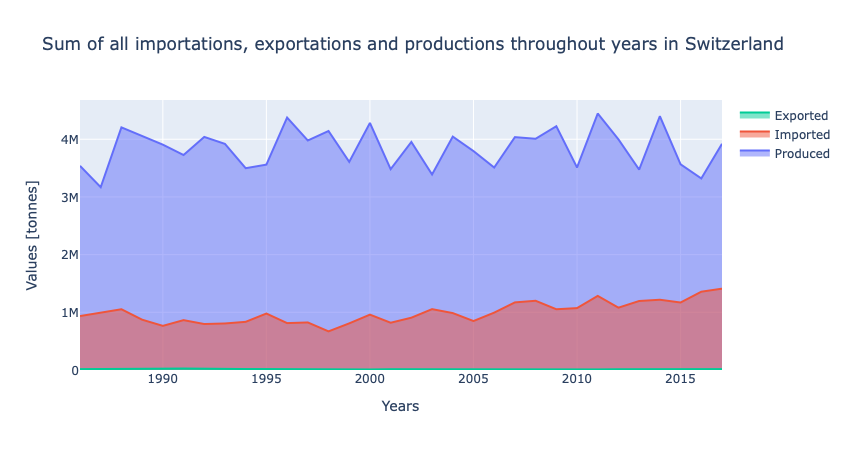

In [172]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=CH_data.Year.unique(), y=total_crops_imports['Produced Quantity'].values, fill='tonexty', name='Produced')) # fill down to xaxis
fig.add_trace(go.Scatter(x=CH_data.Year.unique(), y=total_crops_imports['Imported Quantity'].values, fill='tozeroy', name='Imported')) # fill to trace0 y
fig.add_trace(go.Scatter(x=CH_data.Year.unique(), y=total_crops_imports['Exported Quantity'].values, fill='tozeroy', name='Exported'))
fig.update_layout(
    title="Sum of all importations, exportations and productions throughout years in Switzerland",
    yaxis_title="Values [tonnes]",
    xaxis_title='Years'
    )
plotly.offline.plot(fig, filename='../doc/prod_imp_exp_sum.html')
fig.show()

<div class="alert alert-block alert-success">
    
Here again we can see that Switzerland is a very small exporter and is quite constant with its importations. Nevertheless, its importations seems to be slightly increasing since 2005. Is it because of demand for food diversity or because of production issues? Since The production values through years seems constantly varying we could follow the first hypothesis (food diversity can be seen as a consequence of the mondialisation). 
However, another point of view of the increase of importations could be seen as the direct consequence of the demography increase and the production remains constant. The further analysis of exotic importation will help us to complement this question.

As the exportations are hardly visible on the previous graph due to scale differences, we will plot them alone.

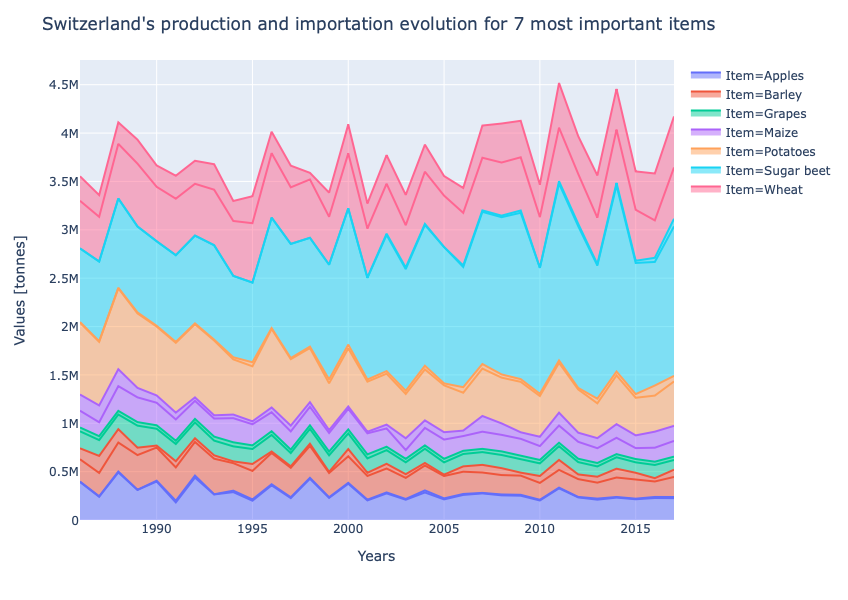

In [173]:
fig = px.area(CH_restrained, x="Year", y="Value", color='Item',
      line_group='Input')
fig.update_layout(
    title="Switzerland's production and importation evolution for 7 most important items",
    yaxis_title="Values [tonnes]",
    xaxis_title='Years'
    )
plotly.offline.plot(fig, filename='../doc/prod_imp_7main.html')
fig.show()

As only the production of Sugar beet seems to increase, we will redo this plot without this item.

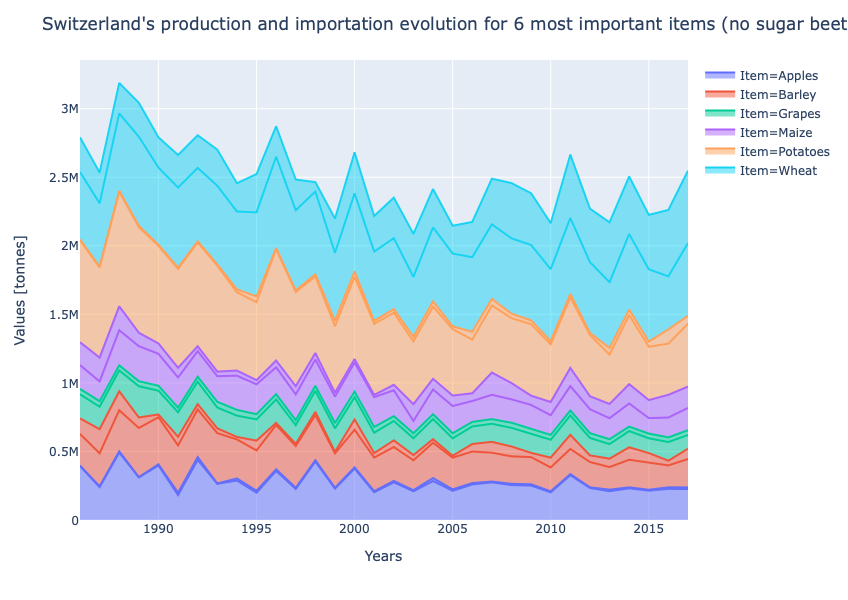

In [174]:
CH_no_SB=CH_restrained[CH_restrained.Item != 'Sugar beet']


fig = px.area(CH_no_SB, x="Year", y="Value", color='Item',
      line_group='Input')
fig.update_layout(
    title="Switzerland's production and importation evolution for 6 most important items (no sugar beet)",
    yaxis_title="Values [tonnes]",
    xaxis_title='Years'
    )
plotly.offline.plot(fig, filename='../doc/prod_imp_7main_woSB.html')
fig.show()

<div class="alert alert-block alert-success">
    
The sum of importations and productions decrease for all items excetp for sugar beet.

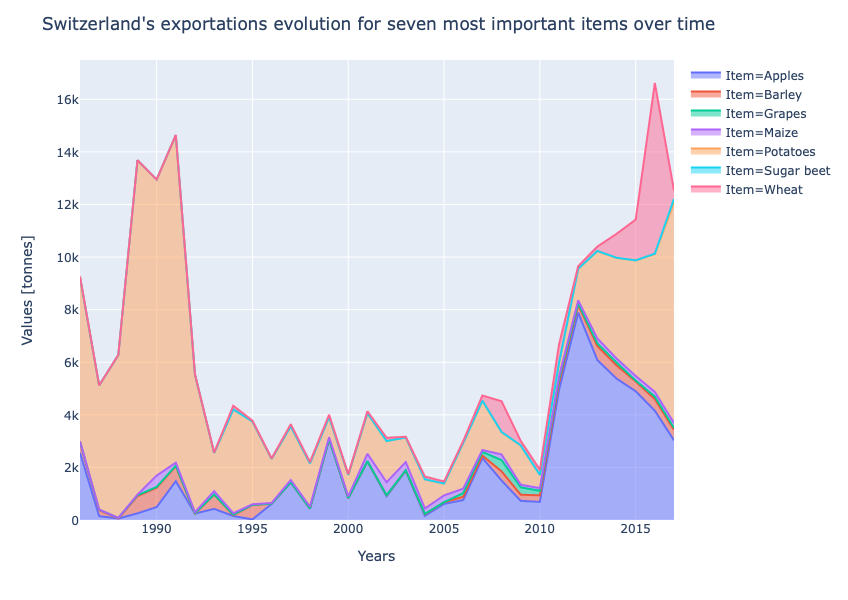

In [175]:
import plotly.express as px
fig = px.area(CH_restrained_exportations, x="Year", y="Value", color='Item',
      line_group='Input')
fig.update_layout(
    title="Switzerland's exportations evolution for seven most important items over time",
    yaxis_title="Values [tonnes]",
    xaxis_title='Years'
    )
plotly.offline.plot(fig, filename='../doc/exp_7main.html')
fig.show()

In [176]:
raw_crops_dataset.head(20)

Area    Item         Element  Year    Unit     Value
24  Austria  Apples  Area harvested  1985      ha   16100.0
25  Austria  Apples  Area harvested  1986      ha   16120.0
26  Austria  Apples  Area harvested  1987      ha   16700.0
27  Austria  Apples  Area harvested  1988      ha   16720.0
28  Austria  Apples  Area harvested  1989      ha   17330.0
29  Austria  Apples  Area harvested  1990      ha    3970.0
30  Austria  Apples           Yield  1985   hg/ha  182082.0
31  Austria  Apples           Yield  1986   hg/ha  228651.0
32  Austria  Apples           Yield  1987   hg/ha  157804.0
33  Austria  Apples           Yield  1988   hg/ha  247039.0
34  Austria  Apples           Yield  1989   hg/ha  185380.0
35  Austria  Apples           Yield  1990   hg/ha  850733.0
36  Austria  Apples      Production  1961  tonnes  456000.0
37  Austria  Apples      Production  1962  tonnes  431000.0
38  Austria  Apples      Production  1963  tonnes  436000.0
39  Austria  Apples      Production  1964  tonnes  447000.0
40  Austria  Apples      Production  1965  tonnes  222000.0
41  Austria  Apples      Production  1966  tonnes  366654.0
42  Austria  Apples      Production  1967  tonnes  360937.0
43  Austria  Apples      Production  1968  tonnes  328675.0

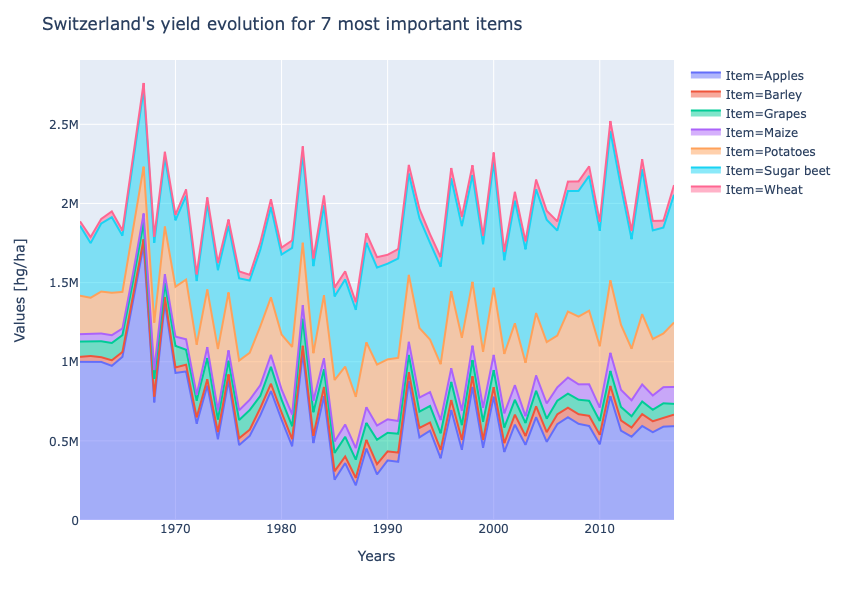

In [177]:
CH_yield = raw_crops_dataset.loc[raw_crops_dataset.Area=='Switzerland'].loc[raw_crops_dataset.Item.isin(['Apples','Sugar beet','Wheat','Potatoes', 'Maize', 'Grapes', 'Barley'])].loc[raw_crops_dataset.Element=='Yield']

import plotly.express as px
fig = px.area(CH_yield, x="Year", y="Value", color='Item',
      line_group='Item')
fig.update_layout(
    title="Switzerland's yield evolution for 7 most important items",
    yaxis_title="Values [hg/ha]",
    xaxis_title='Years'
    )
plotly.offline.plot(fig, filename='../doc/yield_evol_7main.html')
fig.show()

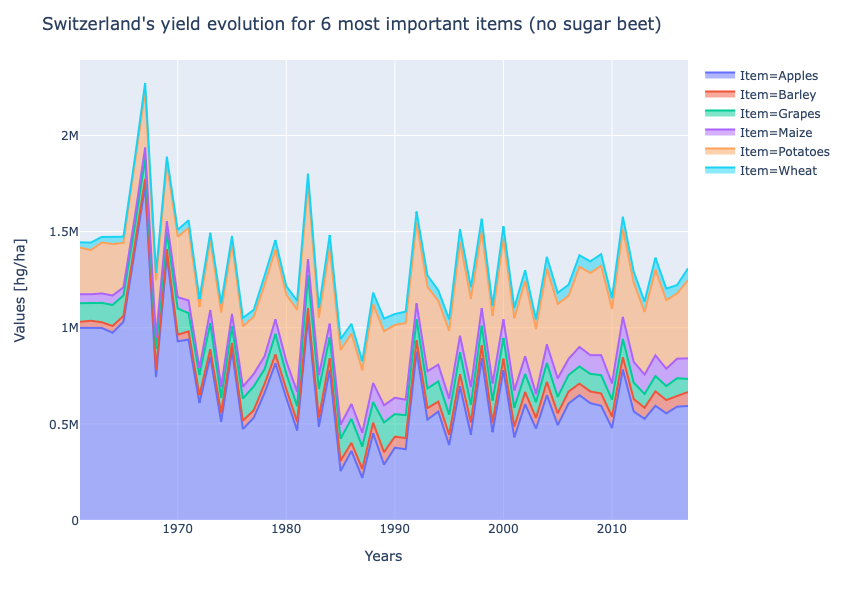

In [178]:
CH_yield_no_SB = raw_crops_dataset.loc[raw_crops_dataset.Area=='Switzerland'].loc[raw_crops_dataset.Item.isin(['Apples','Wheat','Potatoes', 'Maize', 'Grapes', 'Barley'])].loc[raw_crops_dataset.Element=='Yield']

import plotly.express as px
fig = px.area(CH_yield_no_SB, x="Year", y="Value", color='Item',
      line_group='Item')
fig.update_layout(
    title="Switzerland's yield evolution for 6 most important items (no sugar beet)",
    yaxis_title="Values [hg/ha]",
    xaxis_title='Years'
    )
plotly.offline.plot(fig, filename='../doc/yield_evol_7main_woSB.html')
fig.show()

<div class="alert alert-block alert-success">

We can see that the apple yield is clearly decreasing and grapes are also decreasing but much less. Other yields are increasing.
    The graph alows to see that the global yield for these seven items is decreasing due mostly to the apple's yield.


### Plot : Is there a correlation between production and temperature?

**Dataset :** Swiss temperatures + Crops

**Data :** Example for Potatoes

**Notes :** 


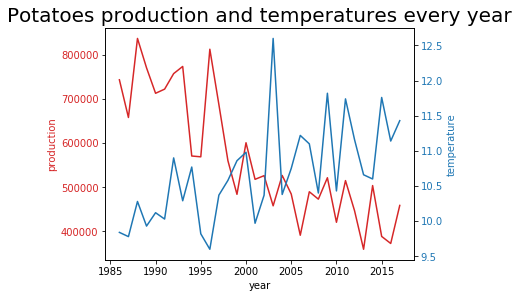

In [179]:
#lets check what is the relation between production and temperatures

years = np.sort(CH_data.Year.unique())
fig, ax1 = plt.subplots()
data1 = CH_data.loc[CH_data.Item=='Potatoes']['Produced Quantity']
data2 = CH_temperatures.summer

color = 'tab:red'
ax1.set_xlabel('year')
ax1.set_ylabel('production', color=color)
ax1.plot(years, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('temperature', color=color) 
ax2.plot(years, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Potatoes production and temperatures every year', fontsize=20)
plt.show()

<div class="alert alert-block alert-info">
As temperature increase, the potatoes, maize and apples production decreases.
Wheat production is less affected by tempearture changes. 
Sugar beet production increase with temperatures, so this item need heat to be grown. The relation seems linear so we will use Pearson coefficient to describe the relation between production and temperature.
    

<div class="alert alert-block alert-info">

The Pearson correlation coefficient measures the linear relationship
 between two datasets. Strictly speaking, Pearson's correlation requires
 that each dataset be normally distributed. Like other correlation
 coefficients, this one varies between -1 and +1 with 0 implying no
 correlation. Correlations of -1 or +1 imply an exact linear
 relationship. Positive correlations imply that as x increases, so does
 y. Negative correlations imply that as x increases, y decreases.

calculation of the Pearson correlation between temperatures and the production of our 7 main items. We assume our datas normaly distributed.

In [180]:
CH_corr_Apples_temp = CH_data_transformed.loc[CH_data_transformed.Item.str.contains("Apples")].loc[CH_data_transformed.Input=='Country production']
CH_corr_Apples_temp = CH_corr_Apples_temp[["Year","Value"]]

In [181]:
CH_corr_Apples_temp = CH_corr_Apples_temp.rename(columns={"Value":"Apples"})

In [182]:
CH_corr_Grapes_temp = CH_data_transformed.loc[CH_data_transformed.Item.str.contains("Grapes")].loc[CH_data_transformed.Input=='Country production']
CH_corr_Grapes_temp = CH_corr_Grapes_temp[["Year","Value"]]
CH_corr_Grapes_temp = CH_corr_Grapes_temp.rename(columns={"Value":"Grapes"})

CH_corr_Wheat_temp = CH_data_transformed.loc[CH_data_transformed.Item.str.contains("Wheat")].loc[CH_data_transformed.Input=='Country production']
CH_corr_Wheat_temp = CH_corr_Wheat_temp[["Year","Value"]]
CH_corr_Wheat_temp = CH_corr_Wheat_temp.rename(columns={"Value":"Wheat"})

CH_corr_Potatoes_temp = CH_data_transformed.loc[CH_data_transformed.Item.str.contains("Potatoes")].loc[CH_data_transformed.Input=='Country production']
CH_corr_Potatoes_temp = CH_corr_Potatoes_temp[["Year","Value"]]
CH_corr_Potatoes_temp = CH_corr_Potatoes_temp.rename(columns={"Value":"Potatoes"})

CH_corr_Barley_temp = CH_data_transformed.loc[CH_data_transformed.Item.str.contains("Barley")].loc[CH_data_transformed.Input=='Country production']
CH_corr_Barley_temp = CH_corr_Barley_temp[["Year","Value"]]
CH_corr_Barley_temp = CH_corr_Barley_temp.rename(columns={"Value":"Barley"})

CH_corr_Maize_temp = CH_data_transformed.loc[CH_data_transformed.Item.str.contains("Maize")].loc[CH_data_transformed.Input=='Country production']
CH_corr_Maize_temp = CH_corr_Maize_temp[["Year","Value"]]
CH_corr_Maize_temp = CH_corr_Maize_temp.rename(columns={"Value":"Maize"})

In [183]:
CH_corr_SB_temp = CH_data_transformed.loc[CH_data_transformed.Item.str.contains("Sugar beet")].loc[CH_data_transformed.Input=='Country production']
CH_corr_SB_temp = CH_corr_SB_temp[["Year","Value"]]
CH_corr_SB_temp = CH_corr_SB_temp.rename(columns={"Value":"Sugar beet"})

In [184]:
CH_summer_temp=CH_temperatures[["Year","summer"]]
CH_winter_temp=CH_temperatures[["Year","winter"]]

In [185]:
df_winter=CH_winter_temp.merge(CH_corr_SB_temp,on='Year').merge(CH_corr_Apples_temp,on='Year').merge(CH_corr_Grapes_temp,on='Year').merge(CH_corr_Wheat_temp,on='Year').merge(CH_corr_Potatoes_temp,on='Year').merge(CH_corr_Barley_temp,on='Year').merge(CH_corr_Maize_temp,on='Year')
df_winter.head()

Year  winter  Sugar beet    Apples    Grapes     Wheat  Potatoes    Barley  \
0  1986   -1.03    761300.0  393000.0  175800.0  491700.0  742900.0  230400.0   
1  1987   -0.65    823874.0  240200.0  163700.0  461500.0  657700.0  241300.0   
2  1988    0.77    922479.0  492000.0  151900.0  564500.0  836400.0  299800.0   
3  1989    1.63    888251.0  311000.0  227700.0  649000.0  770000.0  358600.0   
4  1990    1.84    873885.0  397800.0  173900.0  562600.0  712400.0  343100.0   

      Maize  
0  173800.0  
1  143700.0  
2  255800.0  
3  255600.0  
4  232900.0

In [186]:
df_summer=CH_summer_temp.merge(CH_corr_SB_temp,on='Year').merge(CH_corr_Apples_temp,on='Year').merge(CH_corr_Grapes_temp,on='Year').merge(CH_corr_Wheat_temp,on='Year').merge(CH_corr_Potatoes_temp,on='Year').merge(CH_corr_Barley_temp,on='Year').merge(CH_corr_Maize_temp,on='Year')
df_summer.head()

Year  summer  Sugar beet    Apples    Grapes     Wheat  Potatoes    Barley  \
0  1986    9.84    761300.0  393000.0  175800.0  491700.0  742900.0  230400.0   
1  1987    9.78    823874.0  240200.0  163700.0  461500.0  657700.0  241300.0   
2  1988   10.28    922479.0  492000.0  151900.0  564500.0  836400.0  299800.0   
3  1989    9.93    888251.0  311000.0  227700.0  649000.0  770000.0  358600.0   
4  1990   10.12    873885.0  397800.0  173900.0  562600.0  712400.0  343100.0   

      Maize  
0  173800.0  
1  143700.0  
2  255800.0  
3  255600.0  
4  232900.0

In [187]:
df_corr_summer=df_summer.drop(columns={"Year"})
coeff_summer=df_corr_summer.corr().iloc[0][1:]#.sort_values(ascending=False)
coeff_summer=pd.DataFrame(coeff_summer).T
coeff_summer.round(2).head()

Sugar beet  Apples  Grapes  Wheat  Potatoes  Barley  Maize
summer        0.56   -0.19   -0.57  -0.41     -0.59   -0.51  -0.57

In [188]:
df_corr_winter=df_winter.drop(columns={"Year"})
coeff_winter=df_corr_winter.corr().iloc[0][1:]#.sort_values(ascending=False)
coeff_winter=pd.DataFrame(coeff_winter).T
coeff_winter.round(2).head()

Sugar beet  Apples  Grapes  Wheat  Potatoes  Barley  Maize
winter        0.12   -0.01   -0.07   0.13     -0.06    0.09   0.18

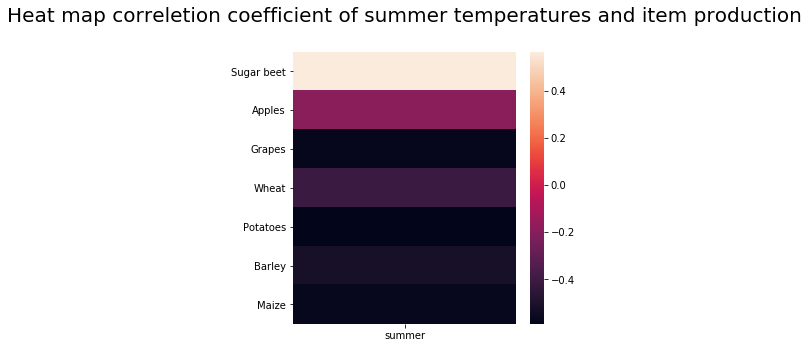

In [190]:
import seaborn as sns

plt.figure(figsize=(5,5)) 
plt.title('Heat map correletion coefficient of summer temperatures and item production', fontsize=20, pad=30)

sns.heatmap(coeff_summer.T)

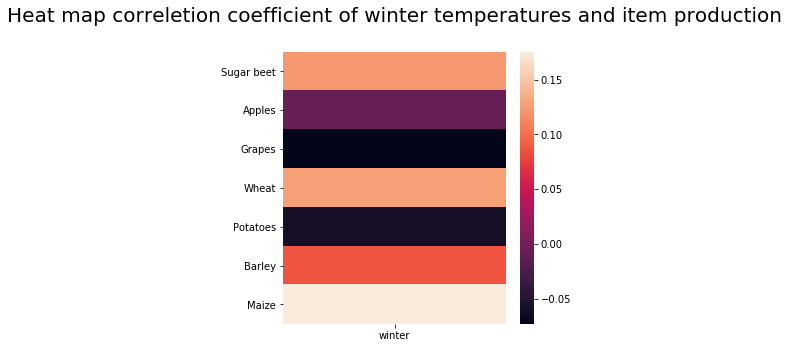

In [191]:
plt.figure(figsize=(5,5)) 
plt.title('Heat map correletion coefficient of winter temperatures and item production', fontsize=20, pad=30)

sns.heatmap(coeff_winter.T)

<div class="alert alert-block alert-info">
    
The winter correlation coefficients are only relevant for sugar beet, apples and potatoes as they are produced all year, but all the other items are produced only in summer and then only the summer correlation coefficient are relevant for them. 

When looking at the summer correlation coefficients, we can see that sugar beet are the more strongly positively impact. Apples and Barley are also positively impact, there is no impact on maize and potatoes wheat and grapes are negatively impact. Grapes is the more strongly negatively impact.

When looking at the winter coefficients, we can see that sugar beet is again the more positively impact, there is no impact on apples and potatoes are positively impact too. 

### Insight into employment in agriculture 

**Dataset :** Employment

**Data :** 

**Notes :** 


In [192]:
df_employ_newind = df_employ.copy()
df_employ_newind = df_employ.set_index(['area','indicator'])
df_employ_newind = df_employ_newind.sort_index()

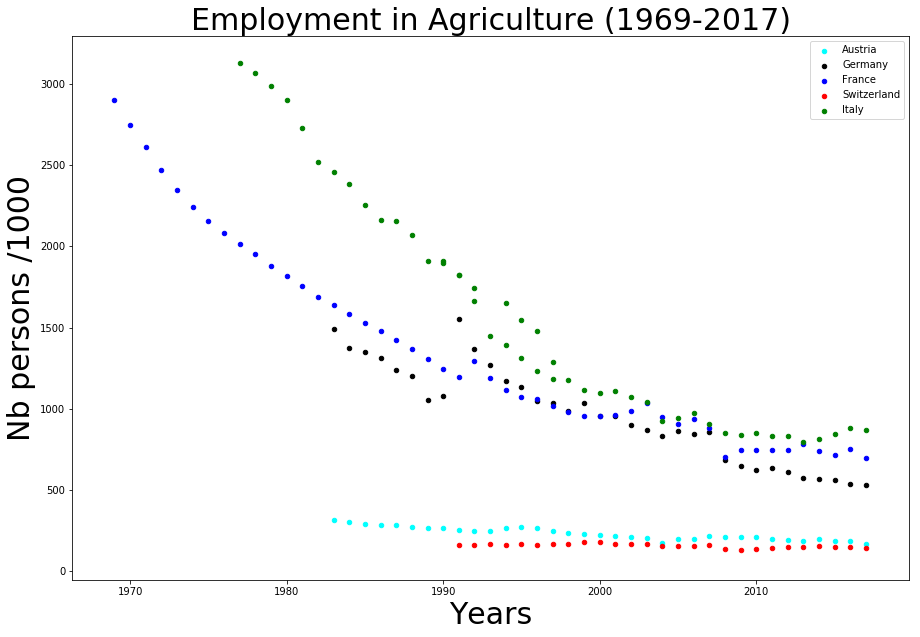

In [193]:
ax = plt.gca()
df_employ_newind.loc[('Austria','Employment in agriculture')].plot(kind='scatter',color='cyan',x='year',y='value',ax=ax, label='Austria')
df_employ_newind.loc[('Germany','Employment in agriculture')].plot(kind='scatter',color='black',x='year',y='value',ax=ax, label='Germany')
df_employ_newind.loc[('France','Employment in agriculture')].plot(kind='scatter',color='blue',x='year',y='value',ax=ax, label='France')
df_employ_newind.loc[('Switzerland','Employment in agriculture')].plot(kind='scatter',color='red',x='year',y='value',ax=ax, label='Switzerland')
df_employ_newind.loc[('Italy','Employment in agriculture')].plot(kind='scatter',color='green',x='year',y='value',ax=ax, label='Italy',
                                                                 figsize=(15,10))
ax.set(title='Employment in Agriculture (1969-2017)',
ylabel='Nb persons /1000',
xlabel='Years')
ax.yaxis.label.set_size(30)
ax.xaxis.label.set_size(30)
ax.title.set_size(30)
plt.show()

<div class="alert alert-block alert-info">
    
Employment in agriculture are decreasing a lot in France, Germany and Italy but are constants in Austria and Switzerland. 
The number of employes in the agriculture sector are very small in Switzerland, only around 200 000 employes. This could explain why importations increase and production is stabilized. But lets see the next plot to be sure ¡
    

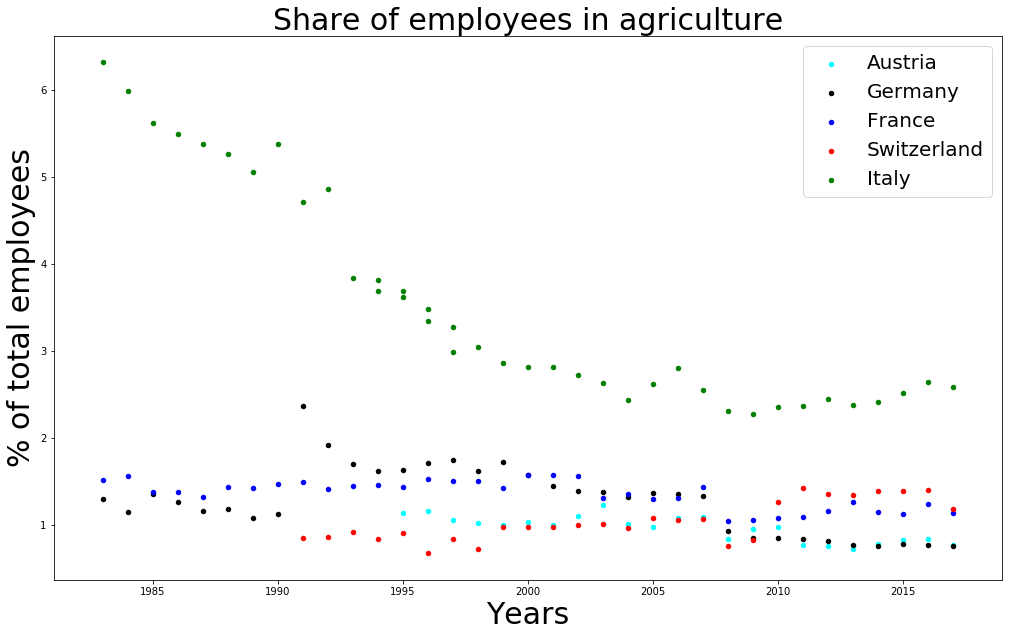

In [194]:
ax = plt.gca()
df_employ_newind.loc[('Austria','Share of employees in agriculture (% of total employees)')].plot(kind='scatter',color='cyan',x='year',y='value',ax=ax, label='Austria')
df_employ_newind.loc[('Germany','Share of employees in agriculture (% of total employees)')].plot(kind='scatter',color='black',x='year',y='value',ax=ax, label='Germany')
df_employ_newind.loc[('France','Share of employees in agriculture (% of total employees)')].plot(kind='scatter',color='blue',x='year',y='value',ax=ax, label='France')
df_employ_newind.loc[('Switzerland','Share of employees in agriculture (% of total employees)')].plot(kind='scatter',color='red',x='year',y='value',ax=ax, label='Switzerland')
df_employ_newind.loc[('Italy','Share of employees in agriculture (% of total employees)')].plot(kind='scatter',color='green',x='year',y='value',ax=ax, label='Italy',
                                                                                                figsize=(17,10))
ax.set(title='Share of employees in agriculture',
ylabel='% of total employees',
xlabel='Years')
ax.yaxis.label.set_size(30)
ax.xaxis.label.set_size(30)
ax.title.set_size(30)
plt.legend(fontsize=20)
plt.show()

<div class="alert alert-block alert-info">
Agriculture represents a very small part of employment, around 1%. But it is approximatively the same fo its neighbours: France Germany and Austria.
Only Italy has a relatively high percentage of employees in agriculture but it can be correlated with the fact that they also have the highest number of employees in this sector.

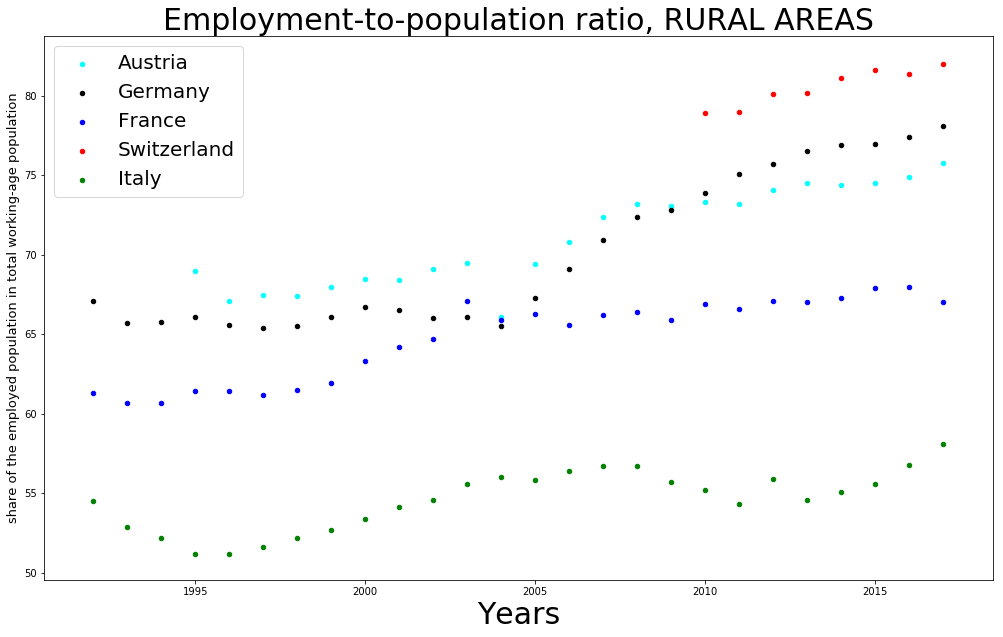

In [195]:
ax = plt.gca()
df_employ_newind.loc[('Austria','Employment-to-population ratio, rural areas')].plot(kind='scatter',color='cyan',x='year',y='value',ax=ax, label='Austria')
df_employ_newind.loc[('Germany','Employment-to-population ratio, rural areas')].plot(kind='scatter',color='black',x='year',y='value',ax=ax, label='Germany')
df_employ_newind.loc[('France','Employment-to-population ratio, rural areas')].plot(kind='scatter',color='blue',x='year',y='value',ax=ax, label='France')
df_employ_newind.loc[('Switzerland','Employment-to-population ratio, rural areas')].plot(kind='scatter',color='red',x='year',y='value',ax=ax, label='Switzerland')
df_employ_newind.loc[('Italy','Employment-to-population ratio, rural areas')].plot(kind='scatter',color='green',x='year',y='value',ax=ax, label='Italy',
                                                                                                figsize=(17,10))
ax.set(title='Employment-to-population ratio, RURAL AREAS',
ylabel='share of the employed population in total working-age population',
xlabel='Years')
ax.yaxis.label.set_size(13)
ax.xaxis.label.set_size(30)
ax.title.set_size(30)
plt.legend(fontsize=20)
plt.show()

<div class="alert alert-block alert-info">
When looking to the employment to population ratio we can see that it is Switzerland that have the higher one, meaning that Switzerland have the biggest population part working in Agriculture. So Agriculture represents an important employment sector. 
We also remark that this ratio is increasing this past few years meaning that this work sector is attractive.

###  Plot : Use of fertilizers and production over years in Switzerland 

**Dataset :** fertilizers, pesticides and crops

**Data :** Sum of tonnes used over years.

**Notes :** 


In [196]:
#Next : add the production for those years 
#Lest's try with CH:
fert_ch = fert_sum.loc[fert_sum['Area']=='Switzerland']

In [197]:
pest_ch = pesticides_dataset.loc[pesticides_dataset['Area']=='Switzerland'].loc[pesticides_dataset['Item']=='Pesticides (total)']
pest_ch = pest_ch[['Year','Value']]

In [198]:
prod_ch = crops_sum.loc[crops_sum['Element']== 'Production'].loc[crops_sum['Area']== 'Switzerland']
area_harvested_ch = crops_sum.loc[crops_sum['Element']== 'Area harvested'].loc[crops_sum['Area']== 'Switzerland']
yield_ch = crops_sum.loc[crops_sum['Element']== 'Yield'].loc[crops_sum['Area']== 'Switzerland']
employ_ch = df_employ_newind.loc[('Switzerland','Employment in agriculture')].rename(columns={"year":"Year"})

In [199]:
#pd.concat([prod_ch, fert_ch], sort=False).tail(60)
combo_ch = pd.merge(prod_ch, fert_ch, how='inner', on=['Year'])\
                .rename(columns={'Area_x':'Area'})\
                .rename(columns={'Sum_x':'Production'})\
                .rename(columns={'Sum_y':'Fertilizers'})\
                .drop(columns=['Area_y','Element'])

combo_ch = pd.merge(yield_ch, combo_ch, how='inner', on=['Year'])\
                .rename(columns={'Area_x':'Area'})\
                .rename(columns={'Sum':'Yield'})\
                .drop(columns=['Area_y','Element'])

combo_ch = pd.merge(area_harvested_ch, combo_ch, how='inner', on=['Year'])\
                .rename(columns={'Area_x':'Area'})\
                .rename(columns={'Sum':'Area harvested'})\
                .drop(columns=['Area_y','Element'])


In [200]:
combo_ch = pd.merge(combo_ch, pest_ch, how='inner', on=['Year'])\
                .rename(columns={'Value':'Pesticides'})
combo_ch.head()

Area  Year  Area harvested       Yield  Production  Fertilizers  \
0  Switzerland  2002        271241.0   9424637.0   3957861.0     200551.0   
1  Switzerland  2003        265267.0  10191058.0   3394090.0     189820.0   
2  Switzerland  2004        261136.0  11452691.0   4051477.0     202363.0   
3  Switzerland  2005        265729.0  10216238.0   3800683.0     224610.0   
4  Switzerland  2006        262966.0  10730639.0   3515845.0     221880.0   

   Pesticides  
0     1526.60  
1     1476.70  
2     1390.70  
3     1388.30  
4     1359.04

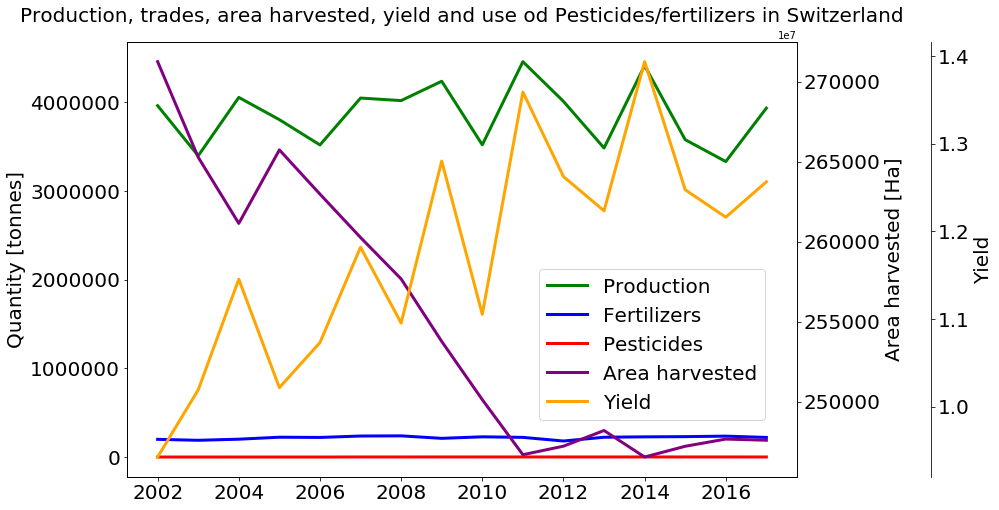

In [201]:
fig, ax1 = plt.subplots(figsize=(12,8))

ind = combo_ch.Year
p1 = ax1.plot('Year','Production', data=combo_ch, marker='', color='green', label = 'Production', linewidth=3)
p2 = ax1.plot('Year', 'Fertilizers', data=combo_ch, marker='', color='blue', label = 'Fertilizers',linewidth=3)
p3 = ax1.plot('Year', 'Pesticides', data=combo_ch, marker='', color='red', label = 'Pesticides', linewidth=3)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax2 = ax1.twinx() 
p4=ax2.plot( 'Year', 'Area harvested', data=combo_ch, marker='', color='purple', label = 'Area harvested', linewidth=3)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax3 = ax1.twinx()
ax3.spines["right"].set_position(("axes", 1.2))

p5=ax3.plot( 'Year', 'Yield', data=combo_ch, marker='', color='orange', label = 'Yield', linewidth=3)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax1.set_ylabel('Quantity [tonnes]', fontsize=20)
ax3.set_ylabel('Yield', fontsize=20)
ax2.set_ylabel('Area harvested [Ha]',fontsize=20)
#ax4.set_ylabel('temperature °C')


plt.title("Production, trades, area harvested, yield and use od Pesticides/fertilizers in Switzerland" ,pad=20, fontsize= 20)


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ('Production', 'Fertilizers', 'Pesticides', 'Area harvested', 'Yield'), fontsize=20,  bbox_to_anchor=[0.6, 0.5], loc=' right')

plt.show()

We found out in our study that the employment in  agriculture  was  decreasing.   Moreover,  as  we can  see  in  Figure above,  the  production  is  quite constant  and  the  area  harvested  is  decreasing  in favor of urban area.   But the yield increase over the years. We first though it could be explained by use of bigger quantity of fertilizers and pesticides but as their quantity are regularised by laws they are  constant  over  the  years  and  cannot  explain this  increase  in  yield,  unless  we  use  the  same quantity but thanks to chemical engineering those are more efficient.  Those results lead us to think that  this  increase  in  yield  could  be  explained by  a  mechanization  of  agriculture  and  made  us believe  that  if  it  is  push  to  an  extreme  it  could help  Switzerland  producing  more  and  becoming self-sufficient

# Main results

What's next:

<div class="alert alert-block alert-info">
    
1. Defining what is food self-sufficiency
    1. $ SSR = Production * 100 / (Production + Imports - Exports)$ to develop
    2. Addapt it to the Swiss case : take a look to what we import (basic needs ?), export (top exports ? by far ?) and production graphs
    3. __[Ref. Paper "Food self-sufficiency: Making sense of it, and when it makes sense" By Jennifer Clapp](https://www.sciencedirect.com/science/article/pii/S0306919216305851#b0240)__. <br> Résumé : __[Résumé par le site Resilience du paper de Clapp](https://www.resilience.org/stories/2018-03-13/food-self-sufficiency-does-it-make-sense/)__
    4. Compare our results with other sources just to know if we share the same results (e.g. selfsufficiency switzerland on wikipedia __[List of countries by food self-sufficieent rate](https://en.wikipedia.org/wiki/List_of_countries_by_food_self-sufficiency_rate)__)

    
2. Food situation of Switzerland from 1986 to 2017.
    1. Is/was it food self-sufficient ? SSR scores over the years.
    2. Comapre to neighbours

    
3. Will it be **physically** possible for Switzerland in a near future to be food self-sufficient (in the sense of the 2018 initiative bc we have seen that definition is relative) taking into account its population growth (hesimated increase in consumption computation)? What would it imply/take into account in terms of :
    1. Area harvested (actual ratio and estimation of its evolution)
    2. Farmers population 
    3. Temperature (climate impact food production correlation)
    4. Environment (use of fertilizers needed ? depends on productivity)

    
4. Attempt on **economy** consequences analysis ?
    1. Complicated ... What about looking at what happended in countries that adopted food self-sufficient policies such as Senegal, India, the Philippines, Qatar, Bolivia, and Russia ? (Jaccard and correlations?)
    2. Jaccard similarity of country based on SSR to see which country should adopt more food self-sufficient policies ?

## SSR score


### Compute SSR for Switzerland and its neighbour over the years then plot - Analysis

In [202]:
CH_clear = CH_data[["Year", "Produced Quantity", "Exported Quantity", "Imported Quantity"]]

In [203]:
CH_ssr = CH_clear.groupby("Year")\
                .agg({'Produced Quantity':'sum','Exported Quantity':'sum','Imported Quantity':'sum'})\
                .reset_index()

In [204]:
SSR_list=[]
for i in range(0, CH_ssr.shape[0]):
    SSR_list.append((CH_ssr["Produced Quantity"].iloc[i]*100)/(CH_ssr["Produced Quantity"].iloc[i] + CH_ssr["Imported Quantity"].iloc[i]-CH_ssr["Exported Quantity"].iloc[i]))

CH_ssr["SSR"]=SSR_list

Now we do the same for Switzerland's neighbours

In [205]:
France_clear = France_data[["Year", "Produced Quantity", "Exported Quantity", "Imported Quantity"]]
France_ssr = France_clear.groupby("Year")\
                .agg({'Produced Quantity':'sum','Exported Quantity':'sum','Imported Quantity':'sum'})\
                .reset_index()
SSR_list_F=[]
for i in range(0, France_ssr.shape[0]):
    SSR_list_F.append((France_ssr["Produced Quantity"].iloc[i]*100)/(France_ssr["Produced Quantity"].iloc[i] + France_ssr["Imported Quantity"].iloc[i] - France_ssr["Exported Quantity"].iloc[i]))

France_ssr["SSR"]=SSR_list_F

In [206]:
Germany_clear = Germany_data[["Year", "Produced Quantity", "Exported Quantity", "Imported Quantity"]]
Germany_ssr = Germany_clear.groupby("Year")\
                .agg({'Produced Quantity':'sum','Exported Quantity':'sum','Imported Quantity':'sum'})\
                .reset_index()
SSR_list_G=[]
for i in range(0, Germany_ssr.shape[0]):
    SSR_list_G.append((Germany_ssr["Produced Quantity"].iloc[i]*100)/(Germany_ssr["Produced Quantity"].iloc[i] + Germany_ssr["Imported Quantity"].iloc[i]-France_ssr["Exported Quantity"].iloc[i]))

Germany_ssr["SSR"]=SSR_list_G

In [207]:
Italy_clear = Italy_data[["Year", "Produced Quantity", "Exported Quantity", "Imported Quantity"]]
Italy_ssr = Italy_clear.groupby("Year")\
                .agg({'Produced Quantity':'sum','Exported Quantity':'sum','Imported Quantity':'sum'})\
                .reset_index()
SSR_list_I=[]
for i in range(0, Italy_ssr.shape[0]):
    SSR_list_I.append((Italy_ssr["Produced Quantity"].iloc[i]*100)/(Italy_ssr["Produced Quantity"].iloc[i] + Italy_ssr["Imported Quantity"].iloc[i] - Italy_ssr["Exported Quantity"].iloc[i]))

Italy_ssr["SSR"]=SSR_list_I

In [208]:
Austria_clear = Austria_data[["Year", "Produced Quantity", "Exported Quantity", "Imported Quantity"]]
Austria_ssr = Austria_clear.groupby("Year")\
                .agg({'Produced Quantity':'sum','Exported Quantity':'sum','Imported Quantity':'sum'})\
                .reset_index()
SSR_list_A=[]
for i in range(0, Austria_ssr.shape[0]):
    SSR_list_A.append((Austria_ssr["Produced Quantity"].iloc[i]*100)/(Austria_ssr["Produced Quantity"].iloc[i] + Austria_ssr["Imported Quantity"].iloc[i] - Austria_ssr["Exported Quantity"].iloc[i]))

Austria_ssr["SSR"]=SSR_list_A

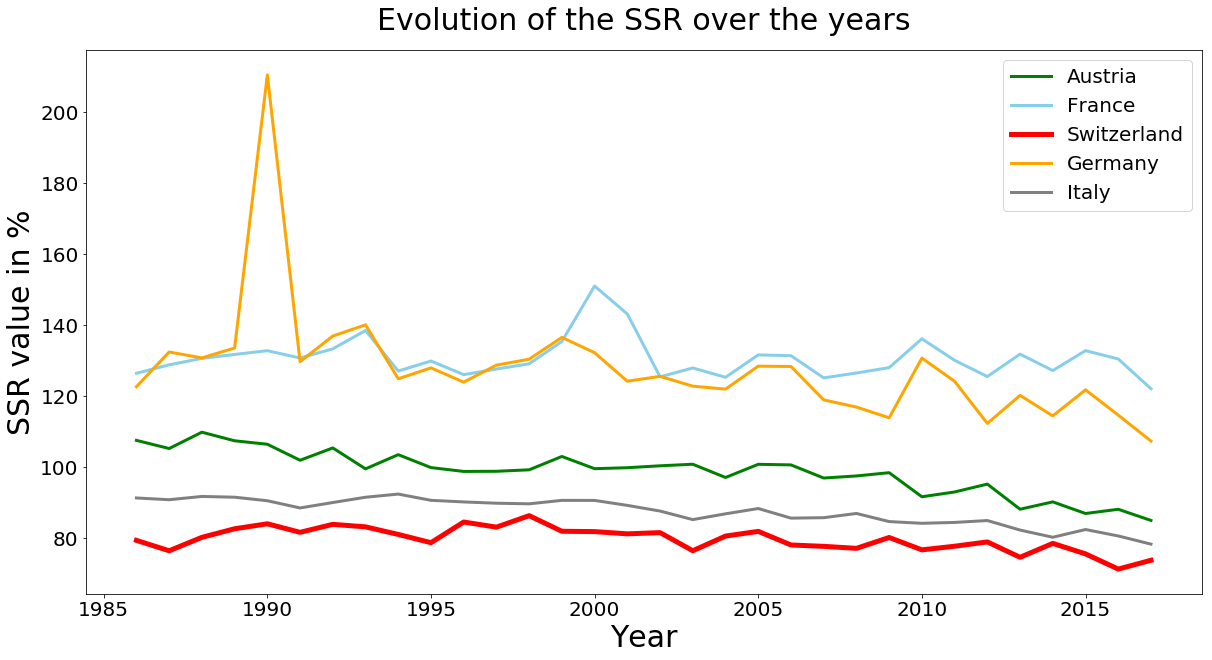

In [209]:
plt.figure(figsize=(20,10))
plt.plot( 'Year', 'SSR', data=Austria_ssr, marker='', color='green',  label = 'Austria', linewidth=3)
plt.plot( 'Year', 'SSR', data=France_ssr, marker='', color='skyblue', label = 'France', linewidth=3)
plt.plot( 'Year', 'SSR', data=CH_ssr, marker='', color='red', label = 'Switzerland', linewidth=5)
plt.plot( 'Year', 'SSR', data=Germany_ssr, marker='', color='orange', label = 'Germany', linewidth=3)
plt.plot( 'Year', 'SSR', data=Italy_ssr, marker='', color='grey', label = 'Italy', linewidth=3)
    
plt.legend(fontsize= 20) 
plt.title('Evolution of the SSR over the years' , fontsize= 30, pad=20)
plt.xlabel("Year", fontsize= 30)
plt.ylabel("SSR value in %", fontsize= 30)
plt.xticks(fontsize= 20)
plt.yticks(fontsize= 20)

plt.show()

<div class="alert alert-block alert-info">
    
We can see that Switzerland has the smallers SSR ratio. It oscillates between 90 and 70% over the years.
This indicates that Switzerland has never been food self-sufficient.
We can also observe that Germany, France and sometimes Austria have SSR superior than 100% this can be explained by the fact that our dataset contains mostly items producted in our country so we are missing a lot of importations. Mathematically this means that those countries have high exports value and low import values. 
    
We will now try to recompute those SSR with only our 7 main items:
    potatoes, wheat, sugar beet, apples and maize, grapes and barley

In [210]:
keep=["Potatoes","Apples","Maize","Sugar beet","Wheat", "Barley", "Grapes"]
CH_clear_ = CH_data[CH_data.Item.isin(keep)]

In [211]:
CH_ssr_7 = CH_clear_.groupby("Year")\
                .agg({'Produced Quantity':'sum','Exported Quantity':'sum','Imported Quantity':'sum'})\
                .reset_index()
SSR_list_CH_7=[]
for i in range(0, CH_ssr_7.shape[0]):
    SSR_list_CH_7.append((CH_ssr_7["Produced Quantity"].iloc[i]*100)/(CH_ssr_7["Produced Quantity"].iloc[i] + CH_ssr_7["Imported Quantity"].iloc[i] - CH_ssr_7["Exported Quantity"].iloc[i]))

CH_ssr_7["SSR"]=SSR_list_CH_7

In [212]:
France_clear_ = France_data[France_data.Item.isin(keep)]

France_ssr_7 = France_clear_.groupby("Year")\
                .agg({'Produced Quantity':'sum','Exported Quantity':'sum','Imported Quantity':'sum'})\
                .reset_index()
SSR_list_FR_7=[]
for i in range(0, France_ssr_7.shape[0]):
    SSR_list_FR_7.append((France_ssr_7["Produced Quantity"].iloc[i]*100)/(France_ssr_7["Produced Quantity"].iloc[i] + France_ssr_7["Imported Quantity"].iloc[i] - France_ssr_7["Exported Quantity"].iloc[i]))

France_ssr_7["SSR"]=SSR_list_FR_7

In [213]:
Germany_clear_ = Germany_data[Germany_data.Item.isin(keep)]

Germany_ssr_7 = Germany_clear_.groupby("Year")\
                .agg({'Produced Quantity':'sum','Exported Quantity':'sum','Imported Quantity':'sum'})\
                .reset_index()
SSR_list_G_7=[]
for i in range(0, Germany_ssr_7.shape[0]):
    SSR_list_G_7.append((Germany_ssr_7["Produced Quantity"].iloc[i]*100)/(Germany_ssr_7["Produced Quantity"].iloc[i] + Germany_ssr_7["Imported Quantity"].iloc[i] - Germany_ssr_7["Exported Quantity"].iloc[i]))

Germany_ssr_7["SSR"]=SSR_list_G_7

In [214]:
Italy_clear_ = Italy_data[Italy_data.Item.isin(keep)]

Italy_ssr_7 = Italy_clear_.groupby("Year")\
                .agg({'Produced Quantity':'sum','Exported Quantity':'sum','Imported Quantity':'sum'})\
                .reset_index()
SSR_list_I_7=[]
for i in range(0, Italy_ssr_7.shape[0]):
    SSR_list_I_7.append((Italy_ssr_7["Produced Quantity"].iloc[i]*100)/(Italy_ssr_7["Produced Quantity"].iloc[i] + Italy_ssr_7["Imported Quantity"].iloc[i] - Italy_ssr_7["Exported Quantity"].iloc[i]))

Italy_ssr_7["SSR"]=SSR_list_I_7

In [215]:
Austria_clear_ = Austria_data[Austria_data.Item.isin(keep)]

Austria_ssr_7 = Austria_clear_.groupby("Year")\
                .agg({'Produced Quantity':'sum','Exported Quantity':'sum','Imported Quantity':'sum'})\
                .reset_index()
SSR_list_A_7=[]
for i in range(0, Austria_ssr_7.shape[0]):
    SSR_list_A_7.append((Austria_ssr_7["Produced Quantity"].iloc[i]*100)/(Austria_ssr_7["Produced Quantity"].iloc[i] + Austria_ssr_7["Imported Quantity"].iloc[i] - Austria_ssr_7["Exported Quantity"].iloc[i]))

Austria_ssr_7["SSR"]=SSR_list_A_7

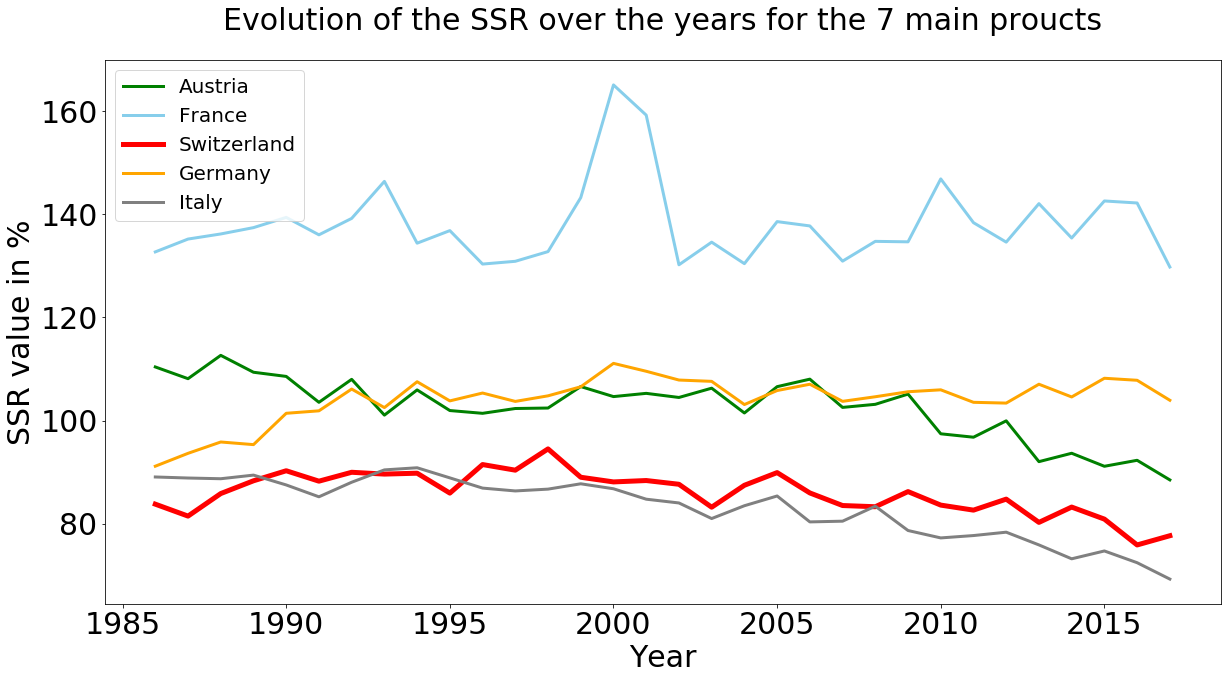

In [216]:
plt.figure(figsize=(20,10))
plt.plot( 'Year', 'SSR', data=Austria_ssr_7, marker='', color='green',  label = 'Austria', linewidth=3)
plt.plot( 'Year', 'SSR', data=France_ssr_7, marker='', color='skyblue', label = 'France', linewidth=3)
plt.plot( 'Year', 'SSR', data=CH_ssr_7, marker='', color='red', label = 'Switzerland', linewidth=5)
plt.plot( 'Year', 'SSR', data=Germany_ssr_7, marker='', color='orange', label = 'Germany', linewidth=3)
plt.plot( 'Year', 'SSR', data=Italy_ssr_7, marker='', color='grey', label = 'Italy', linewidth=3)
    
plt.legend(fontsize=20) 
plt.title('Evolution of the SSR over the years for the 7 main proucts' , fontsize= 30, pad=30)
plt.xlabel("Year", fontsize= 30)
plt.ylabel("SSR value in %", fontsize= 30)
plt.xticks(fontsize= 30)
plt.yticks(fontsize= 30)

plt.show()

<div class="alert alert-block alert-info">
    
We can see that the SSRs are not very different from before so we can keep this version as all our study rely on those seven items. This way the comparisons and results will be facilitated.

## Switzerland importations and exportations network

We want to know which country are the main partners of Switzerland 

Select all the products that Switzerland only imports and doesn't produce. From those, select only the ones that are non-processed and non-animal food --> results in 'import_selection'

In [217]:
CH_imports.loc[~CH_imports.Item.isin(CH_data_transformed.Item.unique())].Item.unique()

array(['Almonds shelled', 'Apricots, dry', 'Beverages, non alcoholic',
       'Chillies and peppers, dry', 'Cotton lint', 'Cotton waste',
       'Crude materials', 'Food prep nes', 'Fruit, dried nes',
       'Fruit, prepared nes', 'Grapefruit (inc. pomelos)',
       'Groundnuts, prepared', 'Hair, fine', 'Horses', 'Meat, chicken',
       'Meat, chicken, canned', 'Meat, goose and guinea fowl',
       'Meat, rabbit', 'Meat, turkey', 'Milk, whole condensed',
       'Offals, liver geese', 'Oil, citronella', 'Oranges', 'Pastry',
       'Pineapples', 'Plums dried (prunes)', 'Pyrethrum, dried',
       'Raisins', 'Spices nes', 'Straw husks', 'Sugar confectionery',
       'Vegetables, frozen', 'Wafers', 'Wine',
       'Anise, badian, fennel, coriander', 'Avocados', 'Bananas',
       'Beans, dry', 'Beer of barley', 'Beverages, distilled alcoholic',
       'Cashew nuts, with shell', 'Cereal preparations nes',
       'Cheese, whole cow milk', 'Chocolate products nes', 'Cigarettes',
       'Coffee, 

In [218]:
import_selection = [
        'Grapefruit (inc. pomelos)', 'Oranges',
       'Pineapples', 'Anise, badian, fennel, coriander', 
        'Avocados', 'Bananas','Cashew nuts, with shell', 
        'Dates', 'Eggplants (aubergines)',
        'Lemons and limes', 'Lentils','Nutmeg, mace and cardamoms',
        'Persimmons','Rice - total  (Rice milled equivalent)', 'Rice, milled',
       'Roots and tubers nes','Watermelons','Coconuts',
       'Figs', 'Mangoes, mangosteens, guavas', 
       'Plantains and others', 'Sweet potatoes','Cranberries'
       'Fruit, tropical fresh nes', 'Sesame seed', 'Sorghum',
        'Chick peas', 'Cocoa, beans', 'Ginger','Hazelnuts, with shell',
        'Nuts nes','Papayas','Quinoa', 
        'Tangerines, mandarins, clementines, satsumas',
        'Almonds, with shell', 'Bambara beans', 'Brazil nuts, shelled',
       'Cashew nuts, shelled','Mustard seed','Vanilla',
        'Cinnamon (cannella)','Cloves', 'Olives', 
        'Pistachios', 'Kola nuts', 'Areca nuts',
    

     ]

 </div> <div class="alert alert-block alert-danger">
This selection is if you want to plot the biggest partner countries for products that are also produced in Switzerland (you need to change the variable below accordingly then)

In [219]:
production_selection = ['Apples', 'Apricots', 'Artichokes', 'Asparagus', 'Barley',
       'Beans, green', 'Broad beans, horse beans, dry',
       'Cabbages and other brassicas', 'Carrots and turnips',
       'Cauliflowers and broccoli', 'Cherries', 'Chestnut',
       'Chillies and peppers, green', 'Cucumbers and gherkins',
       'Currants', 'Fruit, fresh nes', 'Garlic', 'Gooseberries', 'Grapes',
       'Hops', 'Kiwi fruit', 'Leeks, other alliaceous vegetables',
       'Lettuce and chicory', 'Linseed', 'Maize',
       'Melons, other (inc.cantaloupes)', 'Millet',
       'Mushrooms and truffles', 'Oats', 'Oilseeds nes', 'Onions, dry',
       'Onions, shallots, green', 'Peaches and nectarines', 'Pears',
       'Peas, dry', 'Peas, green', 'Plums and sloes', 'Potatoes',
       'Pumpkins, squash and gourds', 'Quinces', 'Rapeseed', 'Rye',
       'Soybeans', 'Spinach', 'Strawberries', 'Sugar beet',
       'Sunflower seed', 'Tobacco, unmanufactured', 'Tomatoes',
       'Triticale', 'Vegetables, fresh nes', 'Walnuts, with shell',
       'Wheat']

 </div> <div class="alert alert-block alert-warning">
    
This below allows to plot the imporations for the top 6 products produced in Switzerland (don't run the cell below if you want to show the most imported products)

Represent the importations of Switzerland as a graph with its partner countries

In [220]:
CH_trade_import_selection = CH_trade_network.loc[CH_trade_network.Item.isin(import_selection)]

In [221]:
CH_trade_import_selection = CH_trade_import_selection[['Element','Reporter Countries','Partner Countries', 'Item', 'Value', 'Year']]

Sum all these items importations for each year

In [222]:
sum_trade = CH_trade_import_selection.groupby(["Element","Partner Countries","Reporter Countries", 'Year']).agg({'Value':'sum'})\
                                    .reset_index()
sum_trade.sort_values(by='Value', ascending=False).head()


Element Partner Countries Reporter Countries  Year   Value
4114  Import Quantity          Thailand        Switzerland  1986  183330
4007  Import Quantity             Spain        Switzerland  2017  128836
4005  Import Quantity             Spain        Switzerland  2015  126091
4006  Import Quantity             Spain        Switzerland  2016  121736
4004  Import Quantity             Spain        Switzerland  2014  119126

Display the countries 20 with which Switzerland imports the most of theses products in 2017

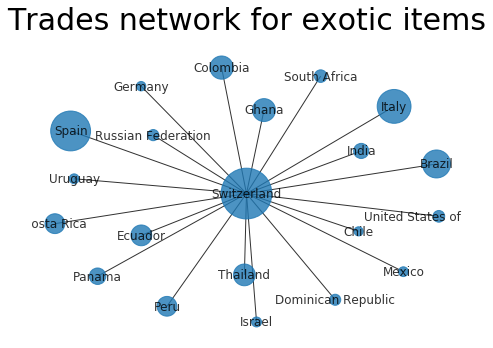

In [223]:
import networkx as nx

G=nx.from_pandas_edgelist(sum_trade.loc[sum_trade.Element=='Import Quantity'].loc[sum_trade.Year==2017].sort_values(by='Value', ascending=False)[:20], 'Reporter Countries', 'Partner Countries', edge_attr=['Value'], create_using=nx.Graph())
 
# Plot it
nx.draw(G, with_labels=True, k=1, alpha=0.8, node_size=(sum_trade.loc[sum_trade.Element=='Import Quantity'].loc[sum_trade.Year==2017].sort_values(by='Value', ascending=False)[:21].Value)/50)
limits=plt.axis('off')
plt.title("Trades network for exotic items",fontsize=30, pad=20)
plt.show()



<div class="alert alert-block alert-info">
    
Exotic goods have been selected to build this graph therefore countries from different climates of Switzerland stands out.

In [224]:
CH_trade_prod_selection = CH_trade_network.loc[CH_trade_network.Item.isin(production_selection)]

In [225]:
CH_trade_prod_selection = CH_trade_prod_selection[['Element','Reporter Countries','Partner Countries', 'Item', 'Value', 'Year']]

In [226]:
sum_trade_prod = CH_trade_prod_selection.groupby(["Element","Partner Countries","Reporter Countries", 'Year']).agg({'Value':'sum'})\
                                    .reset_index()
sum_trade_prod.sort_values(by='Value', ascending=False).head()

Element Partner Countries Reporter Countries  Year   Value
2381  Import Quantity            France        Switzerland  1987  416462
2382  Import Quantity            France        Switzerland  1988  374643
2410  Import Quantity            France        Switzerland  2016  365518
2402  Import Quantity            France        Switzerland  2008  347691
2444  Import Quantity           Germany        Switzerland  2011  345789

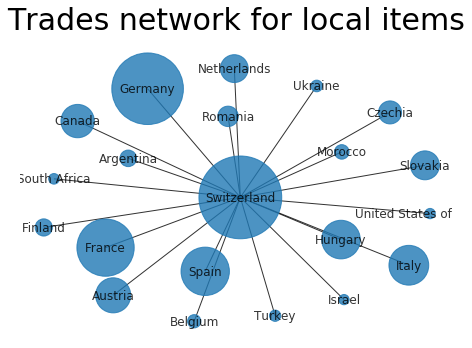

In [227]:
import networkx as nx

G=nx.from_pandas_edgelist(sum_trade_prod.loc[sum_trade_prod.Element=='Import Quantity'].loc[sum_trade_prod.Year==2017].sort_values(by='Value', ascending=False)[:20], 'Reporter Countries', 'Partner Countries', edge_attr=['Value'], create_using=nx.Graph())
 
# Plot it
nx.draw(G, with_labels=True, k=1, alpha=0.8, node_size=(sum_trade_prod.loc[sum_trade_prod.Element=='Import Quantity'].loc[sum_trade_prod.Year==2017].sort_values(by='Value', ascending=False)[:21].Value)/50)
limits=plt.axis('off')
plt.title("Trades network for local items",fontsize=30, pad=20)
plt.show()




<div class="alert alert-block alert-info">

Here we selected local items therefore the Swiss neighbours are the biggest partners as they share more or less the same climate.

 </div> <div class="alert alert-block alert-warning">
    
 Display the countries 20 with which Switzerland imports the most of theses products in each year (interactive)

In [228]:
world_countries_path = '../data/countries.csv'
world_countries = pd.read_csv(world_countries_path)
world_countries.rename(columns={'name':'Partner Countries'}, inplace=True)


 </div> <div class="alert alert-block alert-warning">
    
Modify the names of some countries which don't correspond to their names in the trade dataset

In [229]:
world_countries.at[235, 'Partner Countries']='Viet Nam'
world_countries.at[27, 'Partner Countries']= 'Bolivia (Plurinational State of)'
world_countries.at[92, 'Partner Countries']= 'China, Hong Kong SAR'
world_countries.at[222, 'Partner Countries']= 'China, Taiwan Province of'
world_countries.at[45, 'Partner Countries']= 'China, mainland'
world_countries.at[37, 'Partner Countries']= 'Democratic Republic of the Congo'
world_countries.at[52, 'Partner Countries']= 'Czechia'
world_countries.at[39, 'Partner Countries']= 'Congo'
world_countries.at[41, 'Partner Countries']= "Côte d'Ivoire"
world_countries.at[207, 'Partner Countries']= 'Eswatini'
world_countries.at[105, 'Partner Countries']= 'Iran (Islamic Republic of)'
world_countries.at[142, 'Partner Countries']= 'Myanmar'
world_countries.at[140, 'Partner Countries']= 'North Macedonia'
world_countries.at[179, 'Partner Countries']= 'Palestine'
world_countries.at[119, 'Partner Countries']= 'Republic of Korea'
world_countries.at[136, 'Partner Countries']= 'Republic of Moldova'
world_countries.at[187, 'Partner Countries']= 'Russian Federation'
world_countries.at[206, 'Partner Countries']= 'Syrian Arab Republic'
world_countries.at[223, 'Partner Countries']= 'United Republic of Tanzania'
world_countries.at[227, 'Partner Countries']= 'United States of America'
world_countries.at[232, 'Partner Countries']= 'Venezuela (Bolivarian Republic of)'

In [230]:
world_countries.set_index('Partner Countries', inplace=True)
world_countries.drop(columns='country', inplace=True)

In [231]:
sum_trade_geo = sum_trade.join(world_countries,on='Partner Countries', how='left')
sum_trade_geo.dropna(how='any', inplace=True)

In [232]:
sum_import_geo= sum_trade_geo.loc[sum_trade_geo.Element=='Import Quantity']

In [233]:
sum_trade_geo = sum_trade.join(world_countries,on='Partner Countries', how='left')
sum_trade_geo.dropna(how='any', inplace=True)

In [234]:
sum_import_geo= sum_trade_geo.loc[sum_trade_geo.Element=='Import Quantity']

In [235]:
# just useful for the size of the circles on the map
sum_import_geo['stroke'] = sum_import_geo.Value.apply(lambda x: False if x==0 else True)

In [236]:
 def viz_evolution(year):
    df_viz_evolution = sum_import_geo.loc[sum_import_geo['Year']==year].sort_values(by='Value', ascending=False)[:10]
    
    # multiple line plot
    plt.figure(figsize=(20,10))
    plt.barh(df_viz_evolution['Partner Countries'][::-1].values, df_viz_evolution.Value[::-1])
    
    plt.title(f'Imports of Switzerland in {year}', fontsize= 20)
    plt.xlabel("Quantity (in tonnes)", fontsize= 20)
    plt.ylabel("Country", fontsize= 20)
    plt.show()


years = sum_import_geo.sort_values(by='Year').Year.unique()
interact(viz_evolution, year = years)    

interactive(children=(Dropdown(description='year', options=(1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 19…

<function __main__.viz_evolution(year)>

<div class="alert alert-block alert-info">
One can notice that partners haven't changed a lot along the years. For example, Swiss people have been always great fans of spanish and italian importation. In the next ranking positions comes mostly sud american coutries. The dynamics of Swiss importations partners is stable from 1986 to 2017.

 </div> <div class="alert alert-block alert-warning">
    
Now display those on a map

 </div> <div class="alert alert-block alert-warning">
    
The map is for year 2017.

In [237]:
sum_import_geo_2017 = sum_import_geo.loc[sum_import_geo['Year']==2017]

In [238]:
m2 = folium.Map(location=[48, 0], zoom_start=2)
#world_geo_path = '../data/countries.geo.json'
#world_geo = json.load(open(world_geo_path))
for i in range(0,len(sum_import_geo_2017)):
    folium.Circle(
      location= [sum_import_geo_2017.iloc[i]['latitude'], str(sum_import_geo_2017.iloc[i]['longitude'])],
      tooltip='%s : %s' %(sum_import_geo_2017.iloc[i]['Partner Countries'],str(sum_import_geo_2017.iloc[i]['Value'])),
      radius=int(sum_import_geo_2017.iloc[i]['Value'])*8,
      color='crimson',
      stroke= bool(sum_import_geo_2017.iloc[i]['stroke']),
      fill=True,
      fill_color='crimson' 
    ).add_to(m2)

folium.LayerControl().add_to(m2)

m2

In [239]:
m2.save('../doc/map_import.html') #map saved as html file in doc folder.

In [240]:
CH_trade_selection_sum = CH_trade2.loc[CH_trade2.Item.isin(import_selection)].groupby(['Element','Year']) \
                                .agg({'Value':'sum'}) \
                                .rename(columns={'Value':'Sum'}) \
                                .reset_index()

 </div> <div class="alert alert-block alert-warning">
    
The top 6 is what is used by the functions below to produce the plot, but you can change it to plot top_traditional, or top_fancy

In [241]:
top6 = ['Apples','Wheat','Potatoes', 'Maize', 'Apples', 'Barley','Grapes', 'Sugar beet']

In [242]:
CH_top6_production = CH_data_transformed.loc[CH_data_transformed.Item.isin(top6)].loc[CH_data_transformed.Input=='Country production']
CH_top6_production_sum = CH_top6_production.groupby(['Area', 'Element','Year']) \
                                .agg({'Value':'sum'}) \
                                .rename(columns={'Value':'Sum'}) \
                                .reset_index()

CH_top6_importation = CH_data_transformed.loc[CH_data_transformed.Item.isin(top6)].loc[CH_data_transformed.Input=='Importation']
CH_top6_importation_sum = CH_top6_importation.groupby(['Area', 'Element','Year']) \
                                .agg({'Value':'sum'}) \
                                .rename(columns={'Value':'Sum'}) \
                                .reset_index()

In [243]:
CH_top6_exportation = CH_data_transformed_exportations.loc[CH_data_transformed_exportations.Item.isin(top6)]
CH_top6_exportation_sum = CH_top6_exportation.groupby(['Area', 'Element','Year']) \
                                .agg({'Value':'sum'}) \
                                .rename(columns={'Value':'Sum'}) \
                                .reset_index()


In [244]:
crops_sum_item = raw_crops_dataset.groupby(['Area', 'Element','Year', 'Item']) \
                                .agg({'Value':'sum'}) \
                                .rename(columns={'Value':'Sum'}) \
                                .reset_index()

In [245]:
CH_FR_area_yield_top6 = crops_sum_item.loc[crops_sum_item.Area.isin(['Switzerland','France'])]\
                                        .loc[crops_sum_item.Item.isin(top6)]\
                                        .loc[crops_sum_item.Year>=1986]\
                                        .loc[crops_sum_item.Year<=2017]

In [246]:
CH_FR_area_yield_top6_sum = CH_FR_area_yield_top6.groupby(['Element', 'Year', 'Area'])\
                                .agg({'Sum':'sum'})\
                                .reset_index()

In [247]:
CH_FR_urban_land = raw_land_cover_dataset.loc[raw_land_cover_dataset.Area.isin(['Switzerland','France'])]\
                                            .loc[raw_land_cover_dataset.Item=='Artificial surfaces (including urban and associated areas)']\
                                            .loc[raw_land_cover_dataset.Element=='Area from CCI_LC']\
                                            .drop(columns={'Domain', 'Flag Description'})
            

In [248]:
start_CH_FR_urban_land = pd.Series([0,0,0,0,0,0])
end_CH_FR_urban_land = pd.Series([0,0])

CH_urban_land_completed = start_CH_FR_urban_land.append(CH_FR_urban_land.loc[CH_FR_urban_land.Area=='Switzerland'].Surface)\
                                                .append(end_CH_FR_urban_land)
FR_urban_land_completed = start_CH_FR_urban_land.append(CH_FR_urban_land.loc[CH_FR_urban_land.Area=='France'].Surface)\
                                                .append(end_CH_FR_urban_land)

In [249]:
CH_FR_area_yield_top6 = crops_sum_item.loc[crops_sum_item.Area.isin(['Switzerland','France'])]\
                                        .loc[crops_sum_item.Item.isin(top6)]\
                                        .loc[crops_sum_item.Year>=1986]\
                                        .loc[crops_sum_item.Year<=2017]

In [250]:
CH_FR_area_yield_top6_sum = CH_FR_area_yield_top6.groupby(['Element', 'Year', 'Area'])\
                                .agg({'Sum':'sum'})\
                                .reset_index()

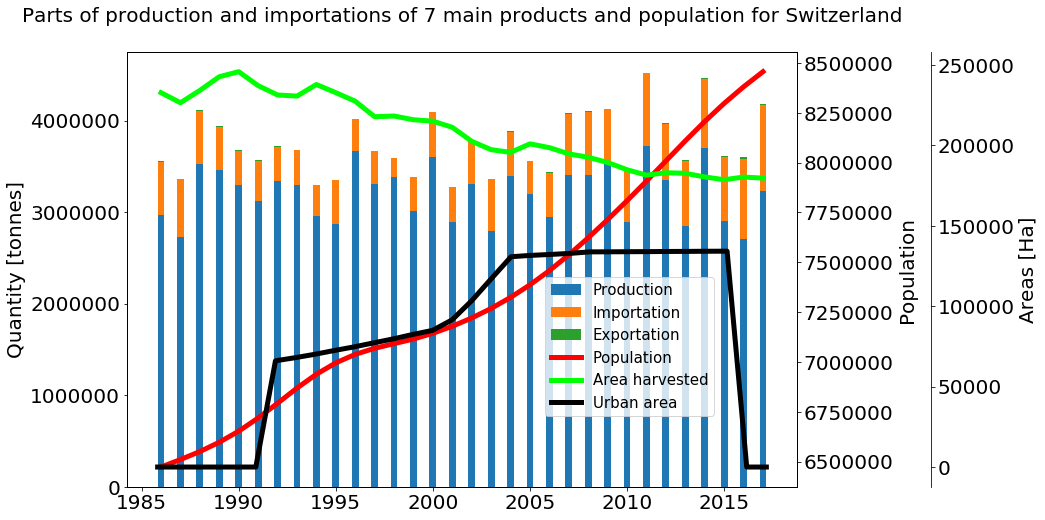

In [251]:
fig, ax1 = plt.subplots(figsize=(12,8))

ind = CH_top6_production_sum.Year
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = ax1.bar(ind, CH_top6_production_sum.Sum, width)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
p2 = ax1.bar(ind, CH_top6_importation_sum.Sum, width,
             bottom=CH_top6_production_sum.Sum)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
p3 = ax1.bar(ind, CH_top6_exportation_sum.Sum, width, bottom=CH_top6_importation_sum.Sum+CH_top6_production_sum.Sum)
ax2=ax1.twinx()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
p4 = ax2.plot(ind, CH_demography, color='red', linewidth=5)

ax3 = ax1.twinx()
ax3.spines["right"].set_position(("axes", 1.2))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

p5 = ax3.plot(ind, CH_FR_area_yield_top6_sum.loc[CH_FR_area_yield_top6_sum.Area=='Switzerland']\
                                          .loc[CH_FR_area_yield_top6_sum.Element=='Area harvested'].Sum, color='lime', linewidth=5)
ax4 = ax3.twiny()
ax4.tick_params(axis='x', which='both', top='off', bottom='off', labelbottom='off', labeltop='off')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
p6 = ax4.plot(ind, CH_urban_land_completed, color='black', linewidth=5)

ax1.set_ylabel('Quantity [tonnes]', fontsize=20)
ax2.set_ylabel('Population', fontsize=20)
ax3.set_ylabel('Areas [Ha]', fontsize=20)
ax4.set_ylabel('Urban area', fontsize=20)
ax1.set_title('Parts of production and importations of 7 main products and population for Switzerland', fontsize=20, pad=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0]), ('Production', 'Importation', 'Exportation', 'Population', 'Area harvested', 'Urban area'), fontsize=15, bbox_to_anchor=[0.75, 0.5], loc=' left')

plt.show()

</div> <div class="alert alert-block alert-info">
    
Inaccordance with the growing world demography, Swiss population has increased from 6.5 to 8.5 million people between 1986 and 2017. However,the country production of the basic foodstuffs does not correlate  to the demography trend.
    
On the contrary, the production is stable and even seems to decrease a bit at the expense of importations. Note that Swiss exports for these products are negligible. Furthermore, the area distributions confirm this lack of production to respond to the growing population. Indeed, area allocated to harvest these commodities is decreasing, while the urban area of the country is increasing rapidly.

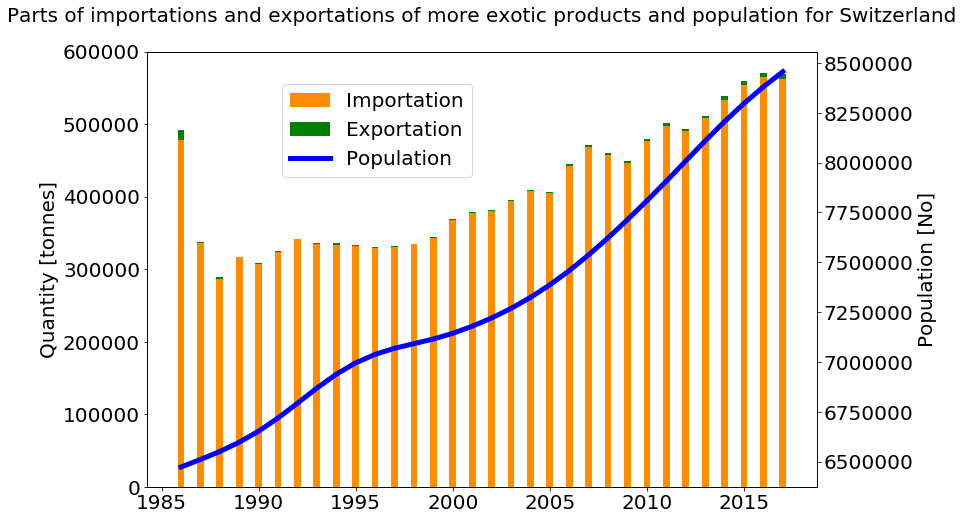

In [252]:
fig, ax1 = plt.subplots(figsize=(12,8))

ind = CH_trade_selection_sum.Year.unique()
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = ax1.bar(ind, CH_trade_selection_sum.loc[CH_trade_selection_sum.Element=='Import Quantity'].Sum, width, color='darkorange')
p2 = ax1.bar(ind, CH_trade_selection_sum.loc[CH_trade_selection_sum.Element=='Export Quantity'].Sum, width, color='green',
             bottom=CH_trade_selection_sum.loc[CH_trade_selection_sum.Element=='Import Quantity'].Sum)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax2=ax1.twinx()
p3 = ax2.plot(ind, CH_demography, color='blue', linewidth=5)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax1.set_ylabel('Quantity [tonnes]', fontsize=20)
ax2.set_ylabel('Population [No]', fontsize=20)
ax1.set_title('Parts of importations and exportations of more exotic products and population for Switzerland', fontsize=20, pad=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend((p1[0], p2[0], p3[0]), ('Importation', 'Exportation', 'Population'), fontsize=20,  bbox_to_anchor=[0.5, 0.95], loc=' left')

plt.show()

</div> <div class="alert alert-block alert-info">
    
Since it was shown that the production is not responding to the growing population, one could question what category of products has increased in the past decades to fulfill the population needs. 
A selection of all the raw agricultural goods that are not produced in Switzerland is performed, the imports of these exotic products being displayed on the graph.
    
Interestingly, there is a large increase of those imports, reflecting roughly the growing population. 
No certainties on the cause of these results can be drawn, nevertheless it could be hypothesized that they reflect a change in consumption habits.

In [253]:
FR_top6 = France_data.loc[France_data.Item.isin(top6)]
FR_top6_sum = FR_top6.groupby(['Area','Year']) \
                                .agg({'Produced Quantity':'sum', 'Exported Quantity':'sum', 'Imported Quantity':'sum'}).reset_index()


In [254]:
FR_demography = demography.loc[demography.Area=='France'].loc[demography.Year>=1986].loc[demography.Year<=2017].Population

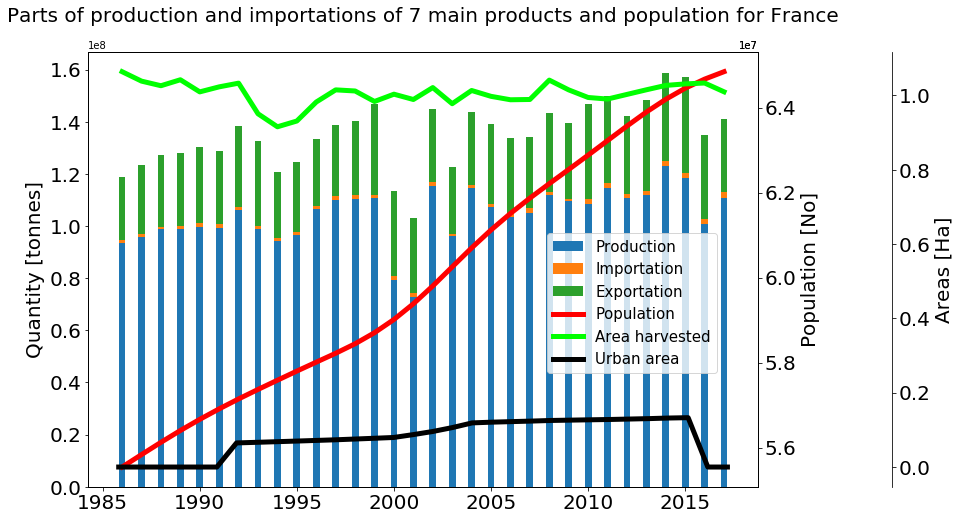

In [255]:
fig, ax1 = plt.subplots(figsize=(12,8))

ind = FR_top6_sum.Year
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = ax1.bar(ind, FR_top6_sum['Produced Quantity'], width)
p2 = ax1.bar(ind, FR_top6_sum['Imported Quantity'], width,
             bottom=FR_top6_sum['Produced Quantity'])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
p3 = ax1.bar(ind, FR_top6_sum['Exported Quantity'], width, bottom=FR_top6_sum['Imported Quantity']+FR_top6_sum['Produced Quantity'])
ax2=ax1.twinx()
p4 = ax2.plot(ind, FR_demography, color='red', linewidth=5)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax3 = ax1.twinx()
ax3.spines["right"].set_position(("axes", 1.2))
p5 = ax3.plot(ind, CH_FR_area_yield_top6_sum.loc[CH_FR_area_yield_top6_sum.Area=='France']\
                                          .loc[CH_FR_area_yield_top6_sum.Element=='Area harvested'].Sum, color='lime', linewidth=5)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax4 = ax3.twiny()
ax4.tick_params(axis='x', which='both', top='off', bottom='off', labelbottom='off', labeltop='off')
#ax4.spines["right"].set_position(("axes", 1.2))
p6 = ax4.plot(ind, FR_urban_land_completed, color='black',linewidth=5)

ax1.set_ylabel('Quantity [tonnes]', fontsize=20)
ax2.set_ylabel('Population [No]', fontsize=20)
ax3.set_ylabel('Areas [Ha]', fontsize=20)
#ax4.set_ylabel('Urban area')
ax1.set_title('Parts of production and importations of 7 main products and population for France', fontsize=20, pad=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0]), ('Production', 'Importation', 'Exportation', 'Population', 'Area harvested', 'Urban area'),fontsize=15,  bbox_to_anchor=[0.95, 0.6], loc=' left')

plt.show()

</div> <div class="alert alert-block alert-info">

As France possesses the highest SSR, it provides an interesting insight to compare its situation with Switzerland. Impressively, the proportions of the exports and imports are reverted compared to Switzerland. Moreover, the production is also stable for France, with a slight tendency (although maybe not significant) to increase. 
Finally, France seems to have protected its harvested areas for these products, and limited its urban expansion more than Switzerland.
Overall, this provides a quite detailed decomposition of the SSR that partly explains the gap between Switzerland and France for this metric.